# Credit-EDA-CaseStudy

In [1]:
#importing required librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the data files - application_Data / make sure to provide correct path for data files
applicationdata=pd.read_csv('application_data.csv')

In [3]:
#overview of the data - application_Data
applicationdata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [4]:
#Reading the data files - previous application data
Pappdata=pd.read_csv('previous_application.csv')

In [5]:
#overview of the data - previous_application
Pappdata.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

In [6]:
# Cleaning data - missing values
plt.figure(figsize=(20,5))
totalmissingcols=applicationdata.isnull().sum().sort_values(ascending=False)
len(totalmissingcols) #122 columns
missingcols=totalmissingcols[totalmissingcols.values>(0.45*len(applicationdata))]
missingcols.plot(kind='bar',color='#CDE14D')
plt.title('Columns with Missing values more than 45%\n', fontdict={'fontsize':20})
plt.show()

# so we fixed our missing % to 45% and filtered for those columns which have >45% missing values. 



In [7]:
missingcols.shape #count of columns to be dropped

(49,)

In [8]:
#Dropping the columns with missing values >45%
listcols=list(missingcols[missingcols.values>=0.45].index) # taking the list of column names for dropping

print('Before dropping shape:', applicationdata.shape)
applicationdata.drop(labels=listcols,axis=1,inplace=True) #dropping the columns

print('After dropping shape:', applicationdata.shape) #Shape of original dataset after dropping missing values columns

Before dropping shape: (307511, 122)
After dropping shape: (307511, 73)


In [9]:
#Next step is to check null % in remaining columns
pd.set_option('display.max_rows',100)
Null_Columns=pd.DataFrame(((applicationdata.isnull().sum()/len(applicationdata))*100).sort_values(ascending=False))
Null_Columns['counts']=applicationdata.isnull().sum().sort_values(ascending=False).values
Null_Columns.reset_index(inplace=True)
Null_Columns.rename(columns={'index':'Column Names',0:'Missing%','counts':'Missing Counts'}, inplace=True)
Null_Columns.head(20)


Column Names   Missing%  Missing Counts
0              OCCUPATION_TYPE  31.345545           96391
1                 EXT_SOURCE_3  19.825307           60965
2   AMT_REQ_CREDIT_BUREAU_YEAR  13.501631           41519
3    AMT_REQ_CREDIT_BUREAU_QRT  13.501631           41519
4    AMT_REQ_CREDIT_BUREAU_MON  13.501631           41519
5   AMT_REQ_CREDIT_BUREAU_WEEK  13.501631           41519
6    AMT_REQ_CREDIT_BUREAU_DAY  13.501631           41519
7   AMT_REQ_CREDIT_BUREAU_HOUR  13.501631           41519
8              NAME_TYPE_SUITE   0.420148            1292
9     OBS_30_CNT_SOCIAL_CIRCLE   0.332021            1021
10    DEF_30_CNT_SOCIAL_CIRCLE   0.332021            1021
11    OBS_60_CNT_SOCIAL_CIRCLE   0.332021            1021
12    DEF_60_CNT_SOCIAL_CIRCLE   0.332021            1021
13                EXT_SOURCE_2   0.214626             660
14             AMT_GOODS_PRICE   0.090403             278
15                 AMT_ANNUITY   0.003902              12
16             CNT_FAM_MEMBERS   0.000650               2
17      DAYS_LAST_PHONE_CHANGE   0.000325               1
18            FLAG_DOCUMENT_17   0.000000               0
19            FLAG_DOCUMENT_18   0.000000               0

Based on the above step we can see that many columns has missing values, lets impute them

In [10]:
#Imputing first column from the above "OCCUPATION_TYPE"
applicationdata.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [11]:
#We can impute "OCCUPATION_TYPE" with mode as it's non-numeric attribute
OCCUPATION_TYPE_MODE=applicationdata.OCCUPATION_TYPE.mode()[0]
OCCUPATION_TYPE_MODE


'Laborers'

In [12]:
#we can impute EXT_SOURCE_3 with mean
EXT_SOURCE_3_MEAN=applicationdata.EXT_SOURCE_3.mean()
EXT_SOURCE_3_MEAN

0.5108529061799658

In [13]:
#we can impute EXT_SOURCE_2 with mean
EXT_SOURCE_2_MEAN=applicationdata.EXT_SOURCE_2.mean()
EXT_SOURCE_2_MEAN

0.5143926741308462

Checking columsn with AMT_REQ_CREDIT_BUREAU and imputing them

In [14]:
applicationdata.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
applicationdata.loc[applicationdata.AMT_REQ_CREDIT_BUREAU_YEAR.isnull(),'AMT_REQ_CREDIT_BUREAU_YEAR']=0


In [15]:
applicationdata.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()
applicationdata.loc[applicationdata.AMT_REQ_CREDIT_BUREAU_QRT.isnull(),'AMT_REQ_CREDIT_BUREAU_QRT']=0


In [16]:
applicationdata.AMT_REQ_CREDIT_BUREAU_MON.value_counts()
applicationdata.loc[applicationdata.AMT_REQ_CREDIT_BUREAU_MON.isnull(),'AMT_REQ_CREDIT_BUREAU_MON']=0


In [17]:
applicationdata.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()
applicationdata.loc[applicationdata.AMT_REQ_CREDIT_BUREAU_WEEK.isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK']=0


In [18]:
applicationdata.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()
applicationdata.loc[applicationdata.AMT_REQ_CREDIT_BUREAU_DAY.isnull(),'AMT_REQ_CREDIT_BUREAU_DAY']=0


On the basis of the above observations of columns AMT_REQ_CREDIT_BUREAU, we have imputed missing values with 0 as its most frequent(mode)

In [19]:
# CNT_FAM_MEMBERS column already has NaN so no need to impute anything
applicationdata.loc[applicationdata.CNT_FAM_MEMBERS.isnull(),'CNT_FAM_MEMBERS']

41982    NaN
187348   NaN
Name: CNT_FAM_MEMBERS, dtype: float64

In [20]:
# DAYS_LAST_PHONE_CHANGE column already has NaN so no need to impute anything
applicationdata.loc[applicationdata.DAYS_LAST_PHONE_CHANGE.isnull(),'DAYS_LAST_PHONE_CHANGE']

15709   NaN
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

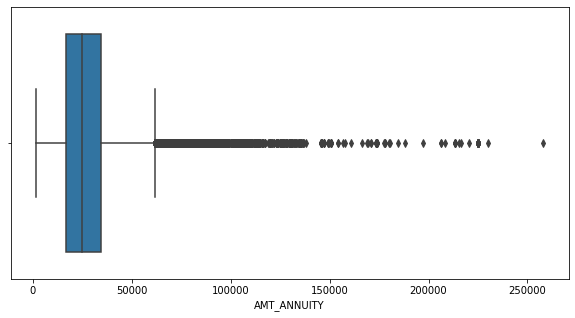

In [21]:
plt.figure(figsize=[10,5])
sns.boxplot(data=applicationdata,x='AMT_ANNUITY')
plt.show()

So from the above boxplot for 'AMT_ANNUITY' we can see that there are many outliers (or) numerical data is widely spread after the upper whisker(around 25k) so we can't use mean, thus we will use median of the column to impute the missing values

In [22]:
applicationdata.AMT_ANNUITY.value_counts()
applicationdata.AMT_ANNUITY.median()

24903.0

In [23]:
# Final check for columns with missing values
applicationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Now we have completed dealing with columns with missing values

While reviewing the data i identified few columns have "XNA" as values, which means Not Available, lets impute them

In [24]:
# Imputing CODE_GENDER column for "XNA" values
applicationdata.CODE_GENDER.value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [25]:
#Imputing with Mode or "F" as in Female for "XNA"
applicationdata.CODE_GENDER=np.where(applicationdata.CODE_GENDER == 'XNA','F',applicationdata.CODE_GENDER)
applicationdata.CODE_GENDER.value_counts(normalize=True)*100


F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

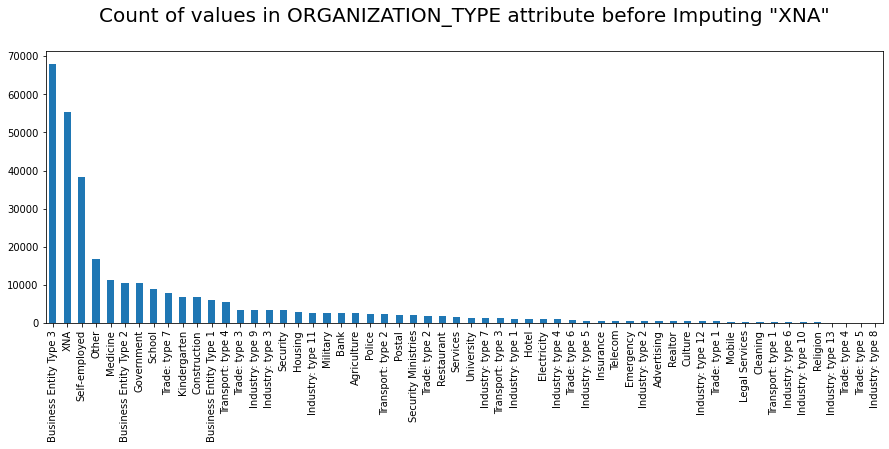

In [26]:
#Imputing ORGANIZATION_TYPE column for "XNA" values
plt.figure(figsize=[15,5])
applicationdata.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.title('Count of values in ORGANIZATION_TYPE attribute before Imputing "XNA"\n', fontdict={'fontsize':20})
plt.show()

Looks like huge amount of "XNA" values are present in ORGANISATION_TYPE column in this scenarios, imputing such values with "NaN" would be ideal as it won't hinder or effect the analysis

In [27]:
#Imputing XNA values with NaN for ORGANIZATION_TYPE attribute
plt.figure(figsize=[15,5])
applicationdata.ORGANIZATION_TYPE = np.where(applicationdata.ORGANIZATION_TYPE=='XNA',np.NaN,applicationdata.ORGANIZATION_TYPE)
applicationdata.ORGANIZATION_TYPE.value_counts().plot.bar()

plt.title('Count of values in ORGANIZATION_TYPE attribute after imputing "XNA"\n', fontdict={'fontsize':20})
plt.show()

### Dropping Misceallenous Columns
Looks like there are many Misceallenous columns especially the "FLAG" ones, let's drop them

In [28]:
misceallenousCols=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
                   'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
                   'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                   'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                   'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS'
                  
                  ]

applicationdata.drop(labels=misceallenousCols,axis=1,inplace=True)
applicationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Modifying/Updating existing columns

In [29]:
# Columns with "DAYS" are in negative lets modify them
Dayscolumns=[columns for columns in applicationdata if columns.startswith('DAYS')]
applicationdata.loc[:,Dayscolumns].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [30]:
#Converting columns to positive use abs()
applicationdata[Dayscolumns]= abs(applicationdata[Dayscolumns])
applicationdata[Dayscolumns].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [31]:
#Updating DAYS_BIRTH to convert days to Years
applicationdata.DAYS_BIRTH =(applicationdata.DAYS_BIRTH/365).astype(int)
applicationdata.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

### Creating Additional columns using Binning for analysis

In [32]:
#Creating & Binning column AGE_CATEGORY from DAYS_BIRTH using pd.cut()

applicationdata['AGE_CATEGORY']=pd.cut(applicationdata.DAYS_BIRTH,bins=[17,25,35,60,100],labels=['Very_Young','Young','Middle_Age','Senior_Citizens'])
applicationdata.AGE_CATEGORY.value_counts(normalize=True)*100

Middle_Age         60.453122
Young              24.690174
Senior_Citizens     9.550227
Very_Young          5.306477
Name: AGE_CATEGORY, dtype: float64

In [33]:
#Creating & Binning INCOME_CATEGORY from AMT_INCOME_TOTAL based on quantiles
applicationdata['INCOME_CATEGORY']=pd.qcut(applicationdata['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1],labels=['VERY_LOW_INCOME','LOW_INCOME','MEDIUM_INCOME','HIGH_INCOME','VERY_HIGH_INCOME'])
applicationdata.INCOME_CATEGORY.value_counts(normalize=True)*100

LOW_INCOME          27.887132
HIGH_INCOME         24.556195
VERY_LOW_INCOME     20.705276
VERY_HIGH_INCOME    15.322379
MEDIUM_INCOME       11.529018
Name: INCOME_CATEGORY, dtype: float64

In [34]:
pd.set_option('display.max_columns',None)
applicationdata.head(100
                )


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   
50      100058       0    Revolving loans           F            N   
51      100059       0         Cash loans           M            Y   
52      100060       0         Cash loans           M            Y   
53      100061       0         Cash loans           F            N   
54      100062       0         Cash loans           M            Y   
55      100063       0         Cash loans           F            N   
56      100064

## Finding Outliers on Columns and Analysing Distribution of data

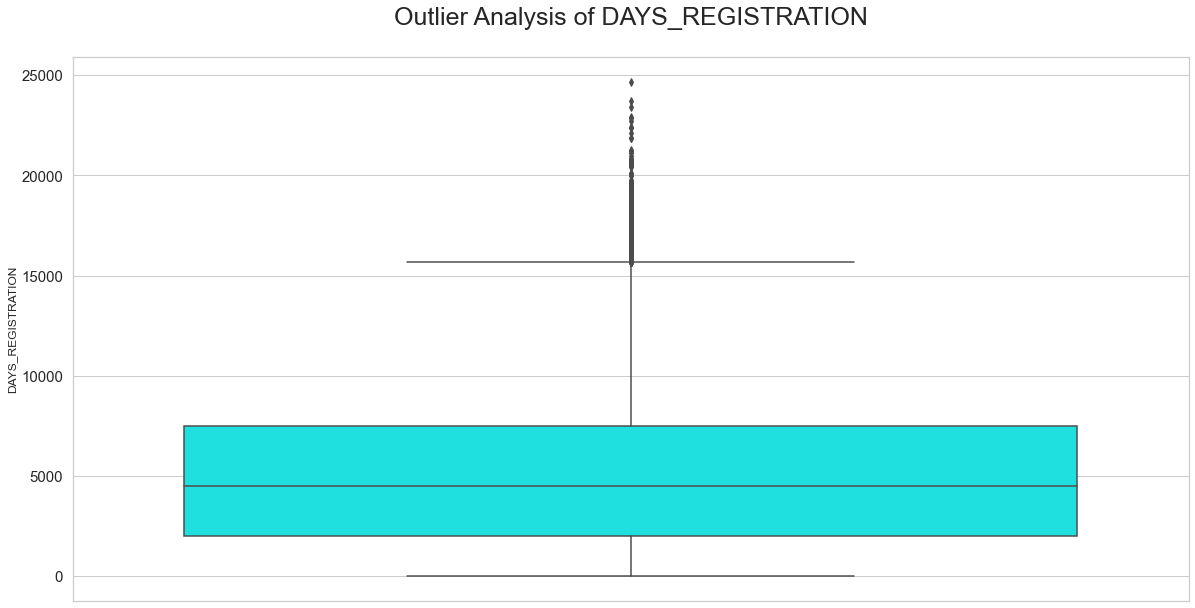

In [35]:
# 1)DAYS_REGISTRATION Column
sns.set_theme(style="whitegrid")


plt.figure(figsize=[20,10])
sns.boxplot(data=applicationdata,y=applicationdata.DAYS_REGISTRATION,color='#00FFFF')

plt.title("Outlier Analysis of DAYS_REGISTRATION\n", fontdict={'fontsize':25})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Looks like "DAYS_REGISTRATION" column : "How many days before the application did client change his registration", has outliers as depicted in above chart at 25000

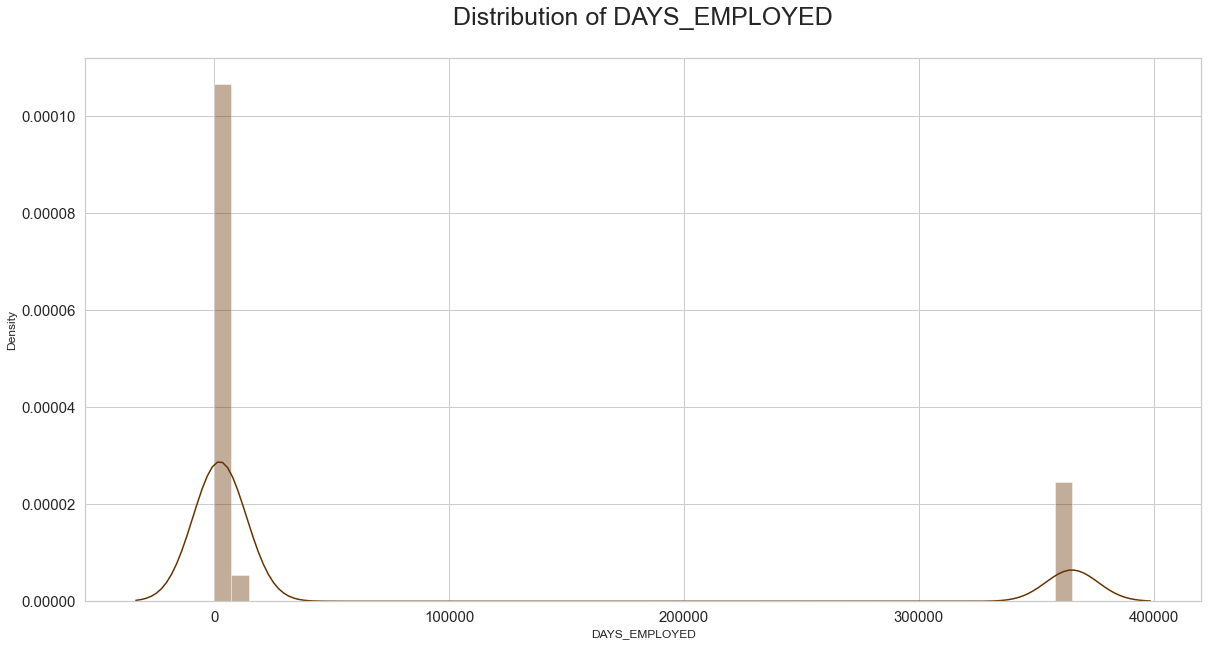

In [36]:
# 2)DAYS_EMPLOYED Column

plt.figure(figsize=[20,10])

sns.distplot(applicationdata.DAYS_EMPLOYED,color='#663300')
plt.title("Distribution of DAYS_EMPLOYED\n",fontdict={'fontsize':25})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The spread/distrbution of DAYS_EMPLOYED Column is strange as, data above 20000 looks like outlier because if we calculate the age plus the days employed before the loan application it will cross 60+ years

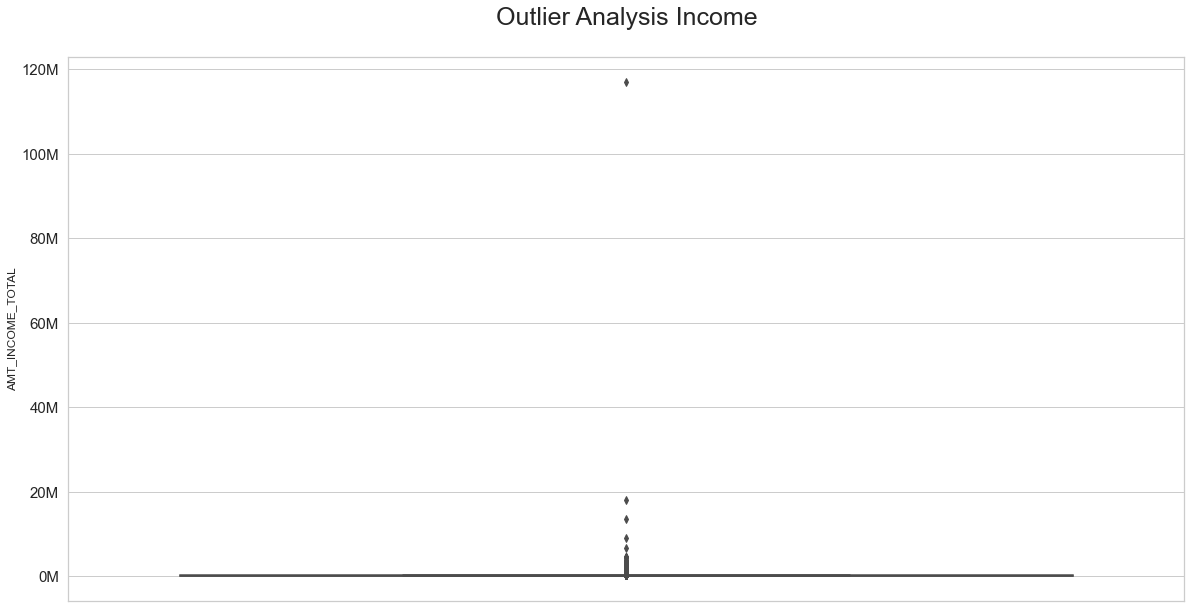

In [37]:
#3 AMT__INCOME_TOTAL
plt.figure(figsize=[20,10])
sns.boxplot(data=applicationdata,y=applicationdata.AMT_INCOME_TOTAL,color='#00FFFF')
plt.title("Outlier Analysis Income\n",fontdict={'fontsize':25})
ticks=np.arange(0,121,20)*1000000
labels=[(f"{i}M")for i in np.arange(0,121,20)]
plt.yticks(ticks,labels)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Again, income around 120Million of a person looks like an outlier for sure.

In [38]:
#4 DAYS_BIRTH Column for checking anyone beyond the generic age
plt.figure(figsize=[20,10])
sns.distplot(applicationdata.DAYS_BIRTH,color='#009999')
plt.title("Distribution of Age\n",fontdict={'fontsize':25})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

No Outliers in DAYS_BIRTH as the age data looks perfectly distributed 

In [39]:
#5 OCCUPATION Spread
plt.figure(figsize=[20,10])
occ=applicationdata.OCCUPATION_TYPE.value_counts()
occ.plot.bar(color='#EE4B4B')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Occupation of Individuals who applied for loan\n",fontdict={'fontsize':25})

plt.show()

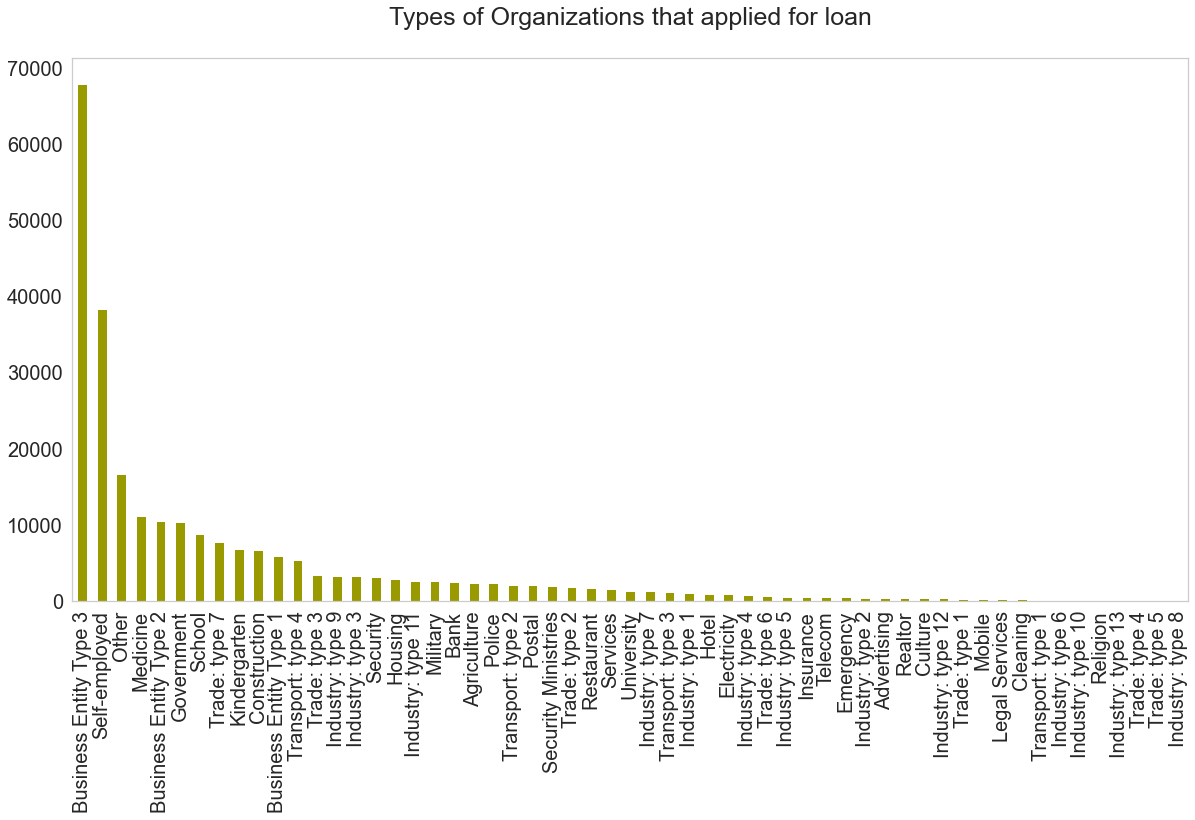

In [40]:
# ORGANIZATION_TYPE Distirbution
plt.figure(figsize=[20,10])
org=applicationdata.ORGANIZATION_TYPE.value_counts()
org.plot.bar(color='#999900')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.title("Types of Organizations that applied for loan\n",fontdict={'fontsize':25})

plt.show()

## Data Analysis 

### Univariate Analysis - Categorical Variables

In [41]:
#Creating a function to plot countplot graphs with ease for categorical variables:
def uni(column,dimensions=[20,10],font=20,tfont=20,rotx=None,size=20):
    
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    plt.figure(figsize=dimensions)
    plt.title((f'Univariate Analysis of {column} variable'), fontdict={'fontsize':tfont})
    #sns.countplot(applicationdata[column])
    splot= sns.countplot(applicationdata[column])
    for p in splot.patches:
        splot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
         
      
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.show()

In [42]:
applicationdata.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   
5                    0.035792          46           1588             4970.0   
6                    0.035792          37           3130             1213.0   
7                    0.003122          51            449             4597.0   
8                    0.018634          55         365243             7427.0   
9                    0.019689          39           2019            14437.

In [43]:
Categorical_Columns = ['CODE_GENDER','NAME_TYPE_SUITE','AGE_CATEGORY','NAME_CONTRACT_TYPE','INCOME_CATEGORY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','ORGANIZATION_TYPE']

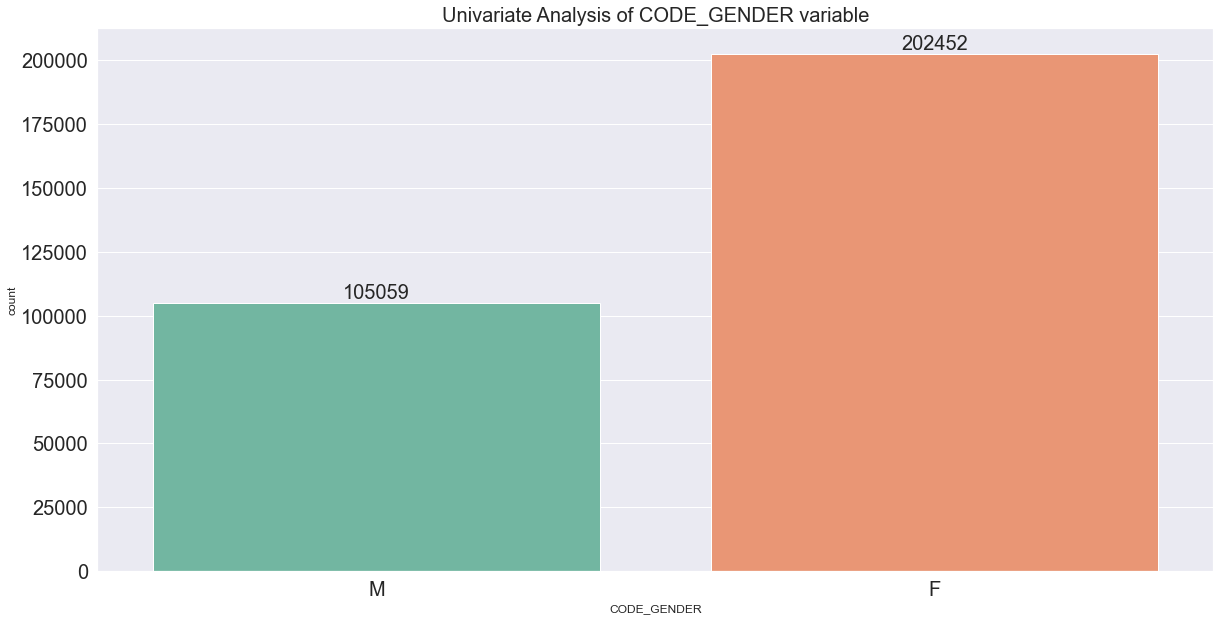

In [44]:
uni(Categorical_Columns[0])

From the above, we can depict more Female applicants than Male

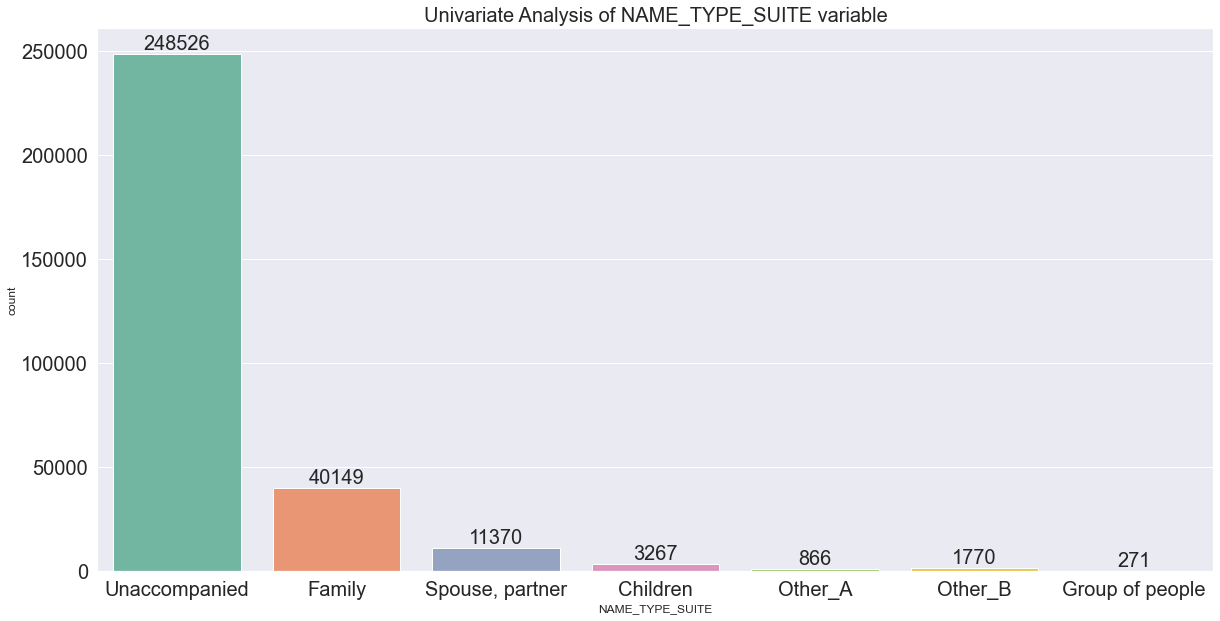

In [45]:
uni(Categorical_Columns[1])

From the above we can depict that maximum number of clients were Unaccompanied while applying for the loan

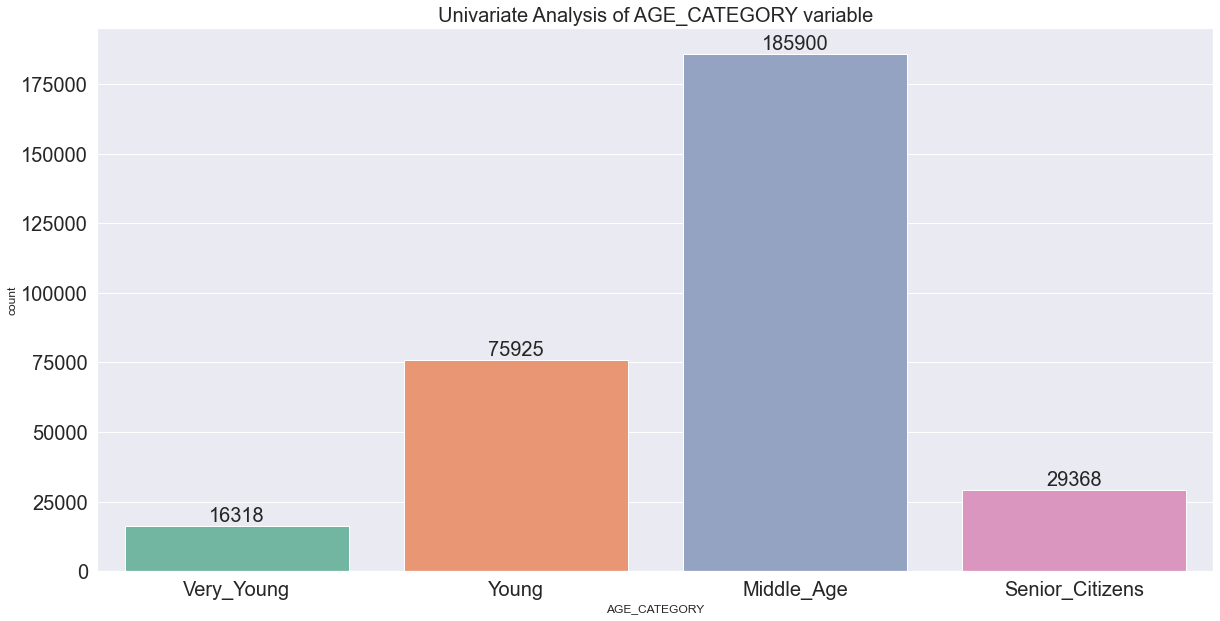

In [46]:
uni(Categorical_Columns[2])

From the above we can observe that there are More Middle_Age applicants and less Very_Young applicants 

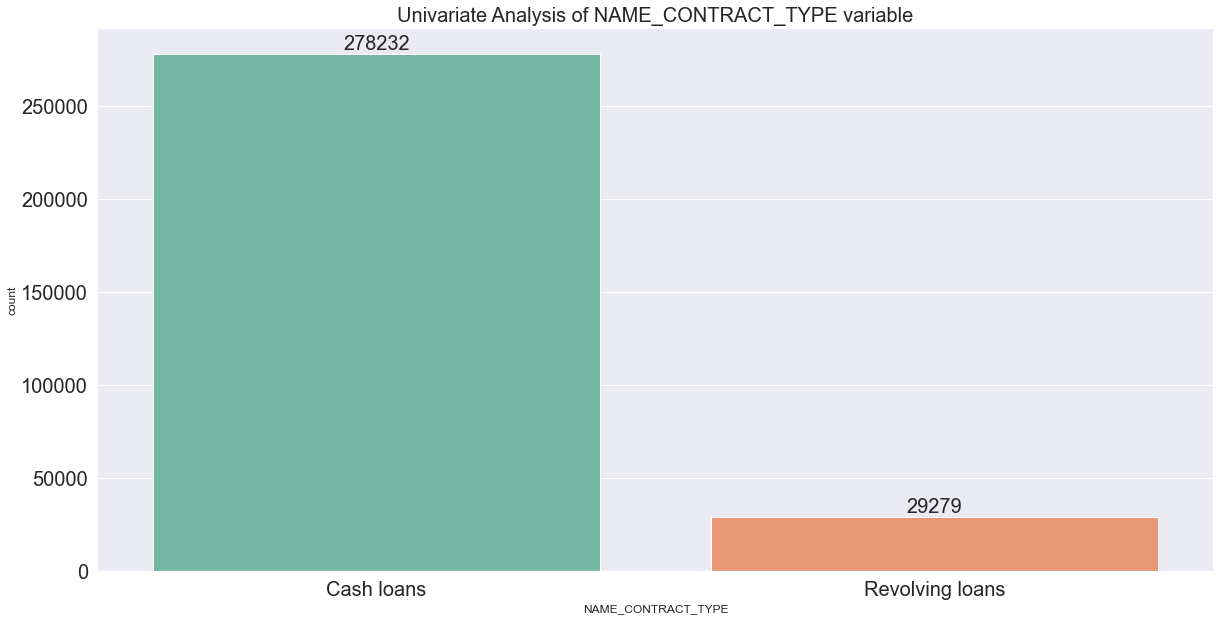

In [47]:
uni(Categorical_Columns[3])

From the above we can see that there are more cash loans than revolving loans applications

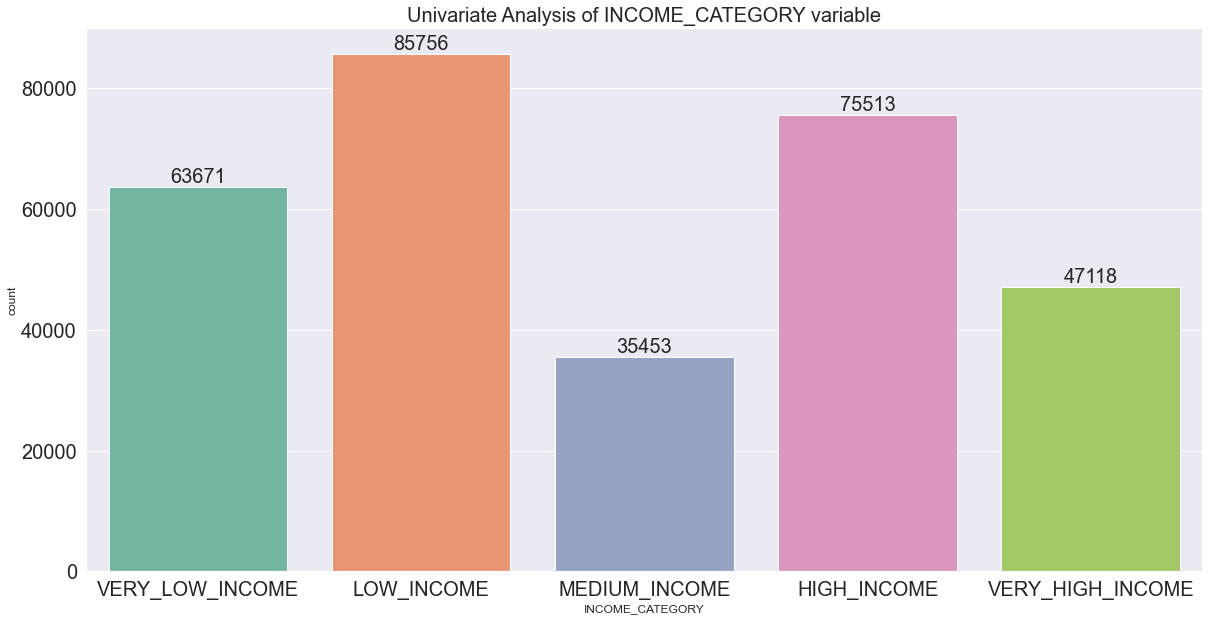

In [48]:
uni(Categorical_Columns[4])

From the above we can see that there are more "LOW_INCOME" applicants (85k applications) followed by "HIGH_INCOME" applicants(75k applications)

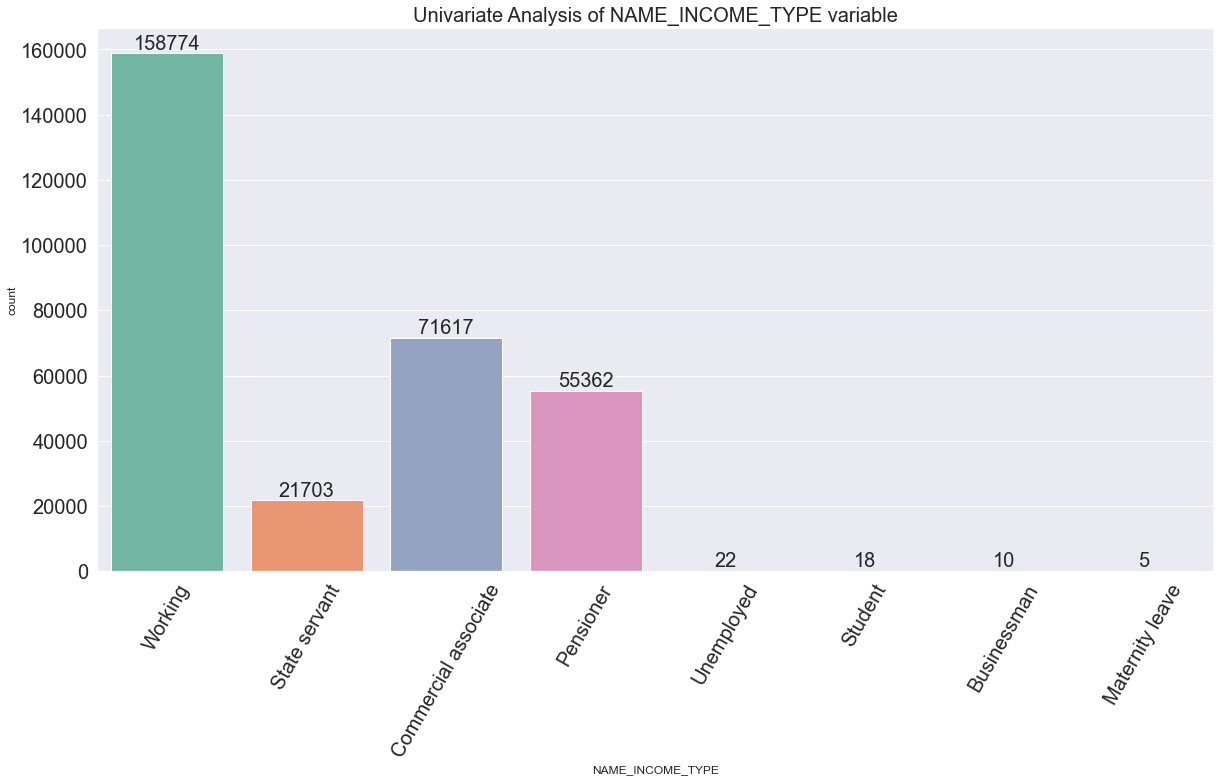

In [49]:
uni(Categorical_Columns[5], rotx=60)

From the above we can see that there are approximately 158k applicants which are "Working" individuals who have applied for loan and is the maximum amongst the Income_Type cateogry 

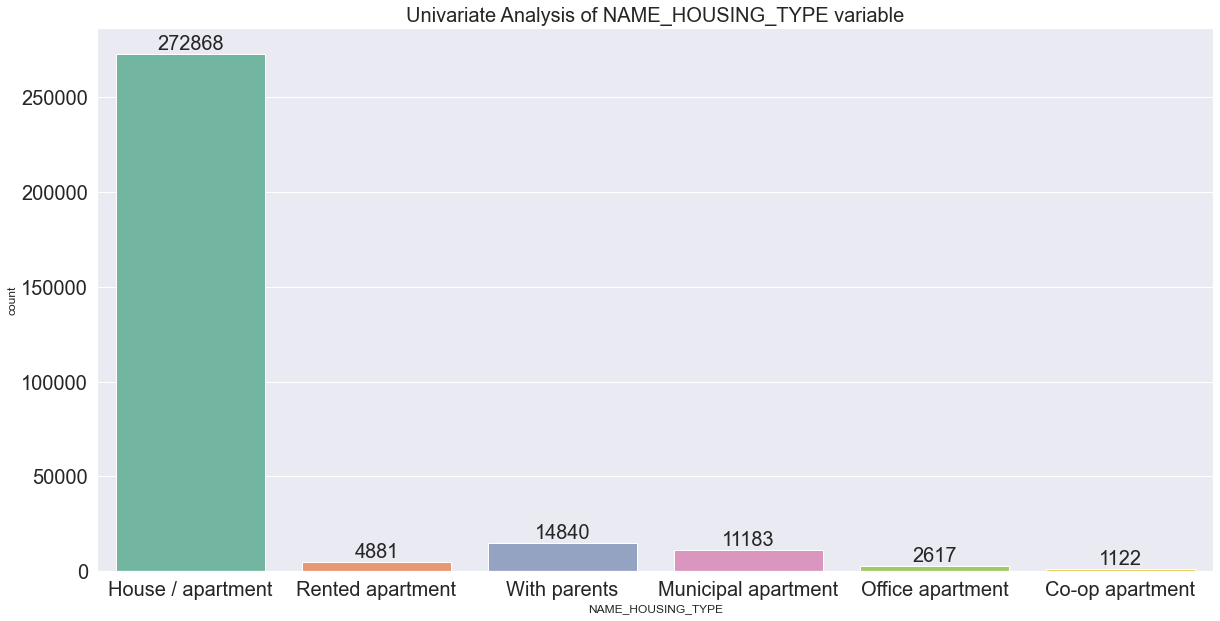

In [50]:
uni(Categorical_Columns[7])

From the above, we can observe that maximum number of applicants are residing in House/apartment

In [51]:
uni(Categorical_Columns[8])

From the above we can depict that maximum number of applicants(196k) are married

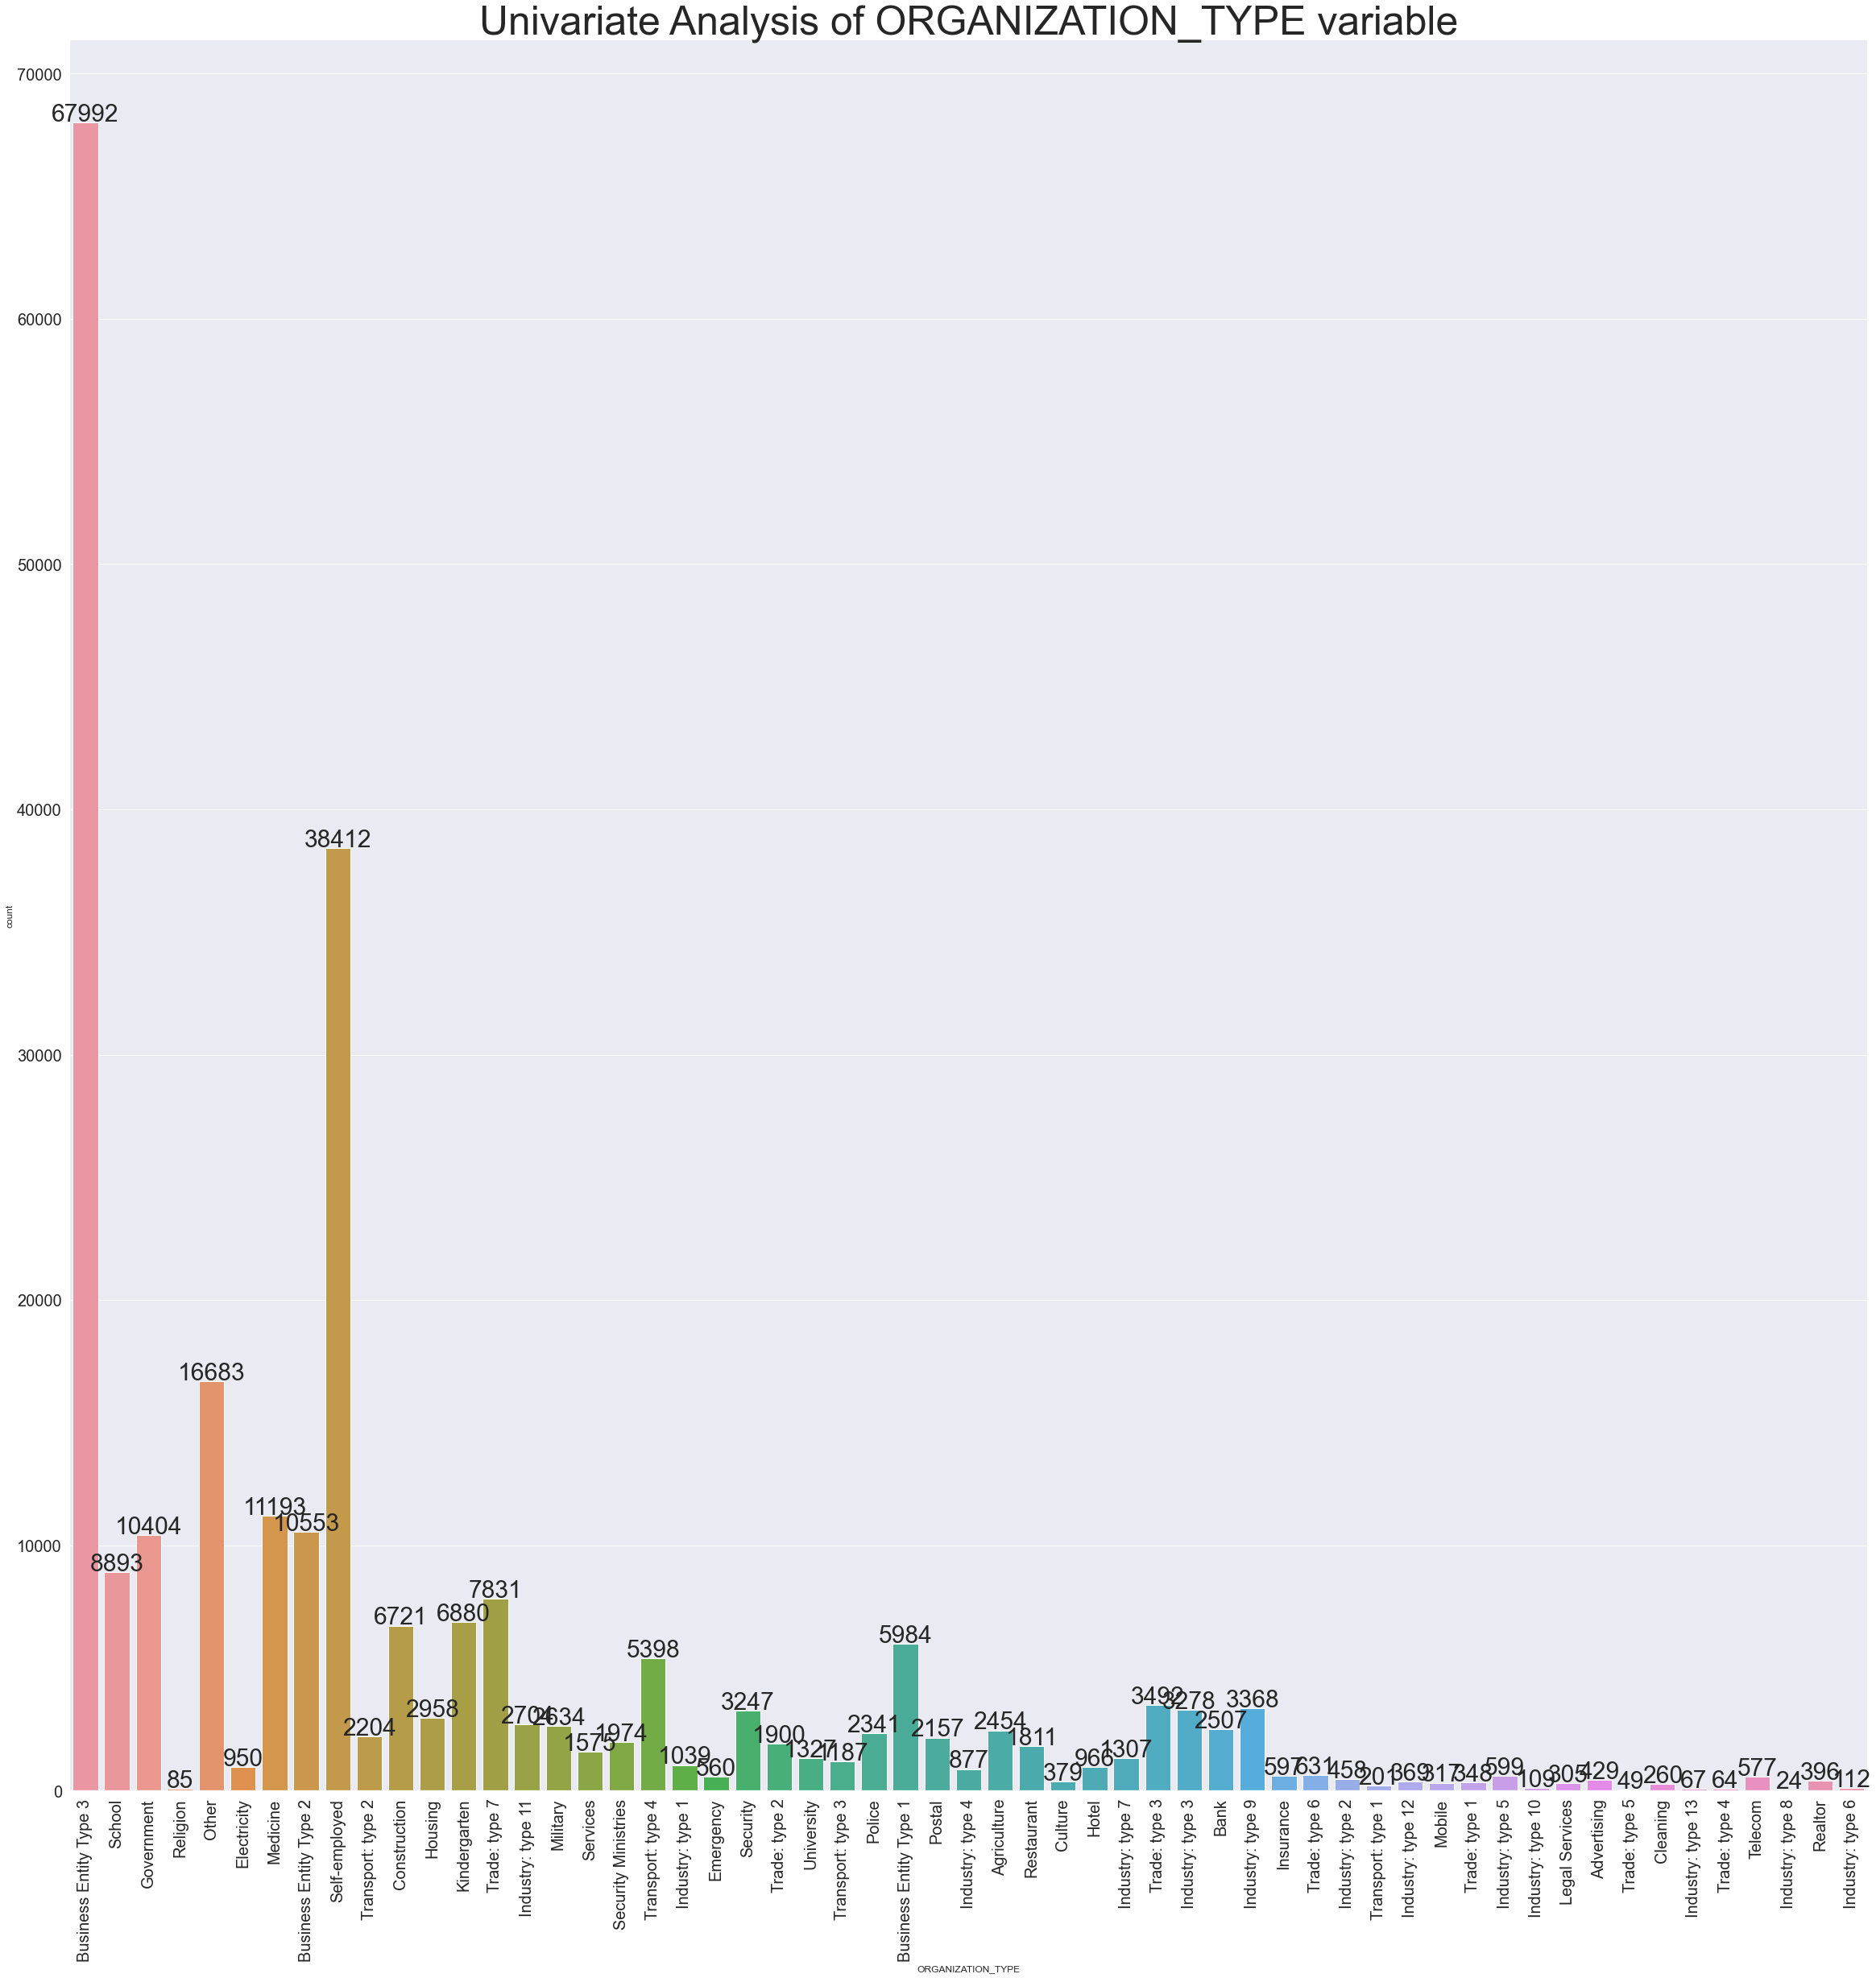

In [52]:
uni(Categorical_Columns[9], rotx=90, dimensions=[40,40], tfont=50, size=30)

### Univariate Analysis - Numeric Variables

In [53]:
# Creating a function to plot graphs with ease for numeric variables:
def uni_num(column,dimensions=[20,10],font=20,tfont=20,rotx=None,histogram=True):
    
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title(f'Univariate Analysis of {column} variable \n', fontdict={'fontsize':tfont})
    sns.distplot(applicationdata[column],hist=histogram)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)     
      
        

In [54]:
Numeric_Columns=['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','AMT_INCOME_TOTAL']

In [55]:
uni_num(Numeric_Columns[0])

From the above we can see that major number of applicants have Loan annuity between 20k-40k

In [56]:
uni_num(Numeric_Columns[1])

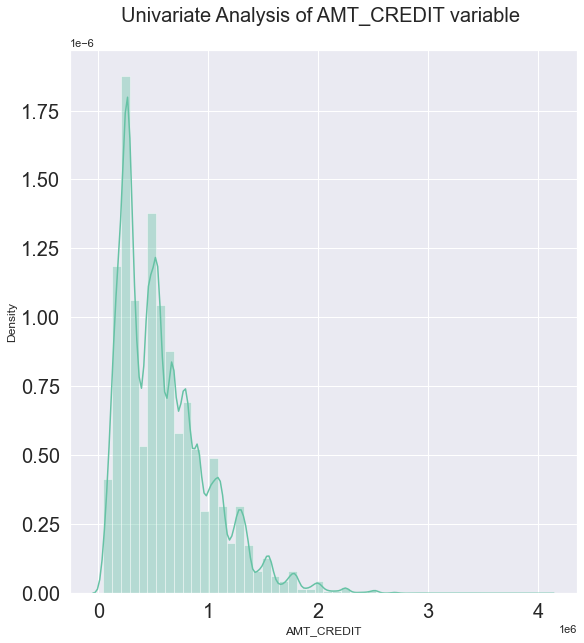

In [57]:
uni_num(Numeric_Columns[2])

From the above distribution plot, we can see that the data is majorly left-skewed and not perfectly distributed,thus, more defaulters exists between the 0 & 1 bins possibly at 0.25-0.50

## Bivariate Analysis of Categorical-Numerical Variables

In [58]:
# Creating a function to determine graphs for Bivariate - Categorical analysis
def bi_num_cat(numv,catv,dimensions=[20,10],rotx=None,font=20, tfont=20):
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    plt.figure(figsize=dimensions)
    sns.boxplot(data=applicationdata,x=catv,y=numv, hue='INCOME_CATEGORY')
    plt.title(f'Bivariate Analysis of {catv} Vs  {numv} variables \n', fontdict={'fontsize':tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
   

### On the basis of Credit

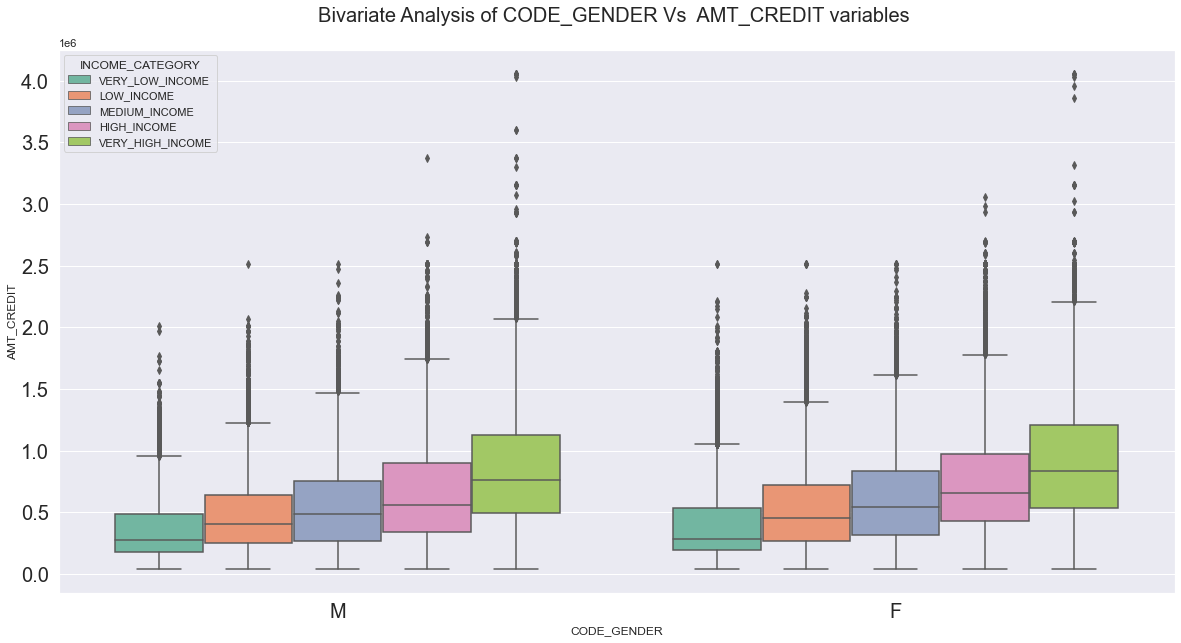

In [59]:
bi_num_cat('AMT_CREDIT','CODE_GENDER')

From the above we can observe that Female applicants of all income categories have slightly higher Credit amount of loan than male applicants 

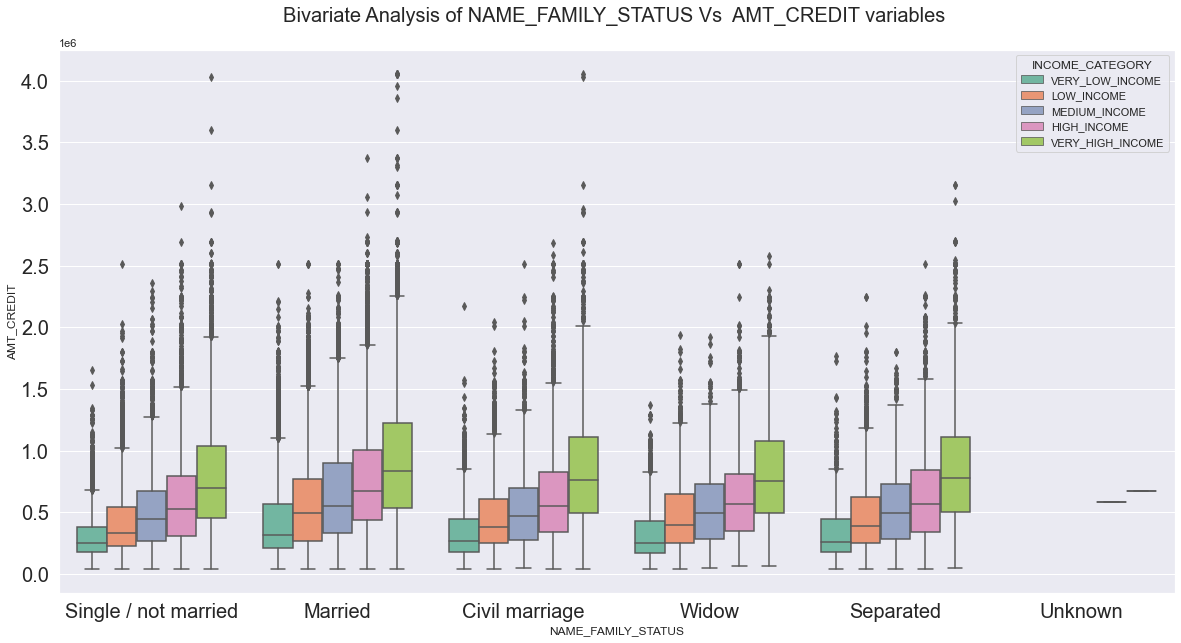

In [60]:
bi_num_cat('AMT_CREDIT','NAME_FAMILY_STATUS')

From the above we can see that "Married" applicants of all income categories have high number of credit amount of loans

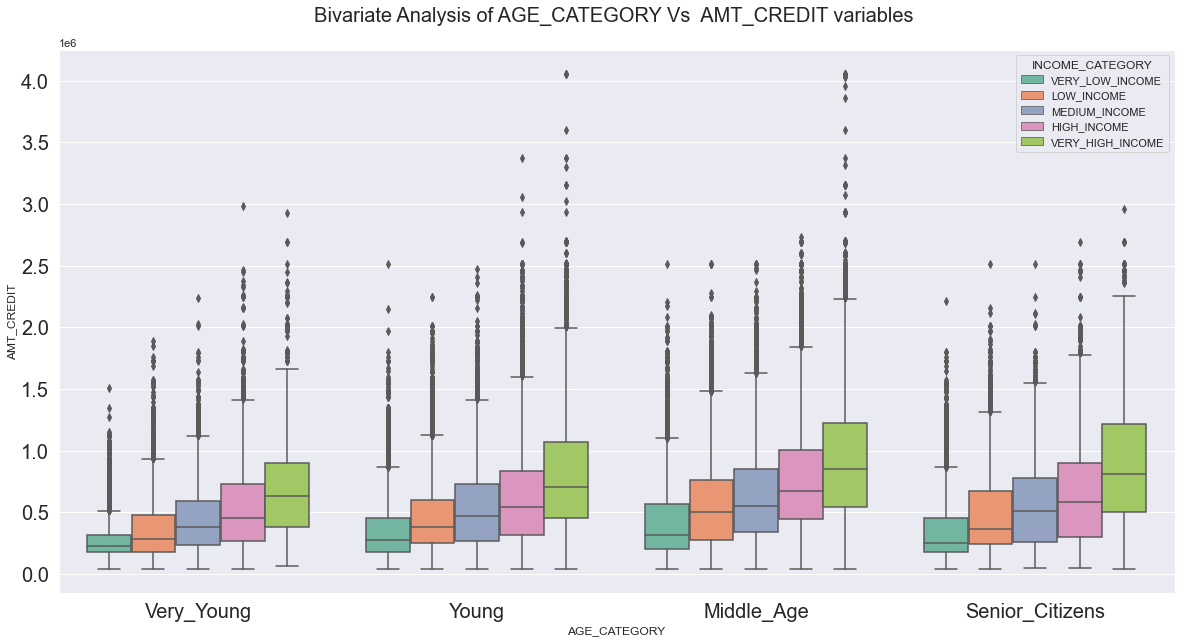

In [61]:
bi_num_cat('AMT_CREDIT','AGE_CATEGORY')

From the above we can say that Middle_Age & Senior_Citizens group has most number of credit amount alloted for all income categories

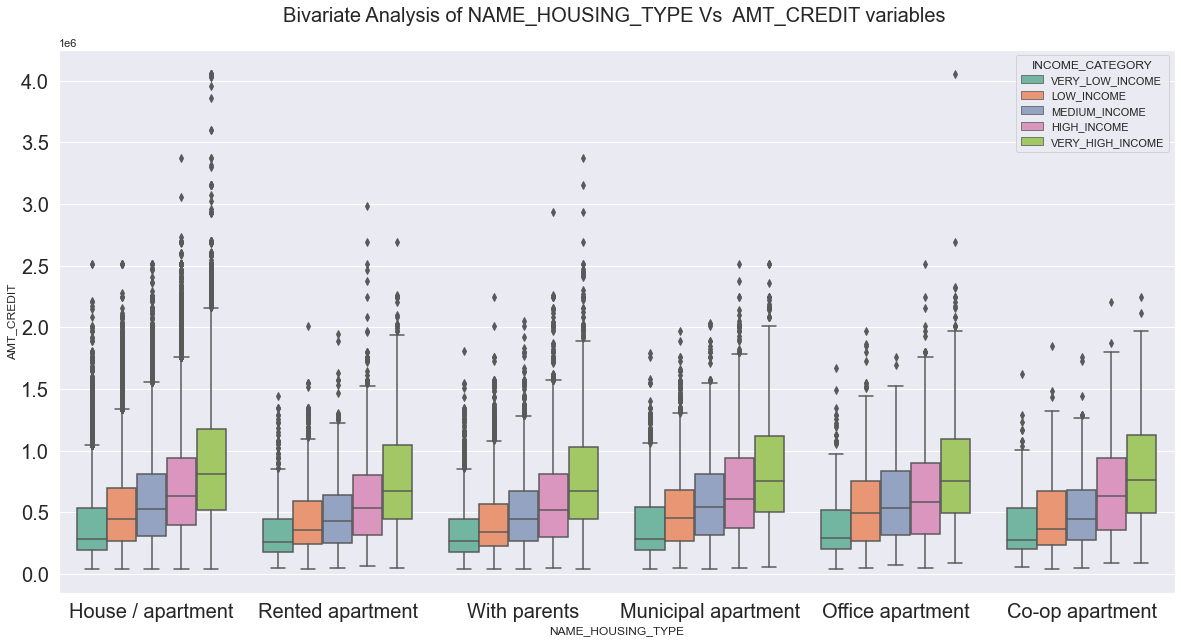

In [62]:
bi_num_cat('AMT_CREDIT','NAME_HOUSING_TYPE')

From the above we can conclude that House/Apartment category has high number of credit amount than others considering the income category

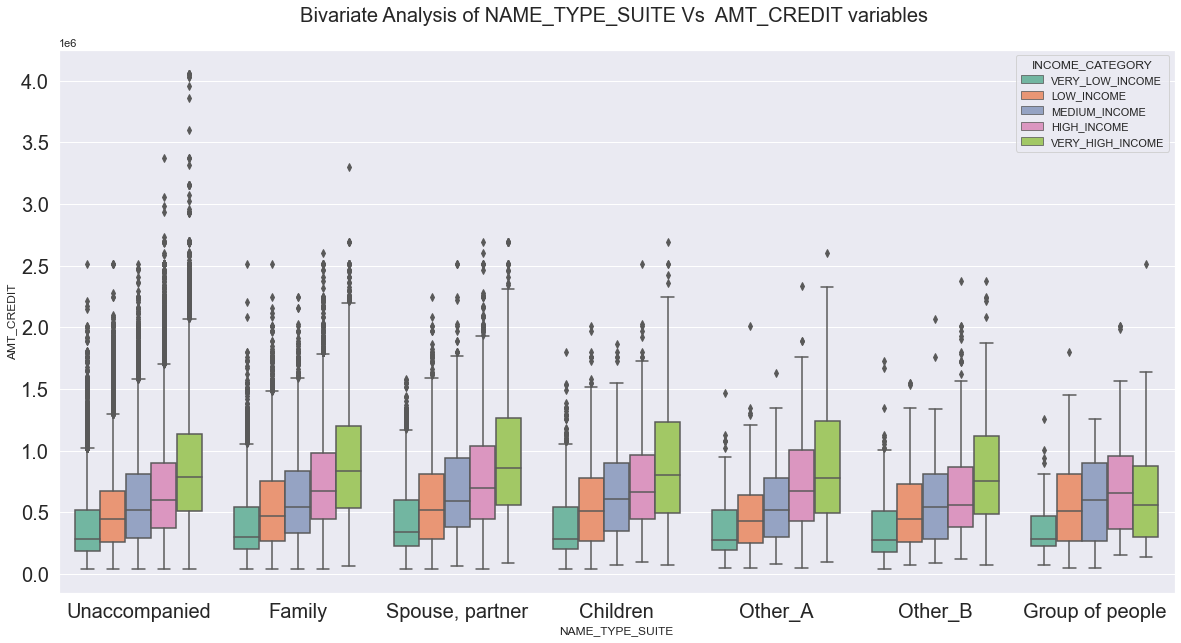

In [63]:
bi_num_cat('AMT_CREDIT','NAME_TYPE_SUITE')

From the above, it looks like "Spouse,partner" and "Family" categories have slightly higher credit amounts across all income categories

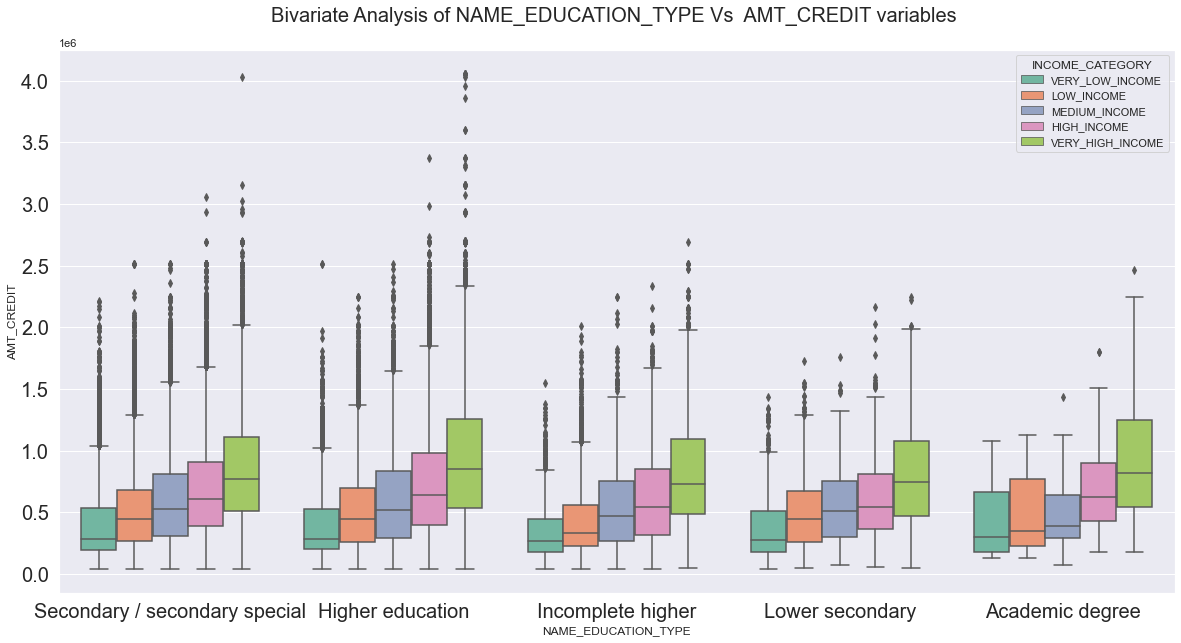

In [64]:
bi_num_cat('AMT_CREDIT','NAME_EDUCATION_TYPE')

On the basis of above chart, we can observe that the Higher Education and Academic degree categories have higher credit amounts allot across all income ranges 

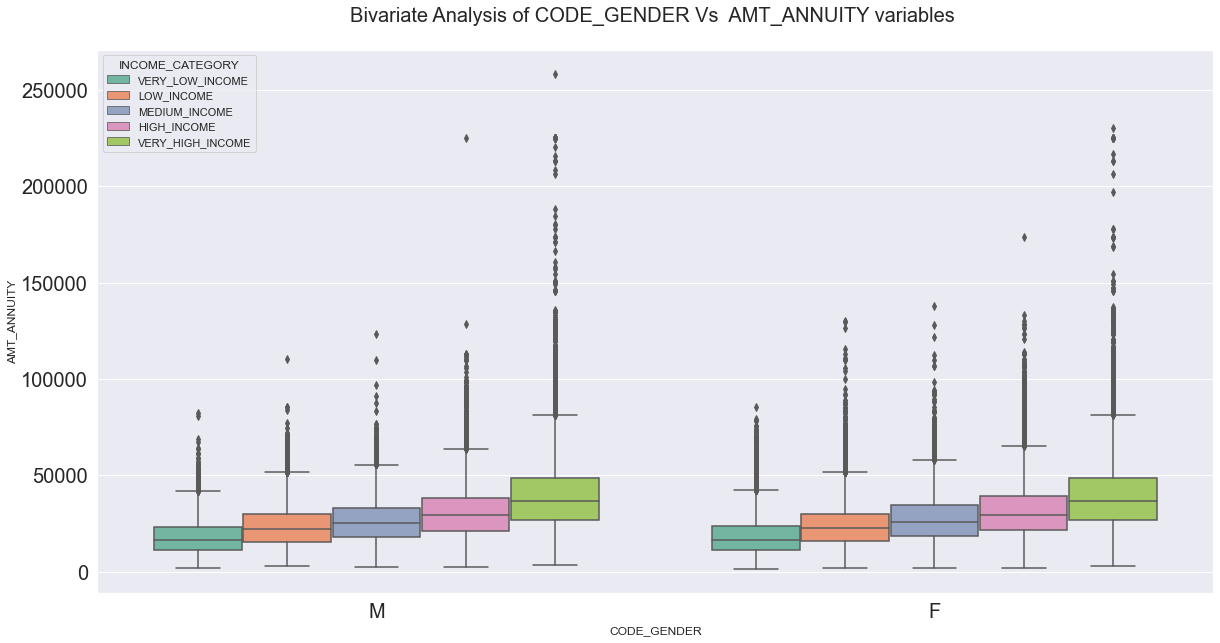

In [65]:
bi_num_cat('AMT_ANNUITY','CODE_GENDER')

From the above we can see that loan annuity of Male applicants is slightly higher than the Female applicants

### On the basis of Annuity

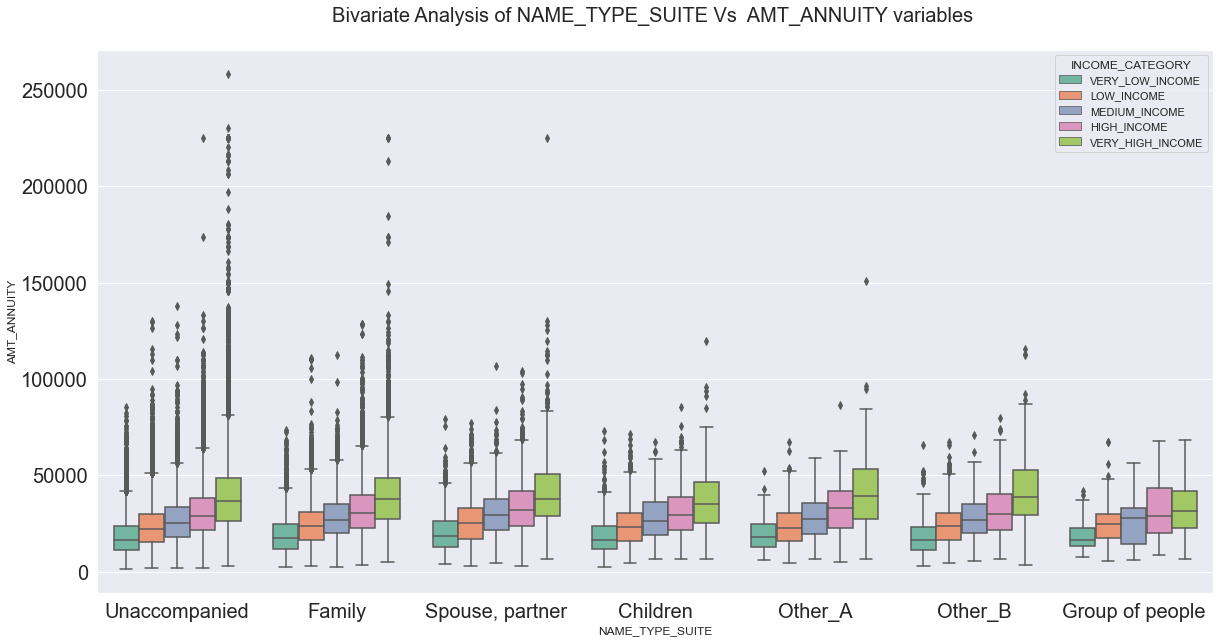

In [66]:
bi_num_cat('AMT_ANNUITY','NAME_TYPE_SUITE')

From the above we can depict that "Unaccompanied" category has major number of loan annuity alloted accros income categories

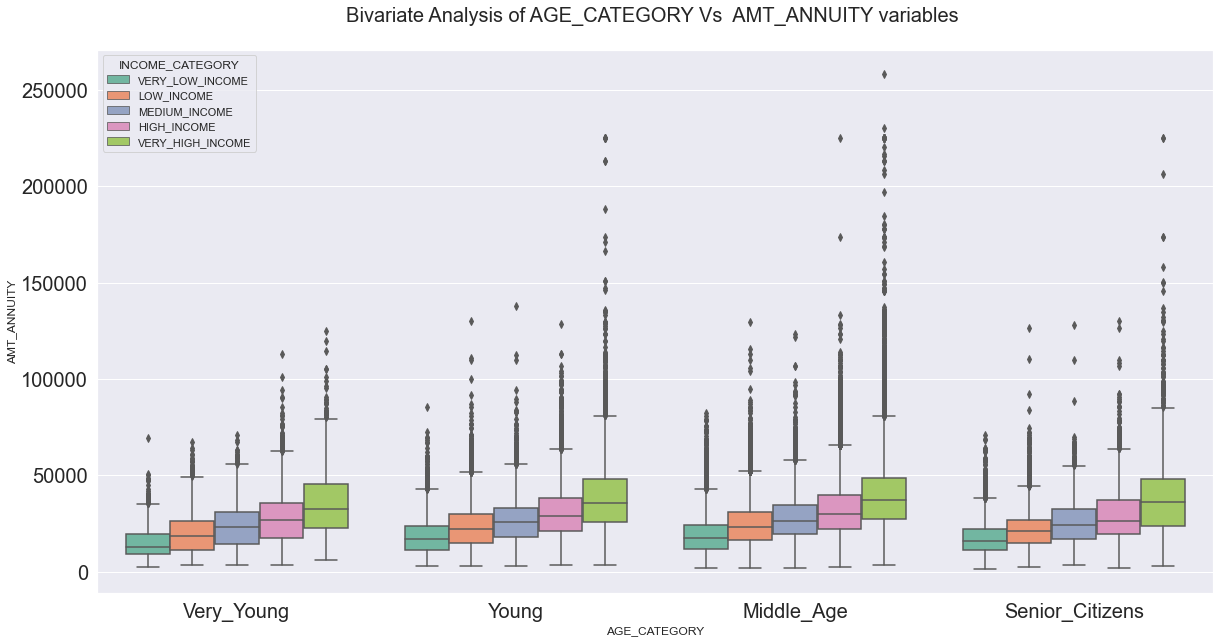

In [67]:
bi_num_cat('AMT_ANNUITY','AGE_CATEGORY')

From the above we can say that Very_Young and Young age applicants have slightly higher Loan Annuity

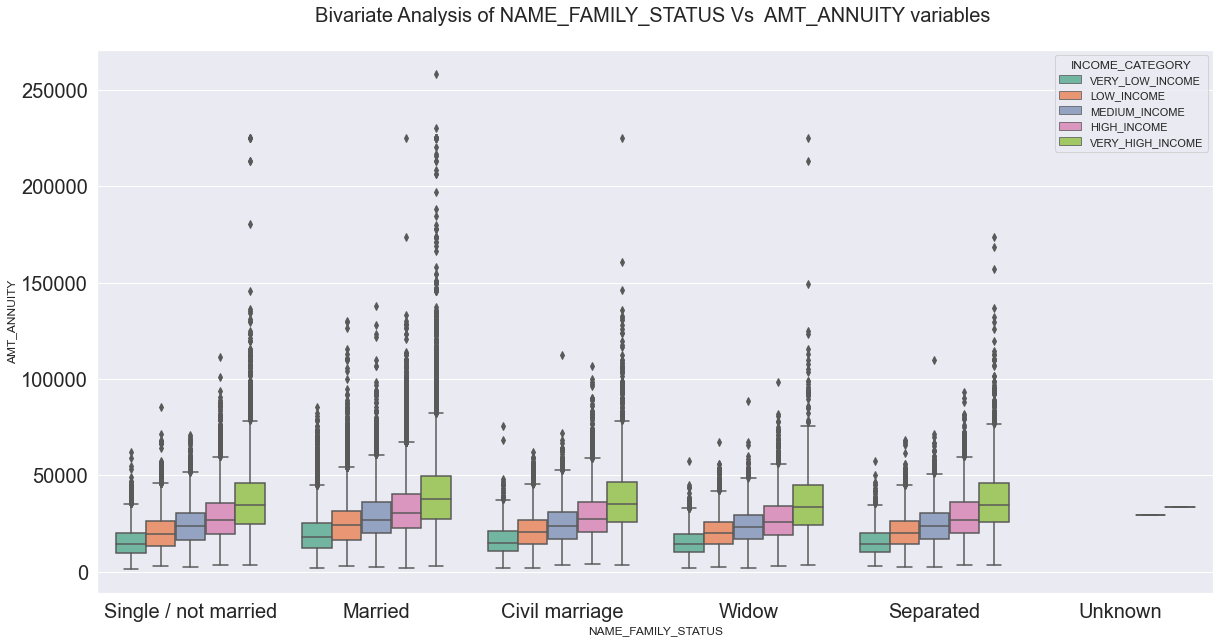

In [68]:
bi_num_cat('AMT_ANNUITY','NAME_FAMILY_STATUS')

From the above observations, we can observe that Single & Married applicants have slightly higher Loan annuity

In [69]:
bi_num_cat('AMT_ANNUITY','NAME_HOUSING_TYPE')

From the above , we can see that applicants residing in House/Apartment have more loan annuity across various income categories compared to other Housing_Type categories

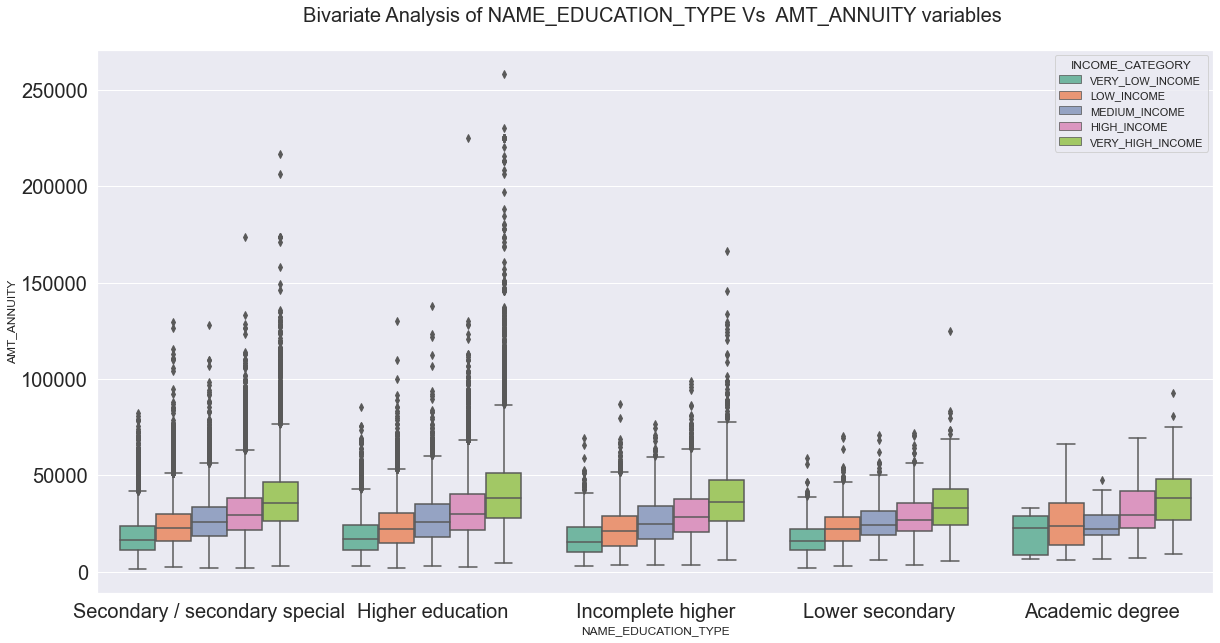

In [70]:
bi_num_cat('AMT_ANNUITY','NAME_EDUCATION_TYPE')

From the above chart we can conclude that Higher Education and Secondary Education categories have higher loan annuity

## Bivariate Analysis of Numerical-Numerical Variables

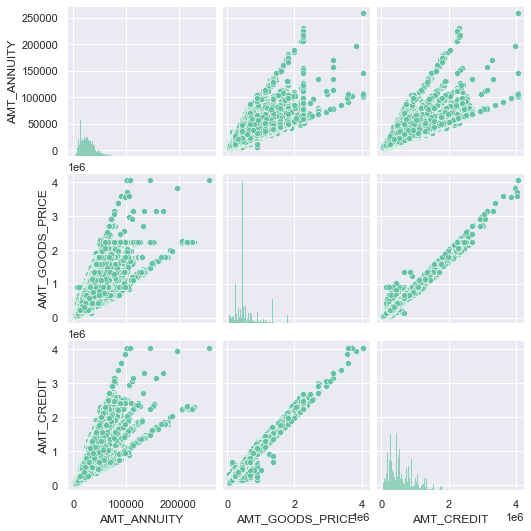

In [71]:
# Using Pairplot to show the visuals of 3 numeric columns in the form of scatter plots and how relationship amongst them looks
sns.pairplot(applicationdata[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']])
plt.show()

From the above Pairplot, we can see clear visuals of all 3 Numeric variables, where in there is slightly higher positive correlation amongst the AMT_GOODS_PRICE & AMT_CREDIT variables compared to other combinations of numeric variables

## Segmented Analysis  - On the basis of TARGET variable

## Target Variable:

Imbalance:

Target variable: (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

In [72]:
# Let's deep dive how this variable is spread
plt.figure(figsize=[10,5])
tar=pd.DataFrame(applicationdata.TARGET.value_counts())
tar.reset_index(inplace=True)
tar.rename(columns={'index':'col1'}, inplace=True)
sns.barplot(data=tar,x=tar.col1,y=tar['TARGET'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Target Variable Imbalance\n", fontdict={'fontsize':15})
plt.show()

From the above, it looks like there are very less (approximately 2,500) applications that had payment difficulties

Before diving deep into analysis stage, it would be better to divide the Target Variable into 2 sub-datasets one or each category of variable so that the bifurcated analysis would be insightful


In [73]:
#Dividing dataset into 2 sub-datasets on the basis of target variable

t0=applicationdata[applicationdata.TARGET==0]
t1=applicationdata[applicationdata.TARGET==1]


In [74]:
t0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
8                Y             0          112500.0   1019610.0      33826.5   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
8          913500.0         Children             Pensioner   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
8   Secondary / secondary special               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                     0.003541          45           1188             1186.0   
2                     0.010032          52            225             4260.0   
3                     0.008019          52           3039             9833.0   
4                     0.028663          54           3038             4311.0   
5                     0.035792          46           1588             4970.0   
6                     0.035792          37           3130             1213.0   
7                     0.003122          51            449             4597.0   
8                     0.018634          55         365243             7427.0   
9                     0.019689          39           2019            14437.0   
10                   

##  Segmented - Univariate Analysis of Categorical Variables on the basisc of 'Target' Variable

In [75]:
#Creating a function to plot countplots for categorical variables for both Target 0 & 1
def unis(t0var,t1var,dimensions=[20,10],font=20,tfont=20,rotx=None,size=15):
    #t0valuecounts=pd.DataFrame(t0var.value_counts())
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    #Non-Defaulter plot
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title('0 - Non-Defaulter\n', fontdict={'fontsize':tfont})
    splot=sns.countplot(x=t0var)
    for p in splot.patches:
        splot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    #Defaulter plot
    plt.subplot(1,2,2)
    plt.title('1 - Defaulter\n', fontdict={'fontsize': tfont})
    gplot=sns.countplot(x=t1var)
    for p in gplot.patches:
        gplot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    
    

#### On the Basis of Gender

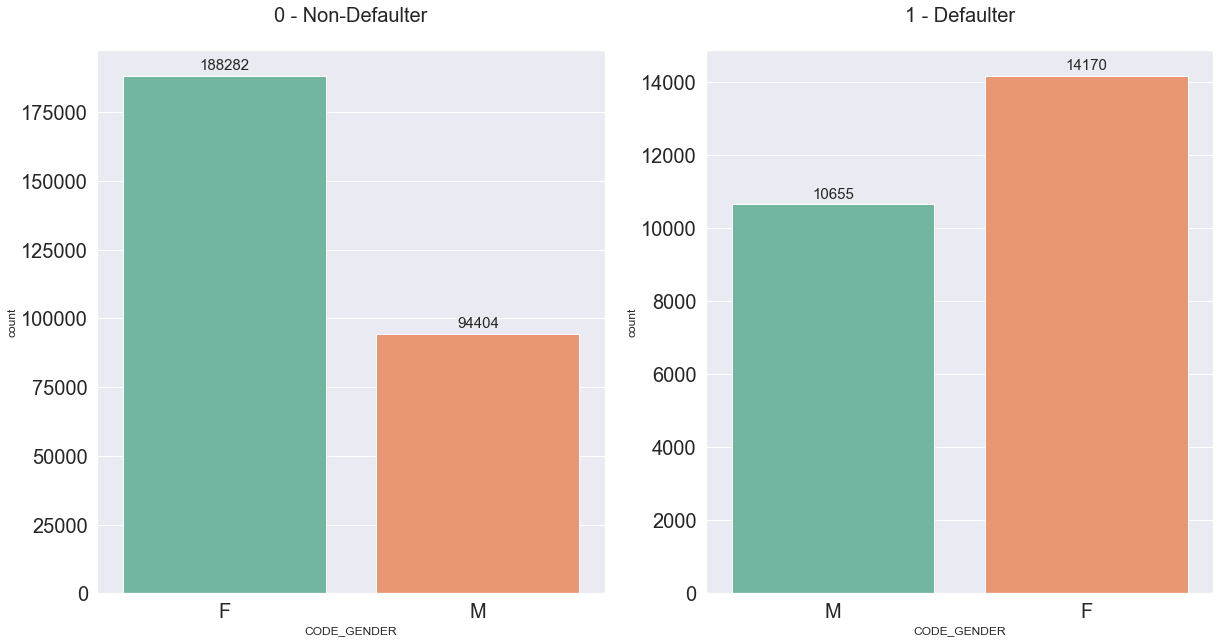

In [76]:
unis(t0.CODE_GENDER,t1.CODE_GENDER)

 From the above it is depicted that Female applications are high in both Defaulters & Non-defaulters but Male applicants are higher in Defaulters

#### On the Basis of NAME_TYPE_SUITE

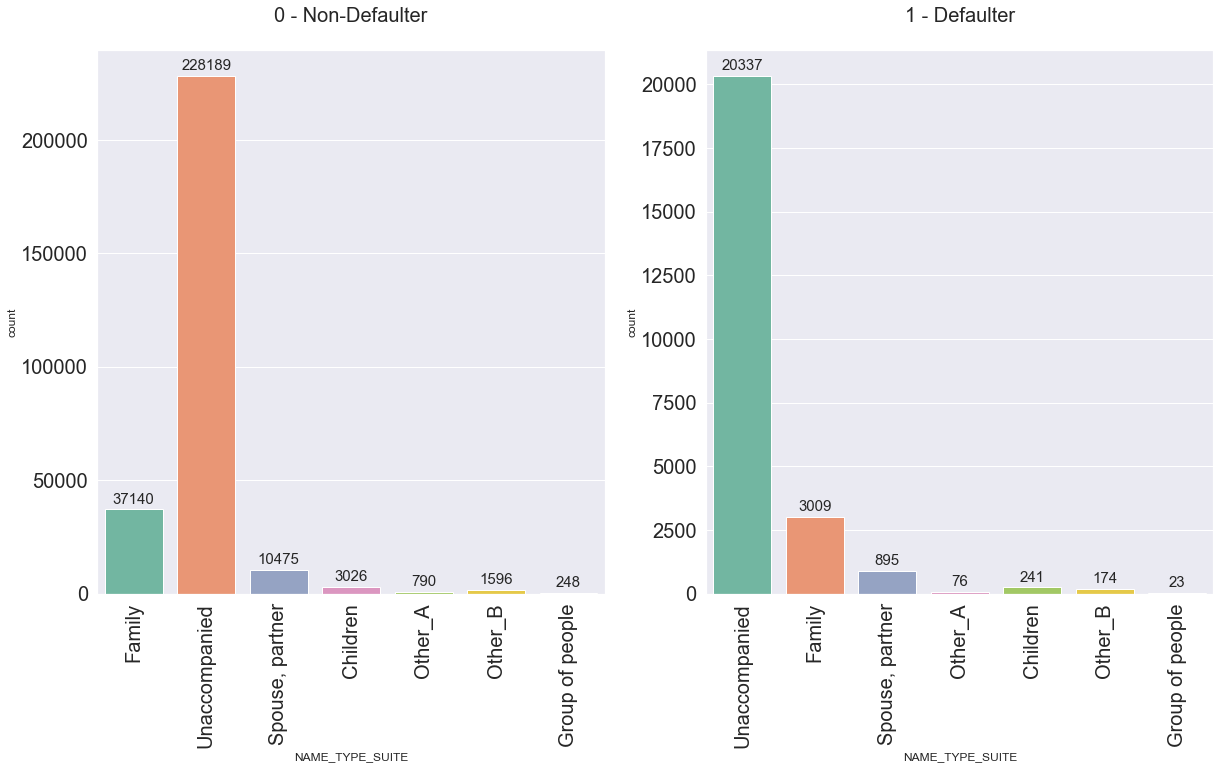

In [77]:
unis(t0.NAME_TYPE_SUITE,t1.NAME_TYPE_SUITE, rotx=90)

From the above it is clear that "Unaccompanied" applications are high defaulters & non-defaulters

#### On the Basis of AGE_CATEGORY

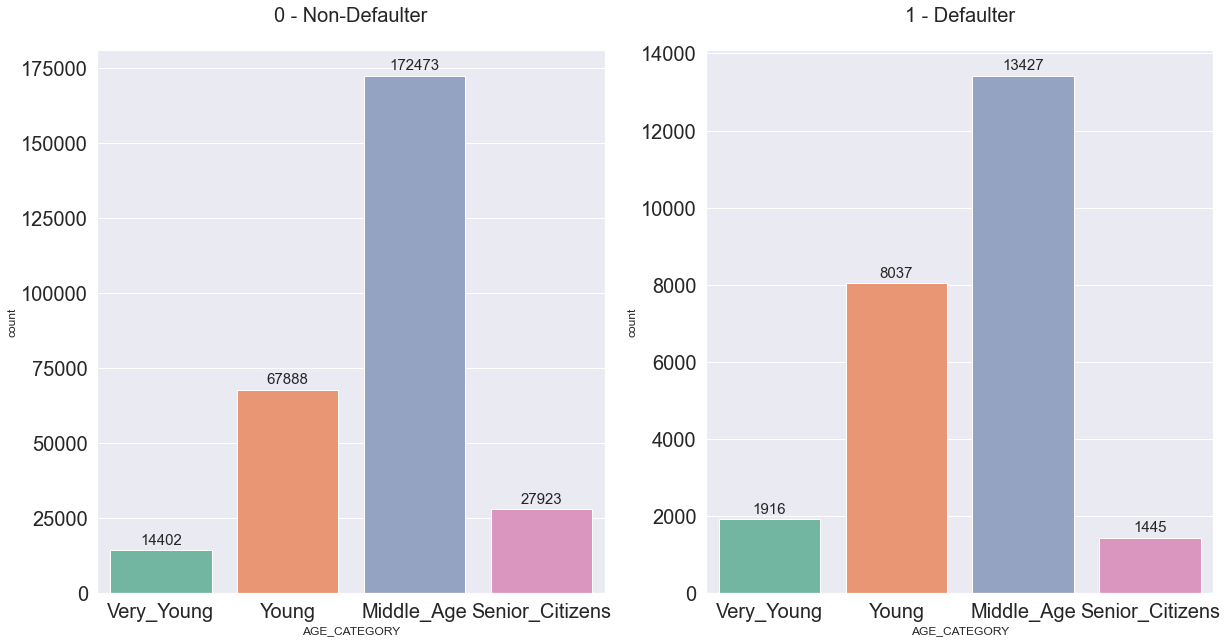

In [78]:
unis(t0.AGE_CATEGORY,t1.AGE_CATEGORY)

From the above it is observed that apart from Middle_Age, Young applicants will highly tend to default

#### On the Basis of NAME_CONTRACT_TYPE

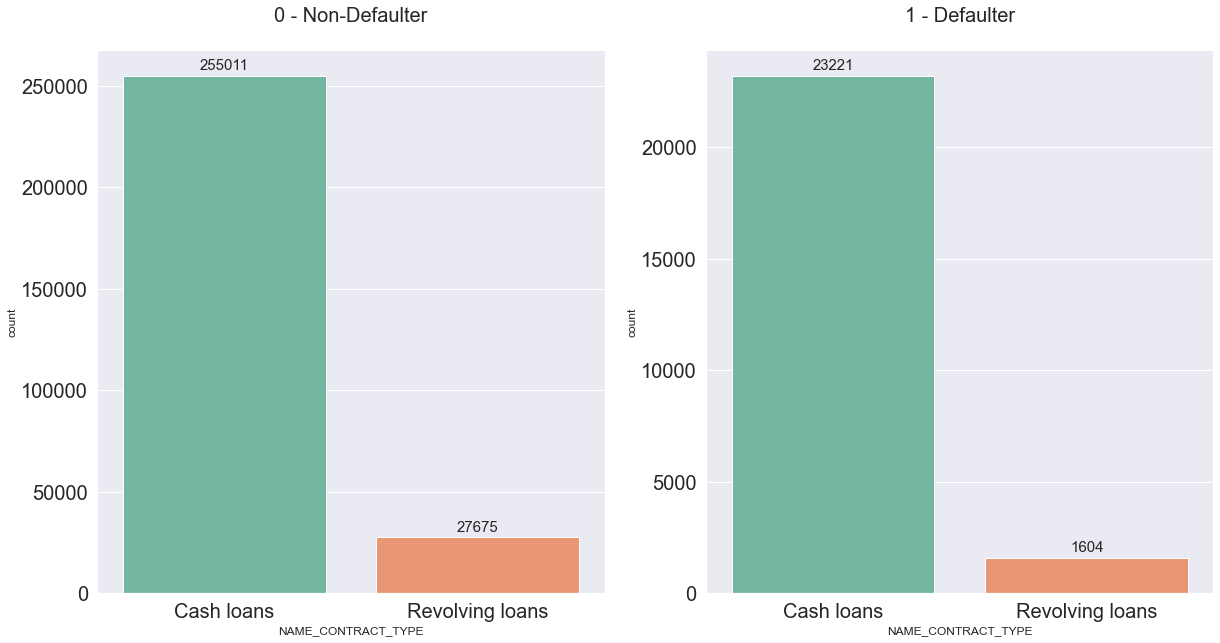

In [79]:
unis(t0.NAME_CONTRACT_TYPE,t1.NAME_CONTRACT_TYPE)

From the above we can see cash loan applicants will tend to highly default because cash loans have option to withdraw money from bank without keeping any credit balance, where in in revolving loans there is a limit set by the bank

#### On the Basis of INCOME_CATEGORY

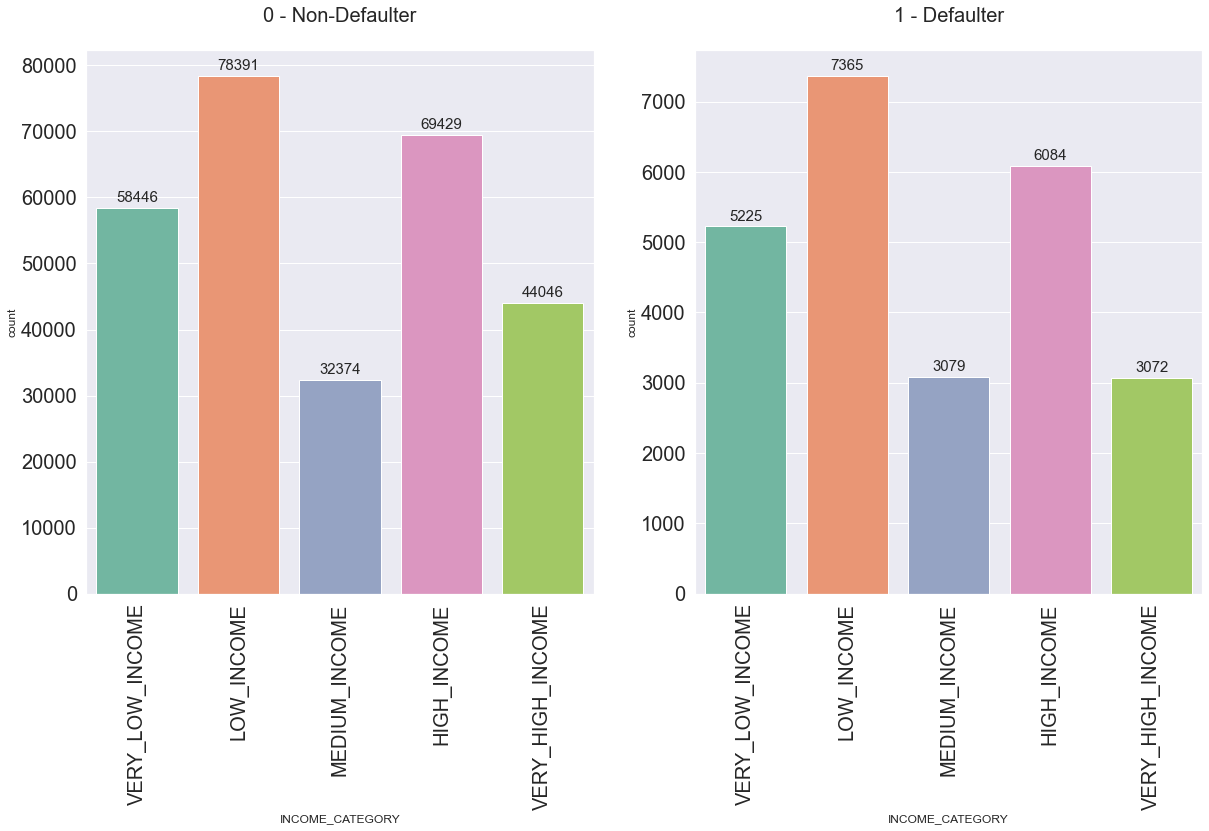

In [80]:
unis(t0.INCOME_CATEGORY,t1.INCOME_CATEGORY,rotx=90)

#### On the basis of NAME_INCOME_TYPE

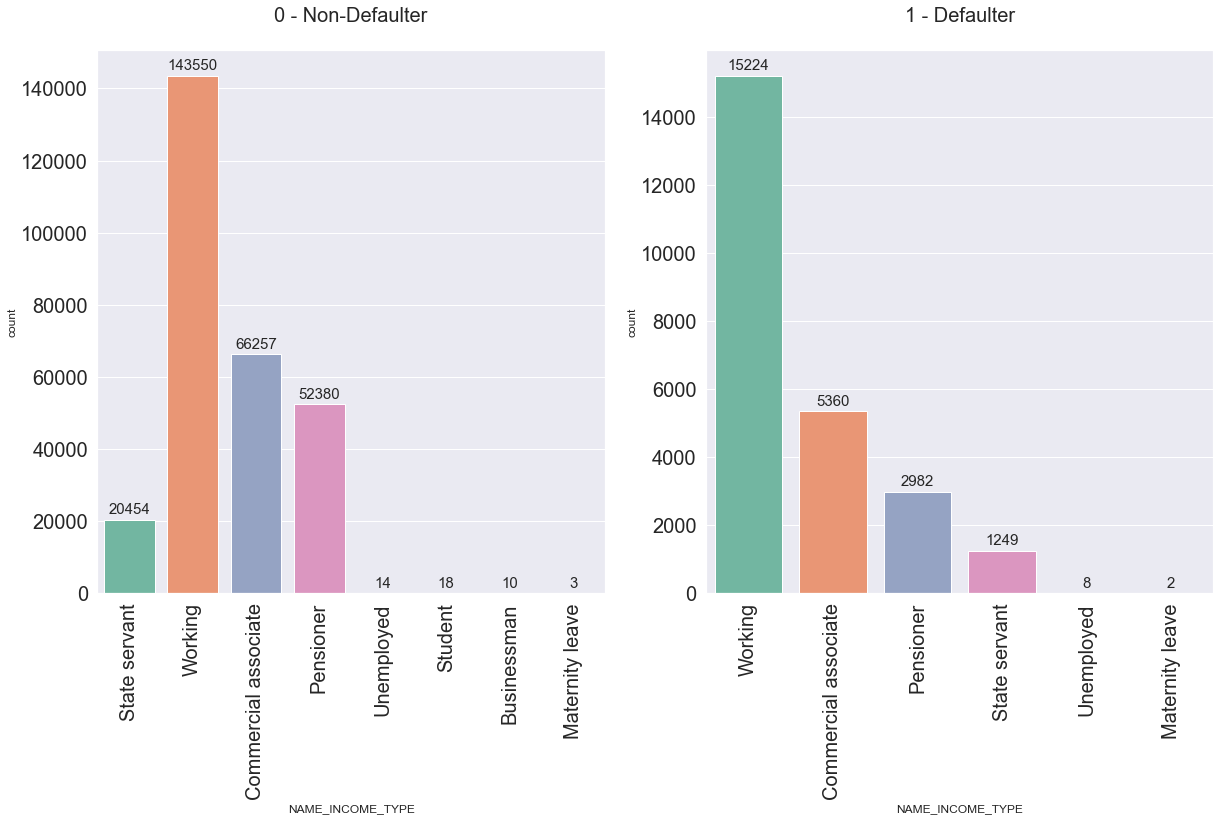

In [81]:
unis(t0.NAME_INCOME_TYPE,t1.NAME_INCOME_TYPE,rotx=90)

From the above observation we can see that there is increase in Working applicants tend to default but there is a decline in Pensioner applicants to default

#### On the basis of NAME_EDUCATION_TYPE

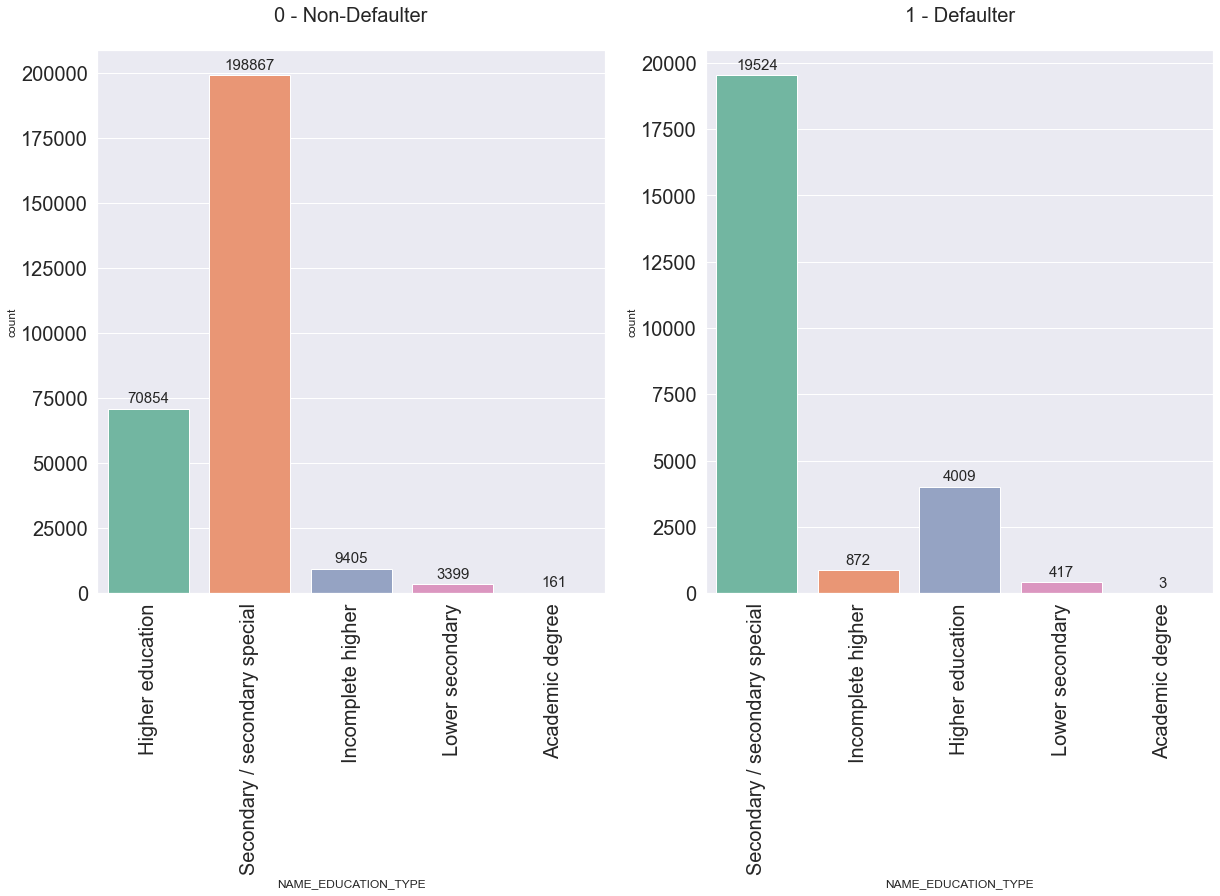

In [82]:
unis(t0.NAME_EDUCATION_TYPE,t1.NAME_EDUCATION_TYPE,rotx=90)

From the above observation, we can see applicants who are having secondary education will tend to default or might have payment difficulties

#### On the basis of NAME_FAMILY_STATUS

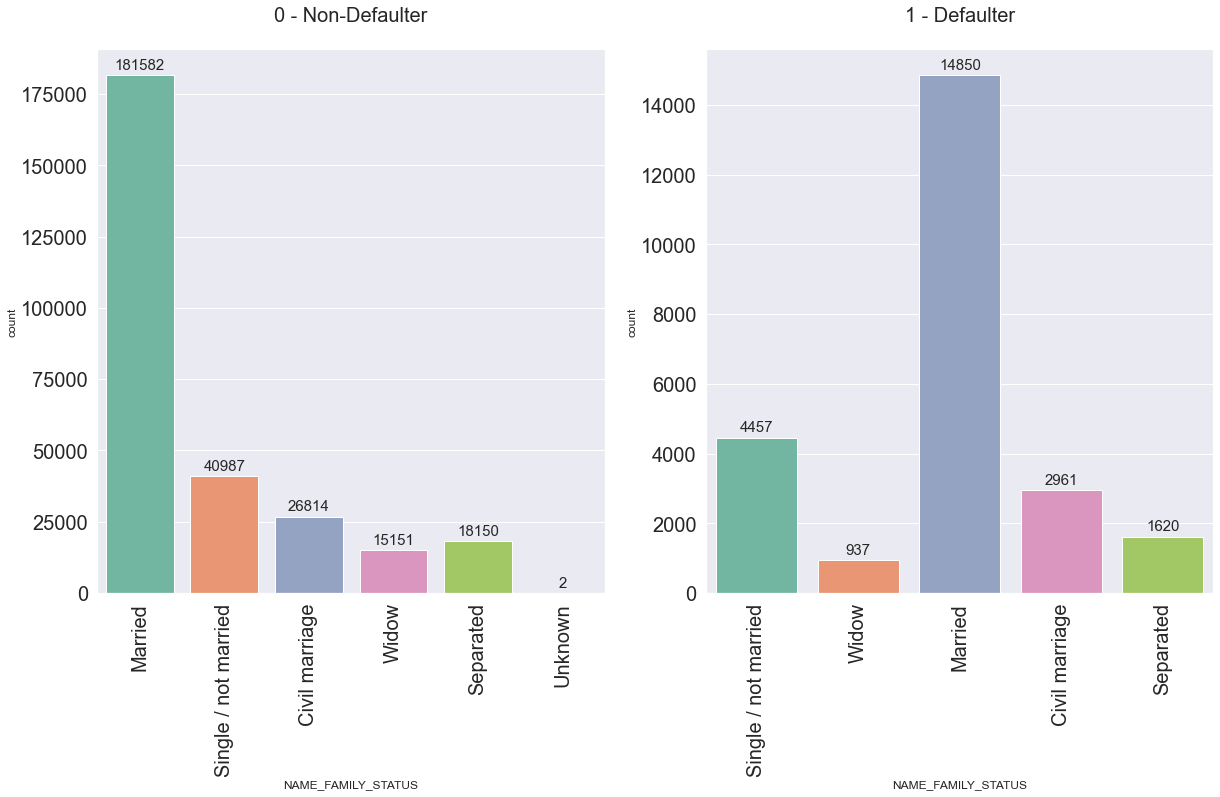

In [83]:
unis(t0.NAME_FAMILY_STATUS,t1.NAME_FAMILY_STATUS, rotx=90)

From the above observation, There is a slight increase in "Civil marriage" applicants to default the loan, and slight decrease in "Widow" to default the loan, apart from the "Married".

#### On the basis of NAME_HOUSING_TYPE

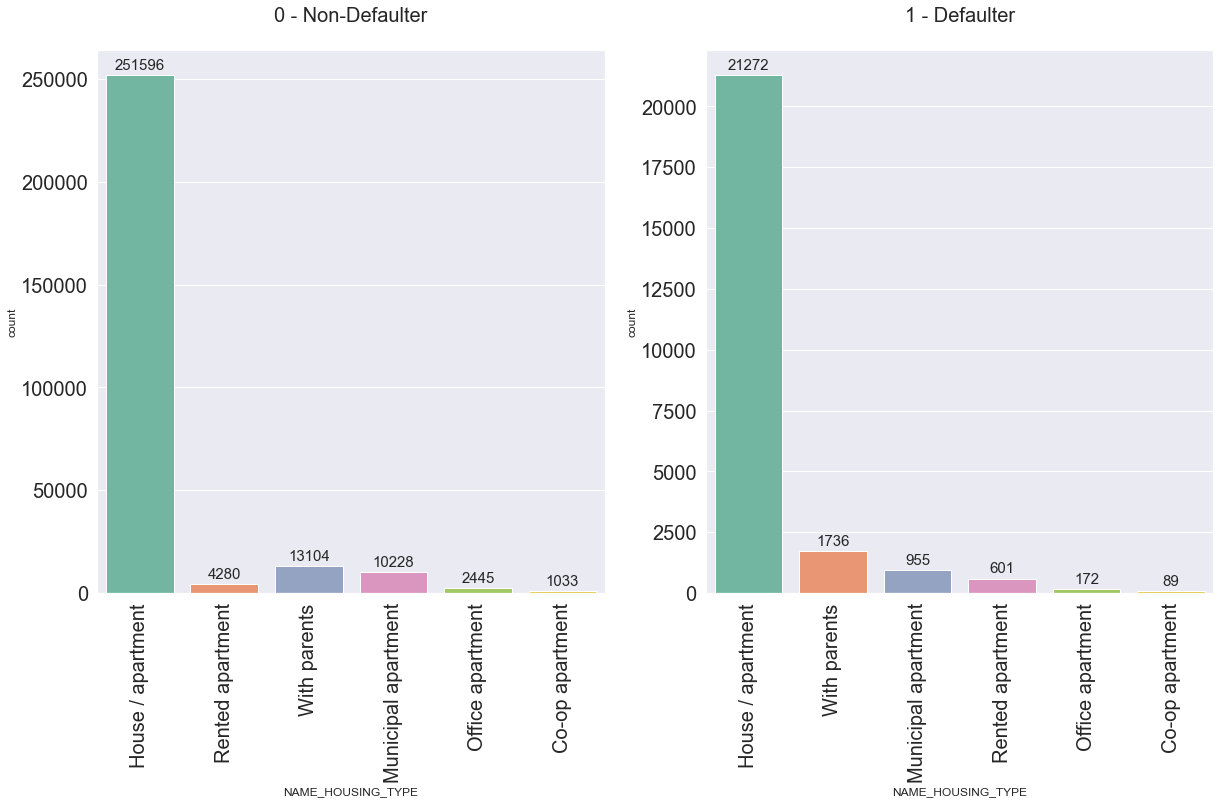

In [84]:
unis(t0.NAME_HOUSING_TYPE,t1.NAME_HOUSING_TYPE, rotx=90)

From the above observation, we can see that there is increase in applicants to default who live with their parents.

#### On the basis of ORGANIZATION_TYPE

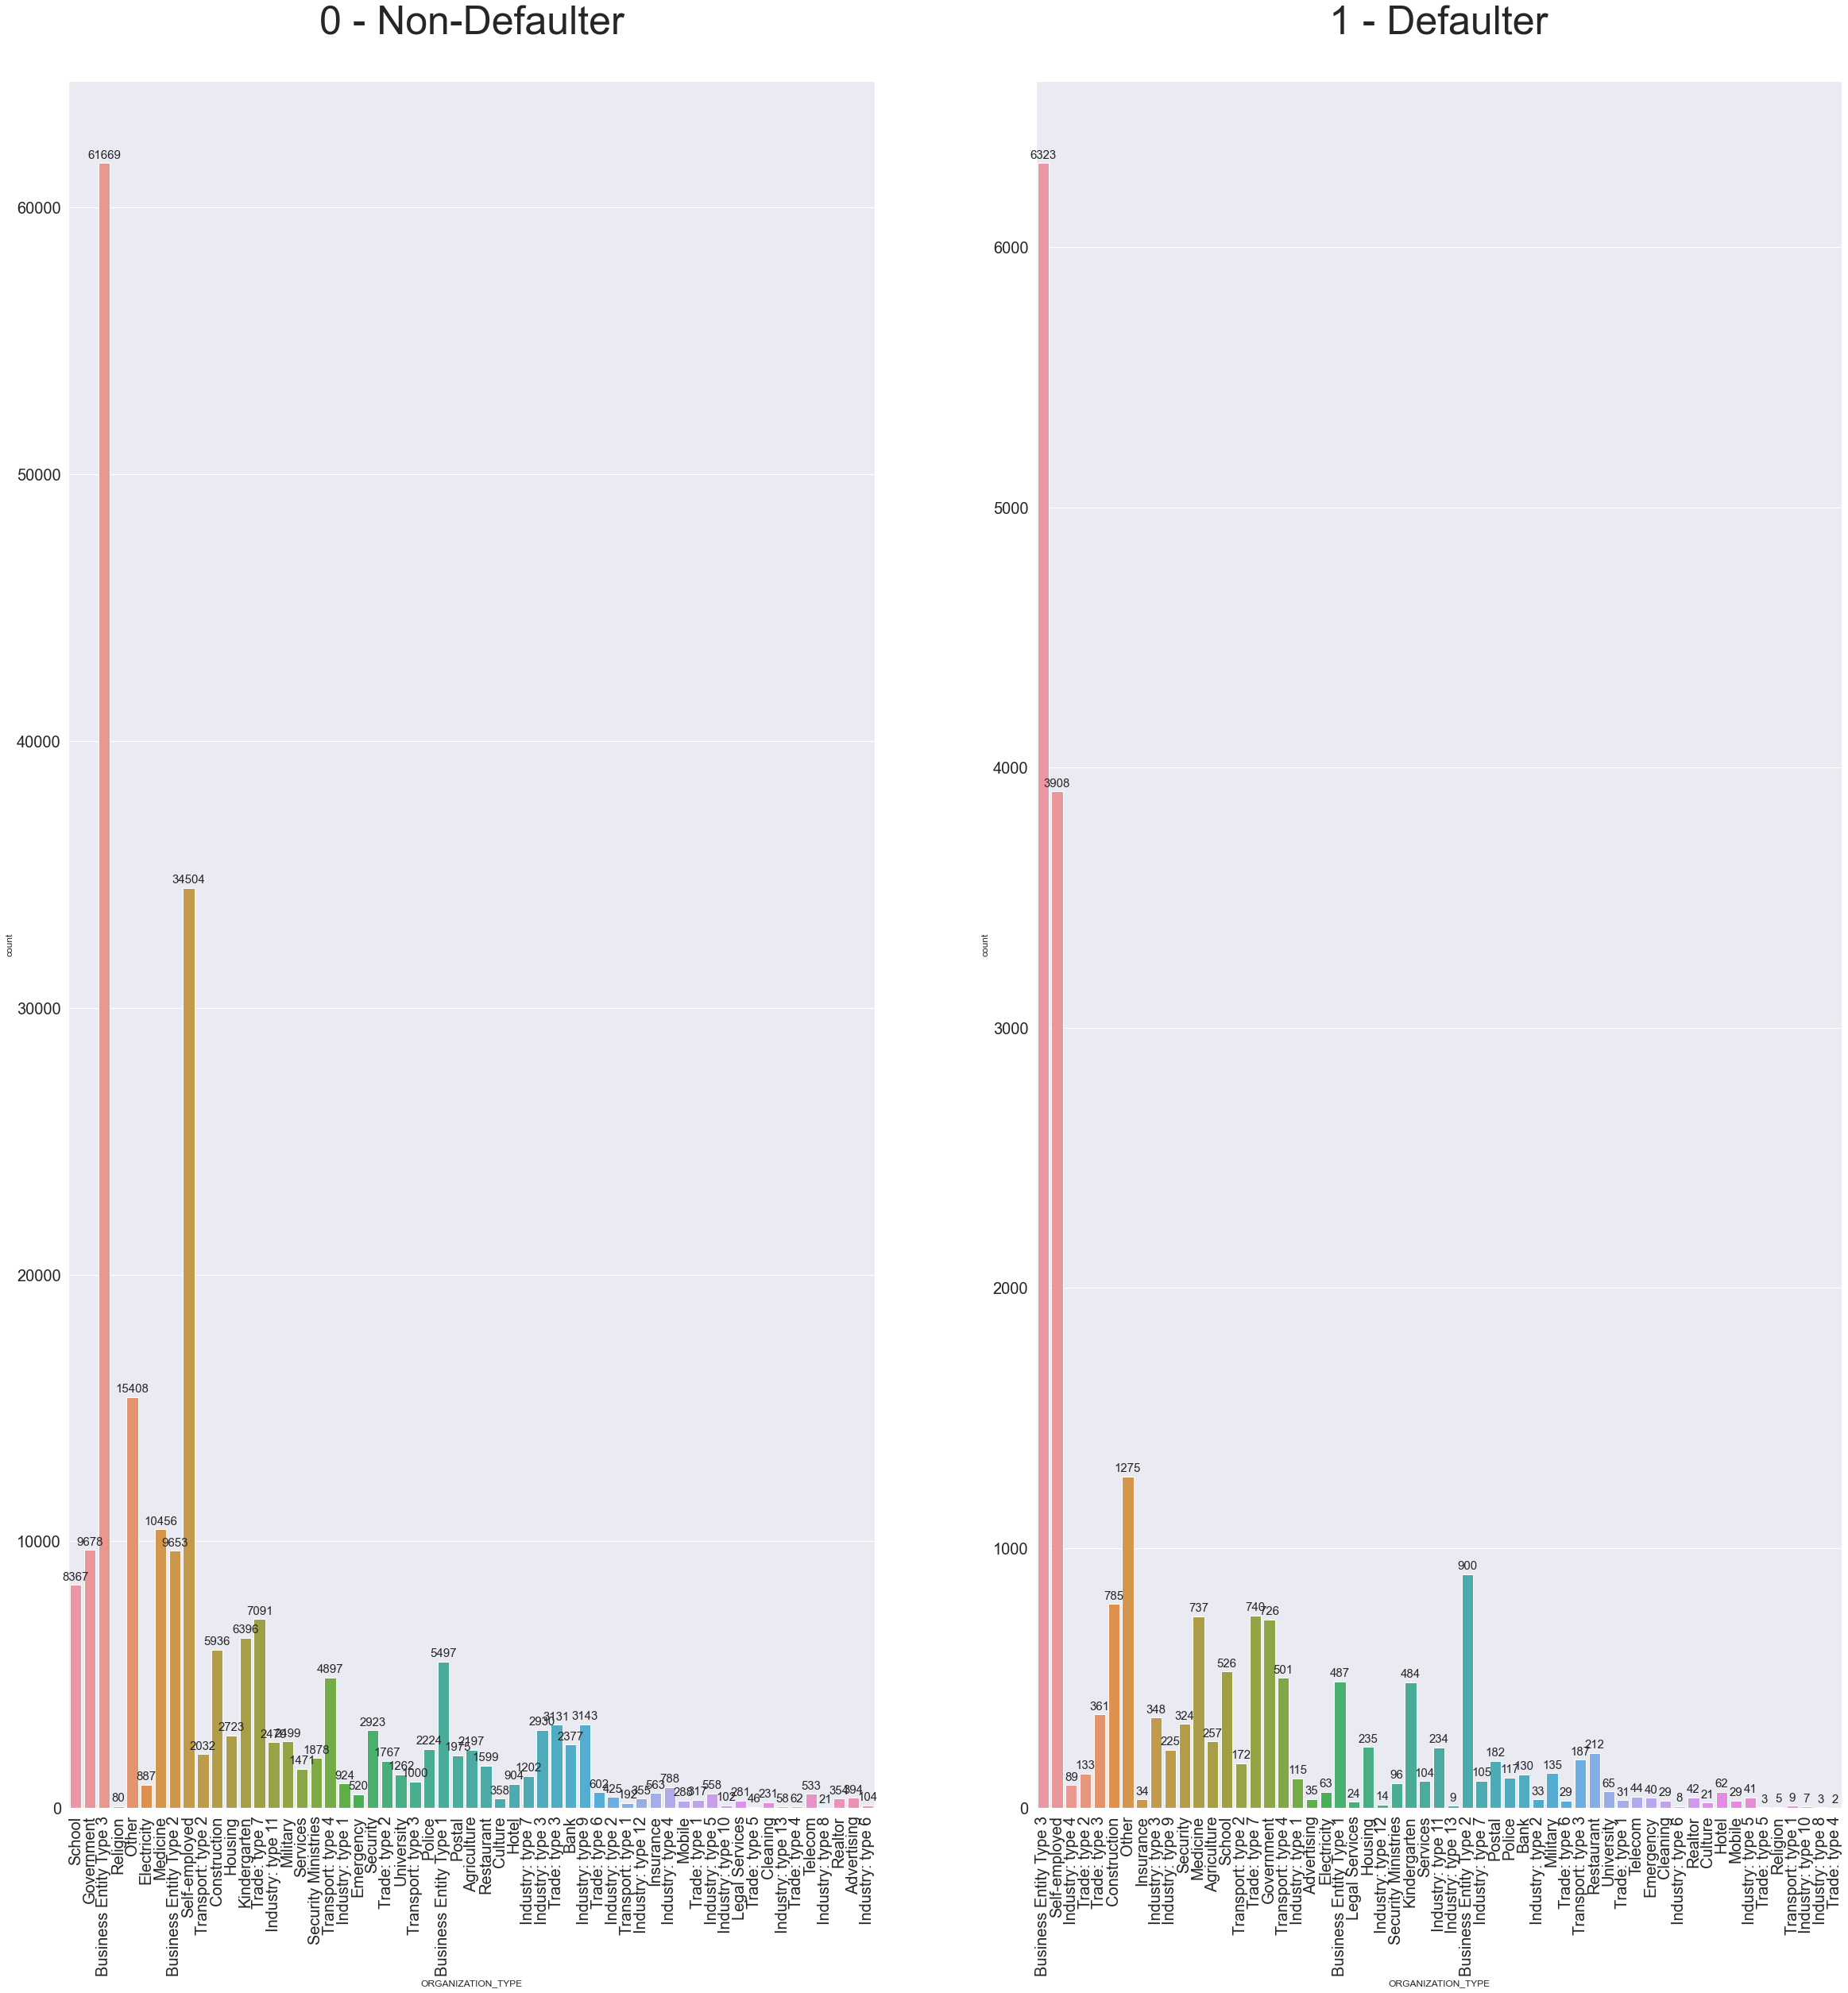

In [85]:
unis(t0.ORGANIZATION_TYPE,t1.ORGANIZATION_TYPE, rotx=90, dimensions=[40,40], tfont=50)

From the above, we can't observe anything concrete

## Segmented - Univariate Analysis of Numeric Variables on the basisc of 'Target' Variable

In [86]:
#Creating a function to plot numeric variables for both Target 0 & 1
def uni_nums(t0var,t1var,dimensions=[20,10],font=20,tfont=20,rotx=None,histogram=True):
    #t0valuecounts=pd.DataFrame(t0var.value_counts())
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    #Non-Defaulter plot
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title('0 - Non-Defaulter\n', fontdict={'fontsize':tfont})
    sns.distplot(t0var,hist=histogram)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    #Defaulter plot
    plt.subplot(1,2,2)
    plt.title('1 - Defaulter\n', fontdict={'fontsize': tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    sns.distplot(t1var,hist=histogram)

In [87]:
t0.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
8                Y             0          112500.0   1019610.0      33826.5   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
8          913500.0         Children             Pensioner   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
8   Secondary / secondary special               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                     0.003541          45           1188             1186.0   
2                     0.010032          52            225             4260.0   
3                     0.008019          52           3039             9833.0   
4                     0.028663          54           3038             4311.0   
5                     0.035792          46           1588             4970.0   
6                     0.035792          37           3130             1213.0   
7                     0.003122          51            449             4597.0   
8                     0.018634          55         365243             7427.0   
9                     0.019689          39           2019            14437.0   
10                   

#### On the basis of  AMT_CREDIT

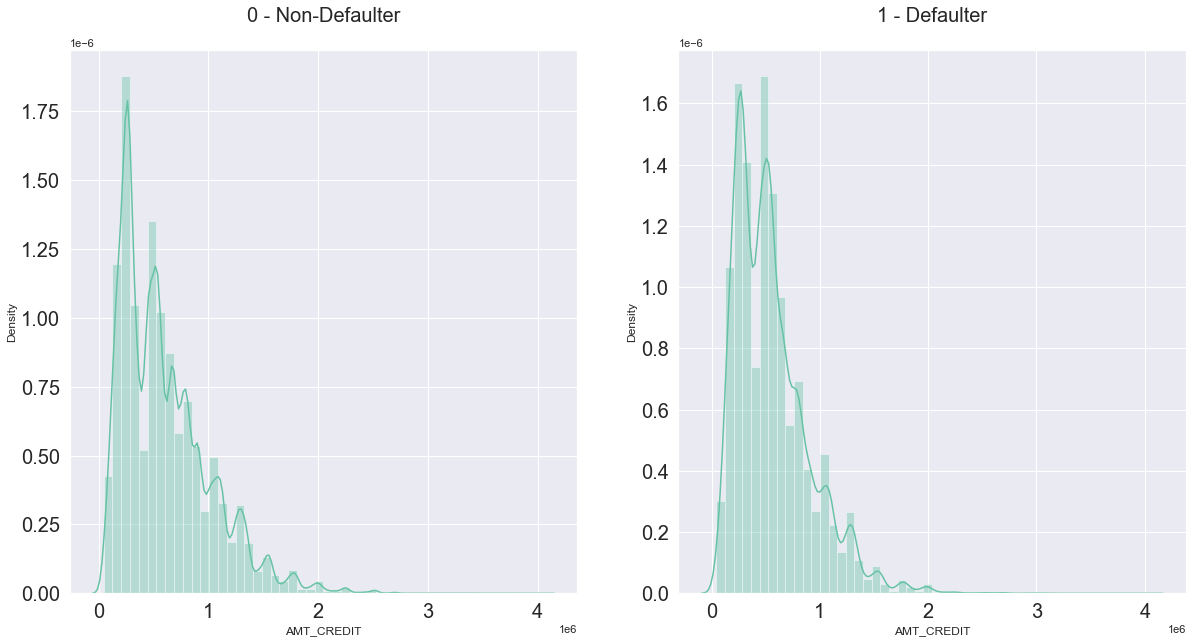

In [88]:
uni_nums(t0.AMT_CREDIT,t1.AMT_CREDIT)

From the above observation, we can see that the data is left-skewed and not perfectly distributed, more defaulters exist between the 0 & 1 bins possibly at 0.5

#### On the basis of AMT_ANNUITY

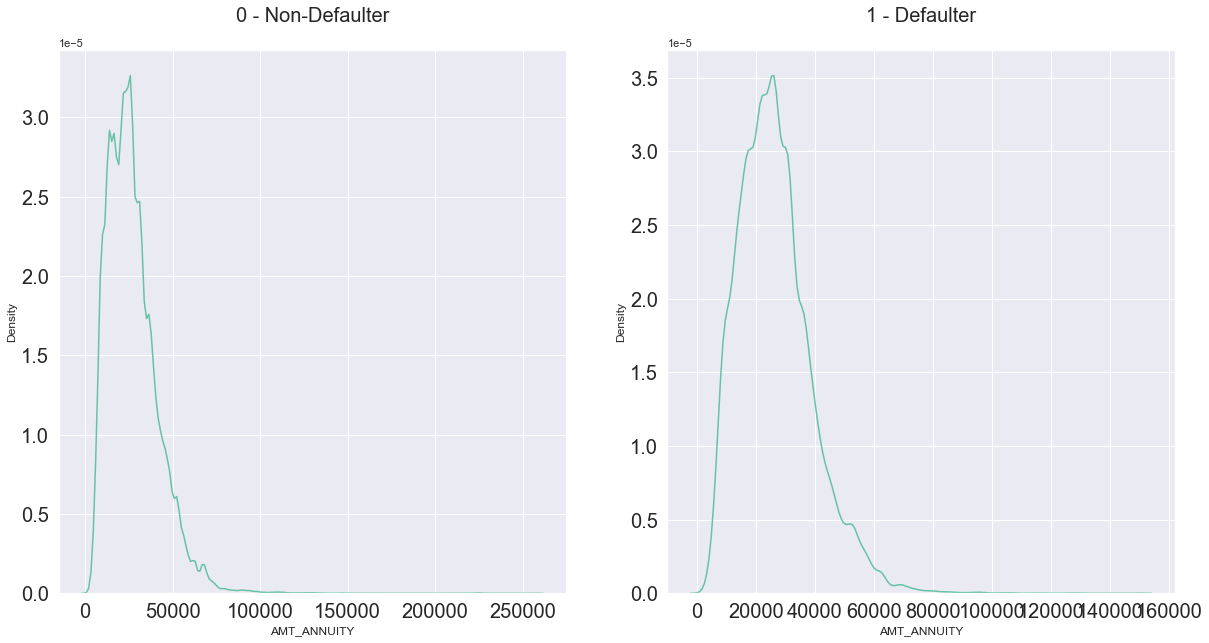

In [89]:
uni_nums(t0.AMT_ANNUITY,t1.AMT_ANNUITY, histogram=False)

From the above, we can observe that more defaulters exist between 20k to 40k bin on loan annuity and more applicants with no payment difficulties exist at loan annuity of 50k approximately

#### On the basis of AMT_GOODS_PRICE

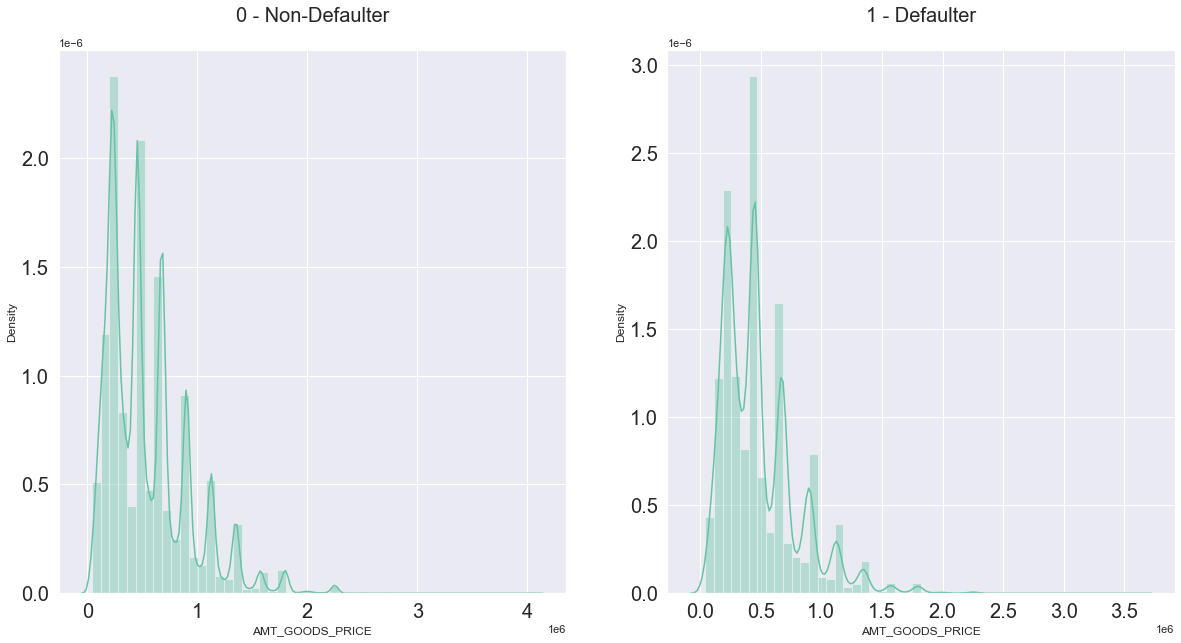

In [90]:
uni_nums(t0.AMT_GOODS_PRICE,t1.AMT_GOODS_PRICE)

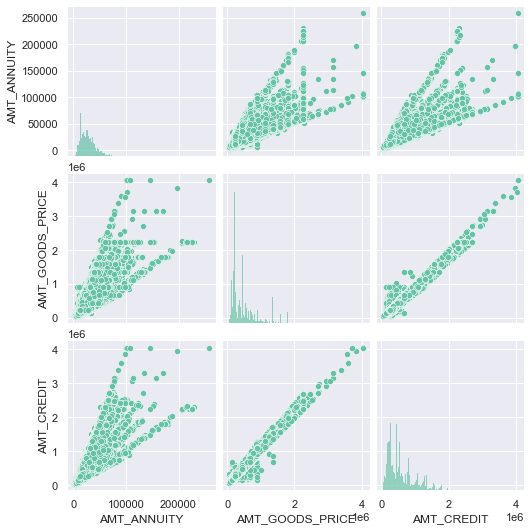

In [91]:
sns.pairplot(t0[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']])
plt.show()

From the above, we can observe that the linear correlation between AMT_GOODS_PRICE & AMT_CREDIT is almost linear or positive for applicants with payment difficulties or defaulters

In [92]:
sns.pairplot(t1[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']])
plt.show()

The conclusion is similar to that of Target-0 variable

## Segmented - Bivariate Analysis of Categorical-Categorical Variables

Now we will do Bivariate Analysis of Categorical variables against the Target variable

In [93]:
applicationdata.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   
5                    0.035792          46           1588             4970.0   
6                    0.035792          37           3130             1213.0   
7                    0.003122          51            449             4597.0   
8                    0.018634          55         365243             7427.0   
9                    0.019689          39           2019            14437.

In [94]:
# Creating a function to determine graphs for Bivariate - Categorical analysis
def bis(data,var,name,dimensions=[20,10],rotx=None,font=20, tfont=20, size=15):
    valcounts=data[var].value_counts()
    df0=pd.DataFrame(valcounts)
    df0.reset_index(inplace=True)
    df1=data[[var,'TARGET']].groupby([var], as_index=False).mean()
    df1.iloc[:,1]=round((df1.iloc[:,1]*100),2)
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    # Value_Counts
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title((f'Count of {name} category'), fontdict={'fontsize':tfont})
    splot=sns.barplot(data=df0,x=df0['index'],y=df0.iloc[:,1])
    for p in splot.patches:
        splot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it 
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.xlabel(var, fontdict={'fontsize':15})
    plt.ylabel(var,fontdict={'fontsize':15})
    #Percentages
    plt.subplot(1,2,2)
    plt.title((f'% of Defaulters in {name} category'), fontdict={'fontsize': tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.xlabel(var, fontdict={'fontsize':15})
    plt.ylabel('TARGET',fontdict={'fontsize':15})
    gplot=sns.barplot(data=df1,x=df1.iloc[:,0],y=df1.iloc[:,1])
    for p in gplot.patches:
        gplot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    

#### On the basis of NAME_CONTRACT_TYPE

In [95]:
bis(applicationdata,'NAME_CONTRACT_TYPE','Contract_Type')

From the above, we can observe that the revolving loans have less applications but more defaulters amongst them, also cashloans have highest defaulters compared to revolving loans

#### On the basis of NAME_TYPE_SUITE

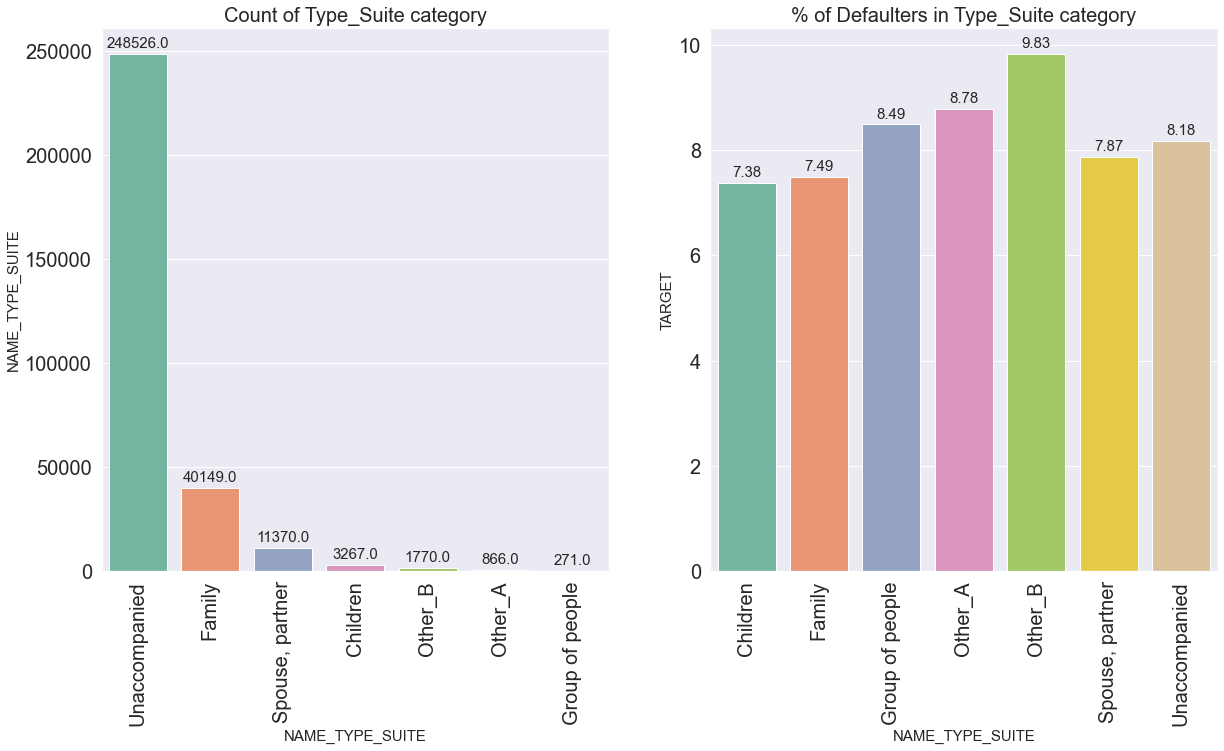

In [96]:
bis(applicationdata,'NAME_TYPE_SUITE','Type_Suite', rotx=90)

From the above, we can observe that Other_B & Other_A categories have high defaulters inspite of less applicants, whereas Family has 2nd largest applicant category but least defaulters after children

#### On the basis of NAME_INCOME_SUITE

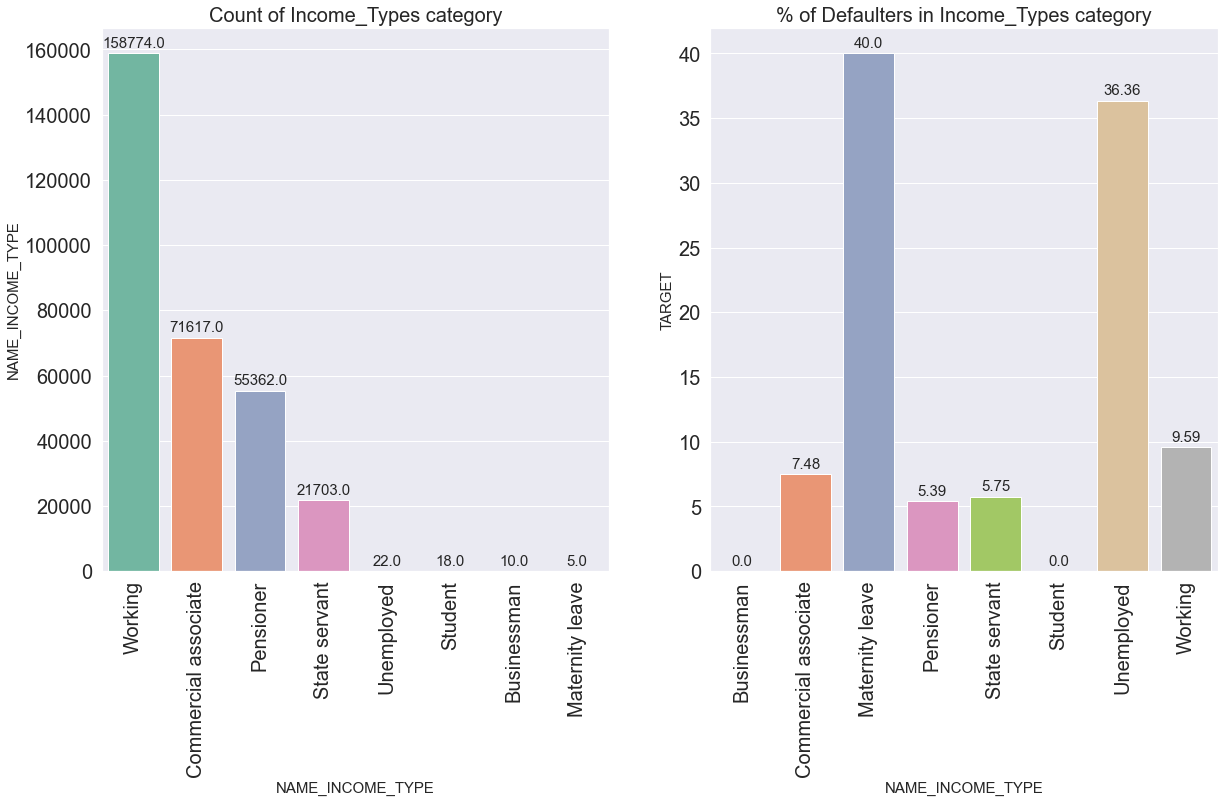

In [97]:
bis(applicationdata,'NAME_INCOME_TYPE','Income_Types', rotx=90)

From the above, we can observe that Working category has less defaulters inspite of high applications, but Maternity Leave category has maximum defaulters, so is the case with Unemployed category

#### On the basis of NAME_EDUCATION_TYPE

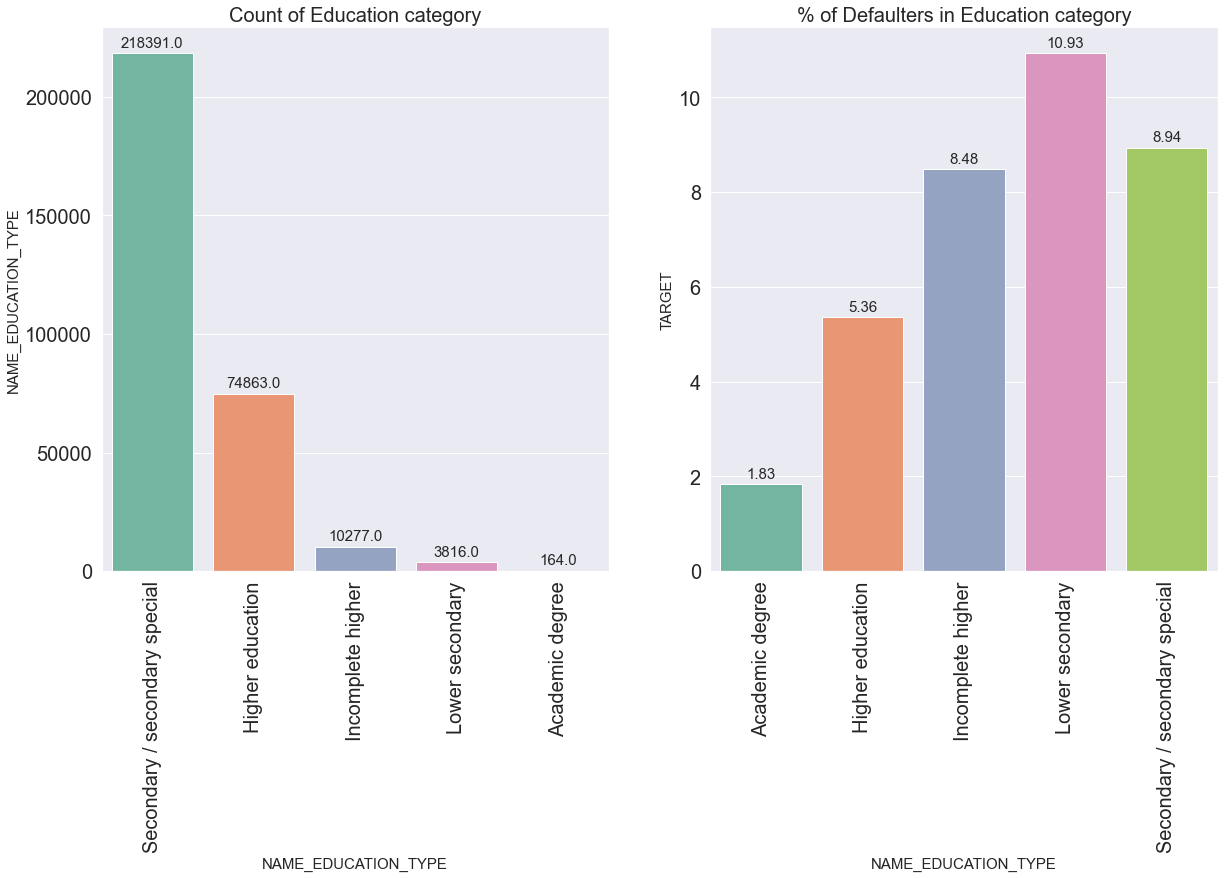

In [98]:
bis(applicationdata,'NAME_EDUCATION_TYPE','Education', rotx=90)

From the above we can determine that Lower Secondary education category has maximum defaulters and minimum applications

#### On the basis of NAME_FAMILY_STATUS

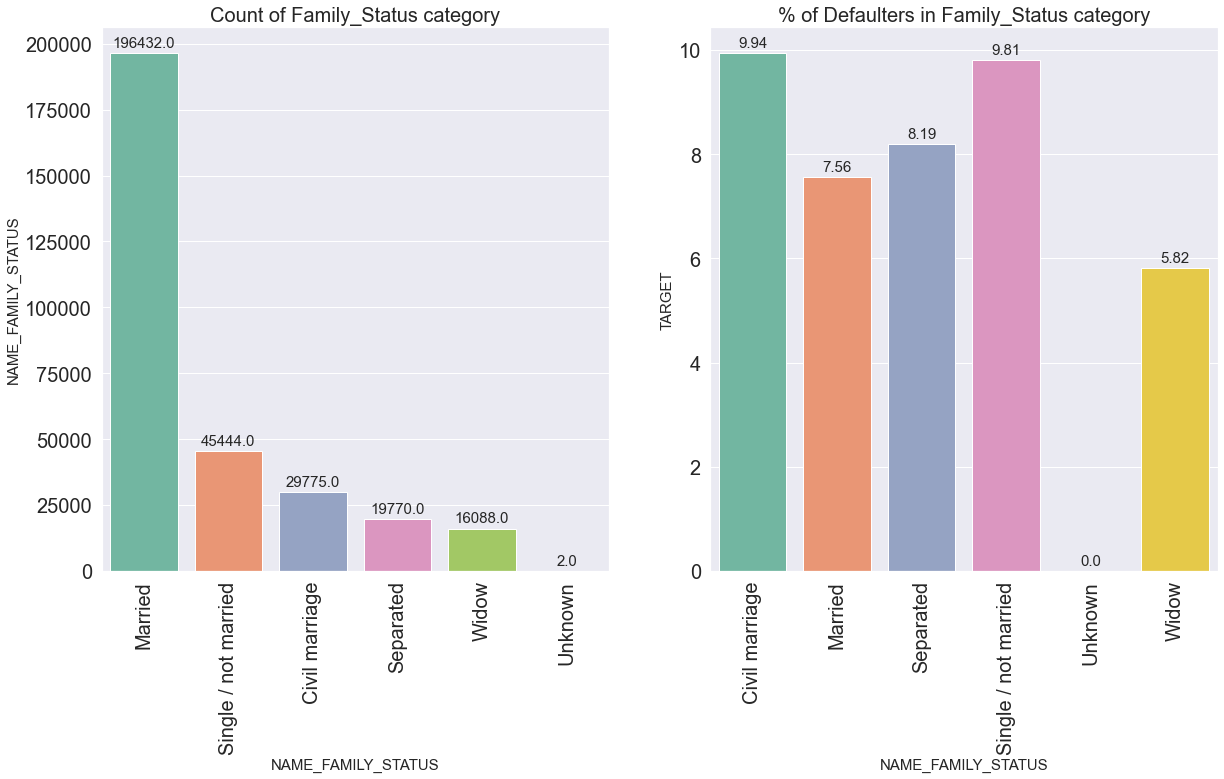

In [99]:
bis(applicationdata,'NAME_FAMILY_STATUS','Family_Status', rotx=90)

From the above we can depict that Civil marriage & Single/Not Married might have most defaulters

#### On the basis of INCOME_CATEGORY

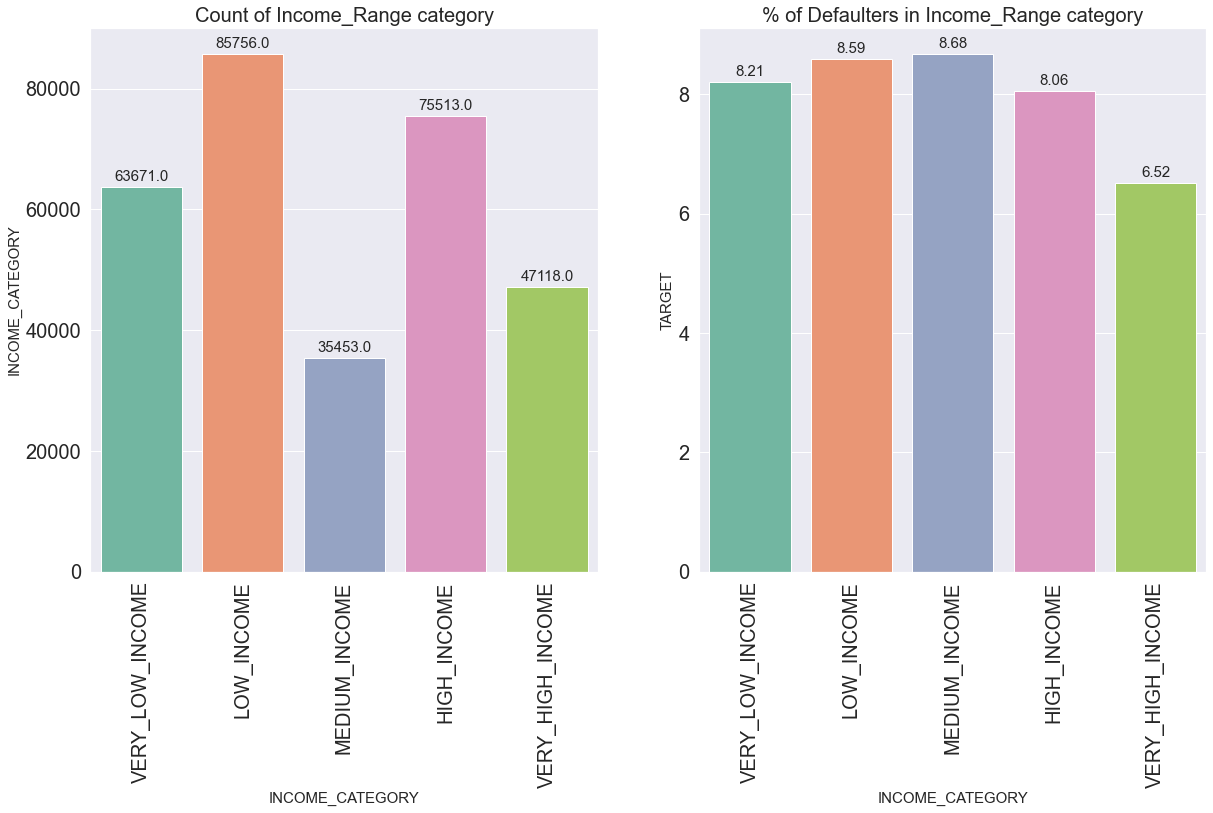

In [100]:
bis(applicationdata,'INCOME_CATEGORY','Income_Range', rotx=90)

From the above chart, we can see that the MEDIUM_INCOME & LOW_INCOME categories have maximum defaulters with high payment difficulties.

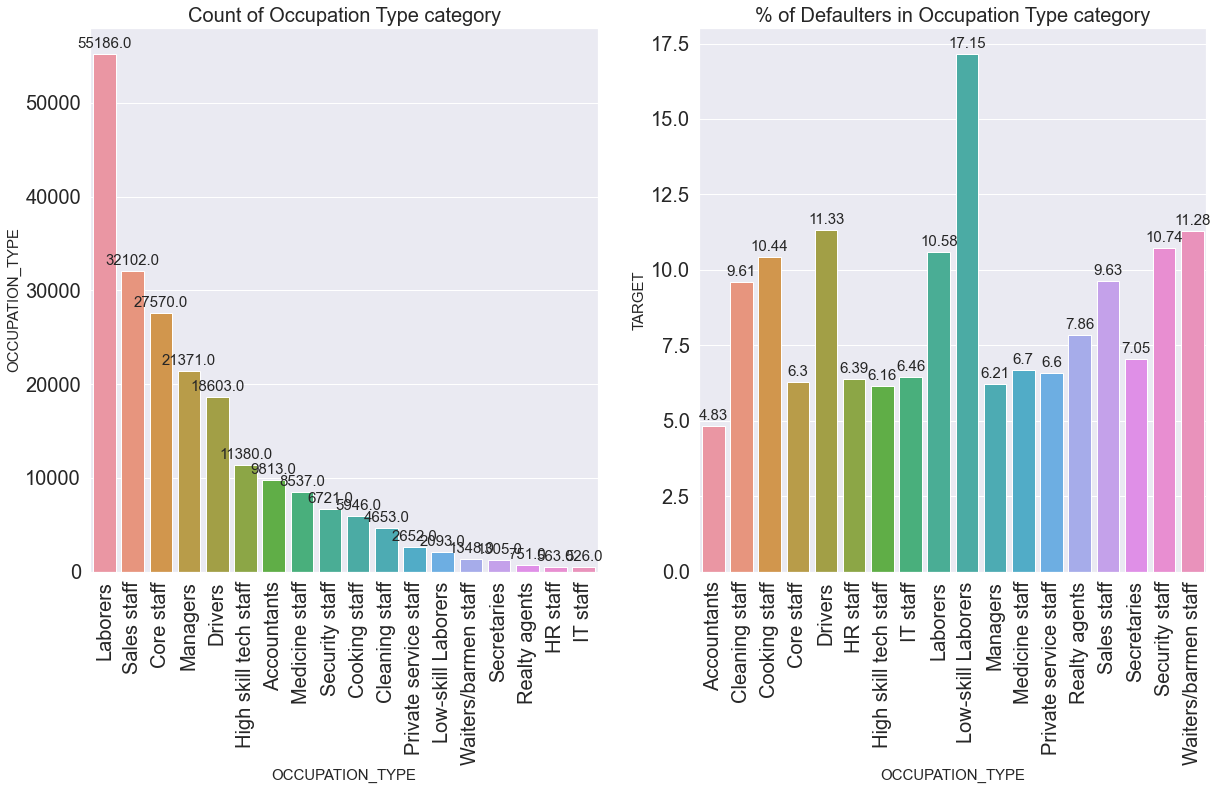

In [101]:
bis(applicationdata,'OCCUPATION_TYPE','Occupation Type', rotx=90)

From the above , we can see that Low-Skill Laborers are tend to default or have high difficulties in repaying the loan.

## Segmented - Bivariate Analysis of Numeric-Categorical Variables

In [102]:
# Creating a function to determine graphs for Bivariate - Categorical-Numerical analysis
def bi_num_cats(numv,catv,dimensions=[20,10],rotx=None,font=20, tfont=20):
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")    
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    sns.boxplot(data=t0,x=t0[catv],y=t0[numv], hue='INCOME_CATEGORY')
    plt.title(f'Non-Defaulters {catv} Vs  {numv}\n', fontdict={'fontsize':tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.subplot(1,2,2)
    sns.boxplot(data=t1,x=t1[catv],y=t1[numv], hue='INCOME_CATEGORY')
    plt.title(f'Defaulters {catv} Vs  {numv}\n', fontdict={'fontsize':tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)

### On the basis of Credit

In [103]:
bi_num_cats('AMT_CREDIT','NAME_FAMILY_STATUS', rotx=60)

The graph for Defaulters and Non-defaulters looks quite similar, although we could see that Single,Married,Separated have maximum loan credits alloted than others.

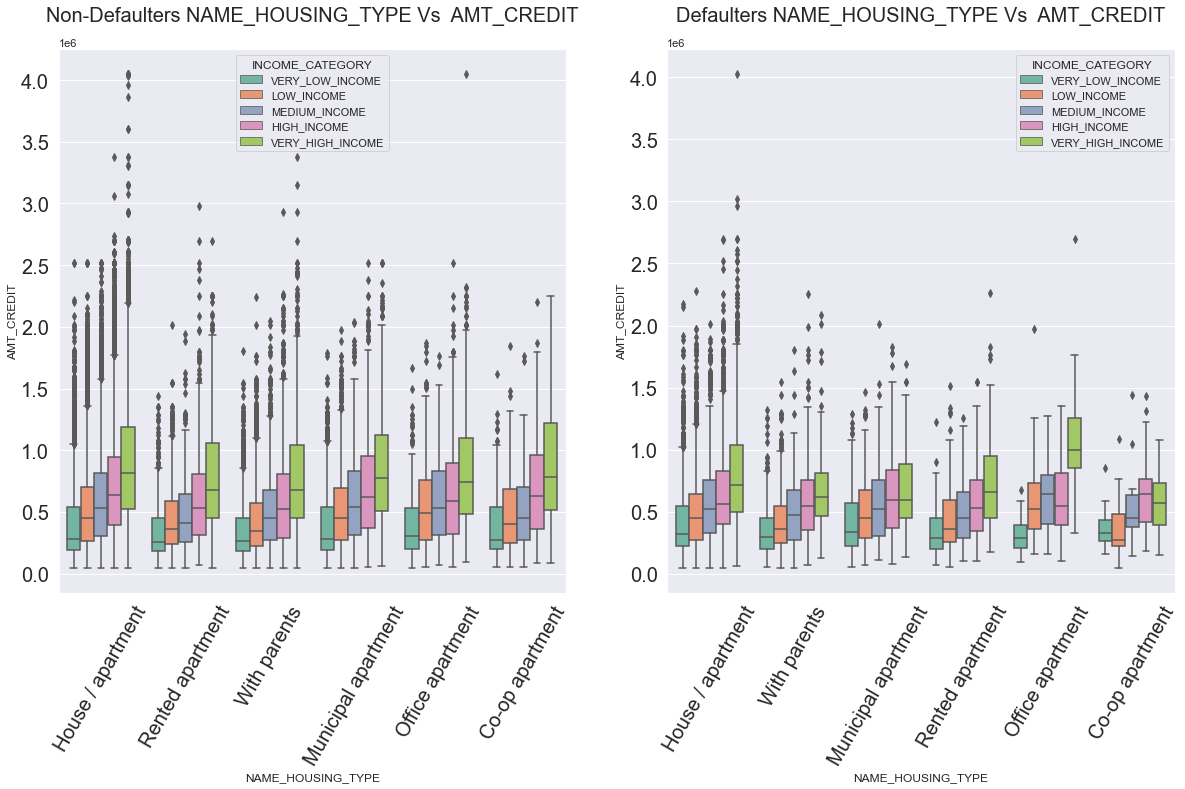

In [104]:
bi_num_cats('AMT_CREDIT','NAME_HOUSING_TYPE', rotx=60)

From the above graph, we can depict that across all income categories, the most of non-defaulters reside in House/Apartment & CO-OP apartment are given higher credits, but, higher credits are assigned to defaulters tend to reside in House/Apartment and Rented apartments .

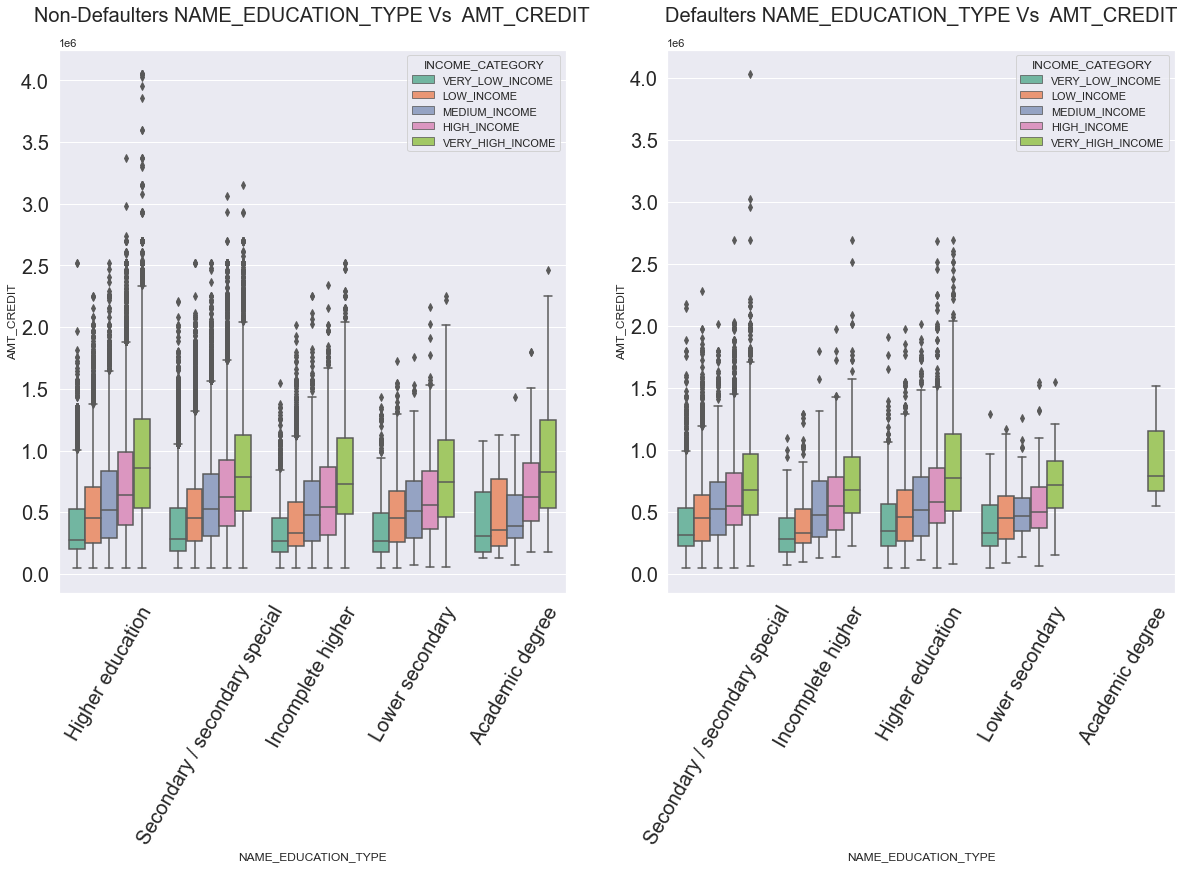

In [105]:
bi_num_cats('AMT_CREDIT','NAME_EDUCATION_TYPE', rotx=60)

From the above comparison, we can see that max credit assigned to defaulters across all income ranges are qualified with Higher & Secondary education, where Non-Defaulters are having Academic Degree & Higher education are assigned comparatively more credits.

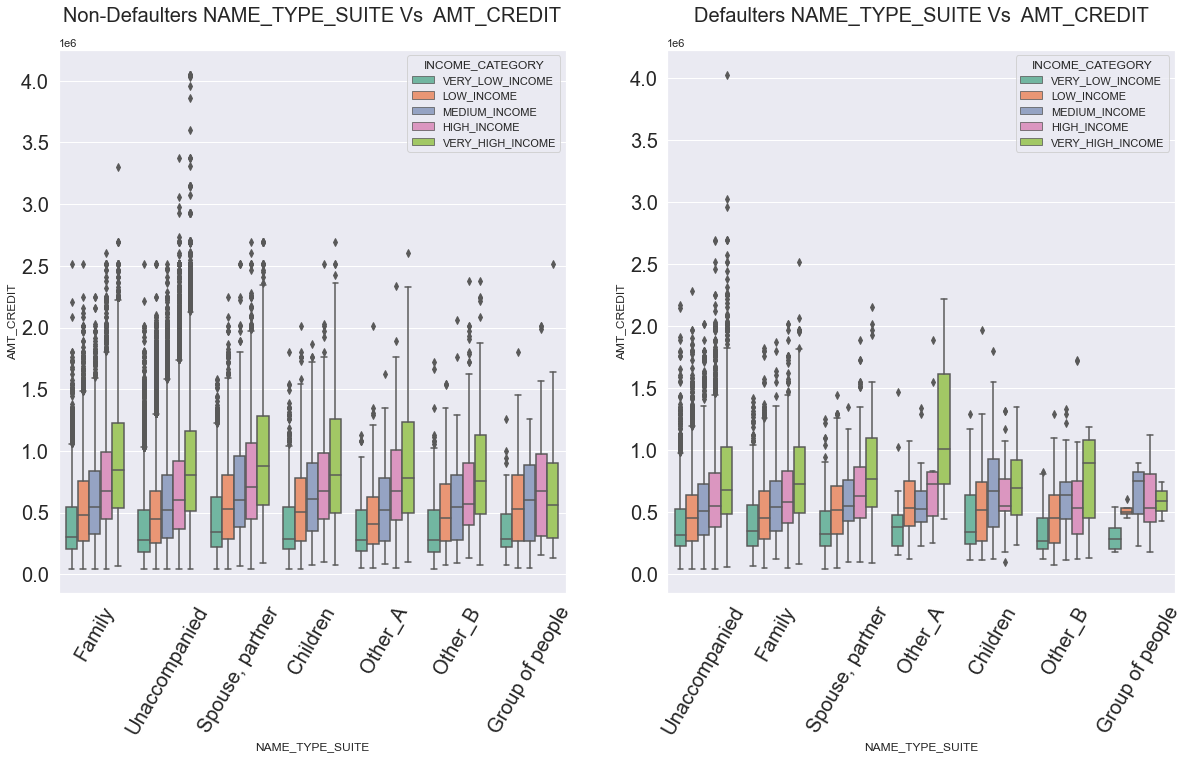

In [106]:
bi_num_cats('AMT_CREDIT','NAME_TYPE_SUITE', rotx=60)

From the above graph, we can see that Major Non-Defaulter applicants which are accompanied by Spouse,Partner & Family are given high credits , but, Major Defaulters are given more credits which are Unaccompanied or Other_A categories across all income categories.

### On the basis of Annuity

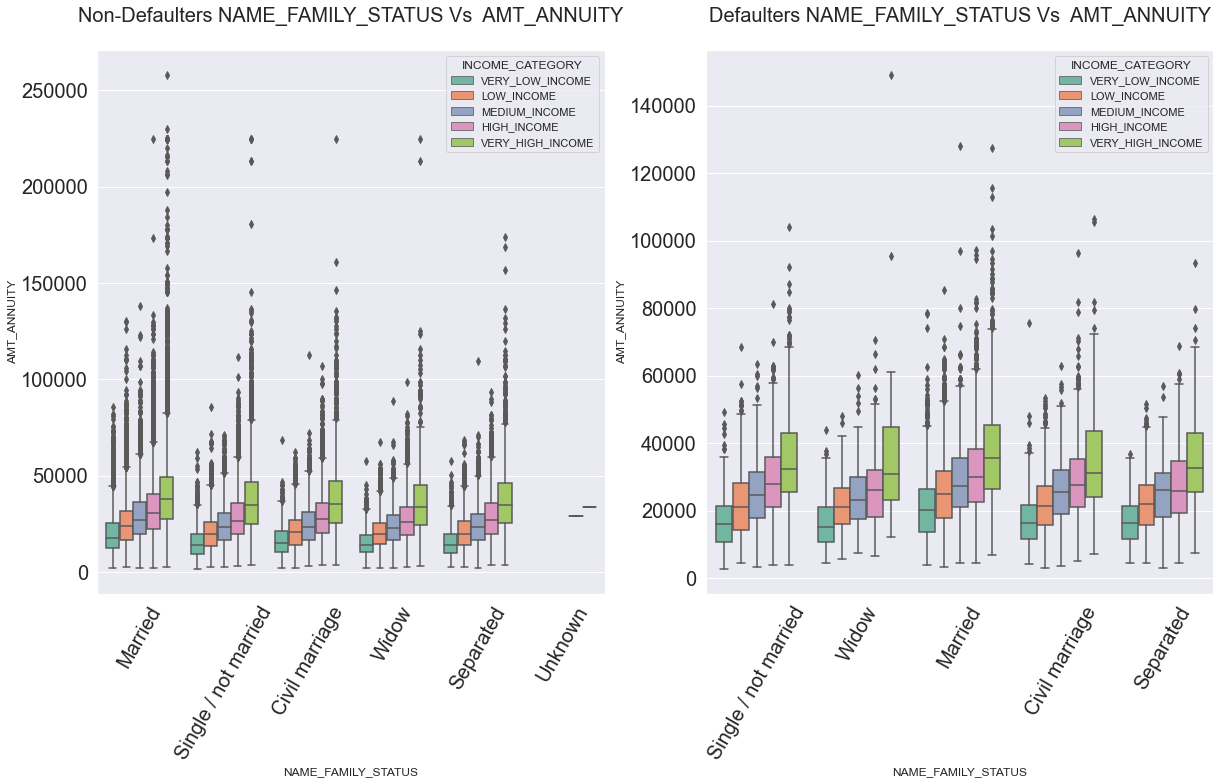

In [107]:
bi_num_cats('AMT_ANNUITY','NAME_FAMILY_STATUS', rotx=60)

From the above graphs, we can see that Widow-Defaulters are having comparatively higher Loan annuity and Non-defaulter's category is almost similar for all income ranges.

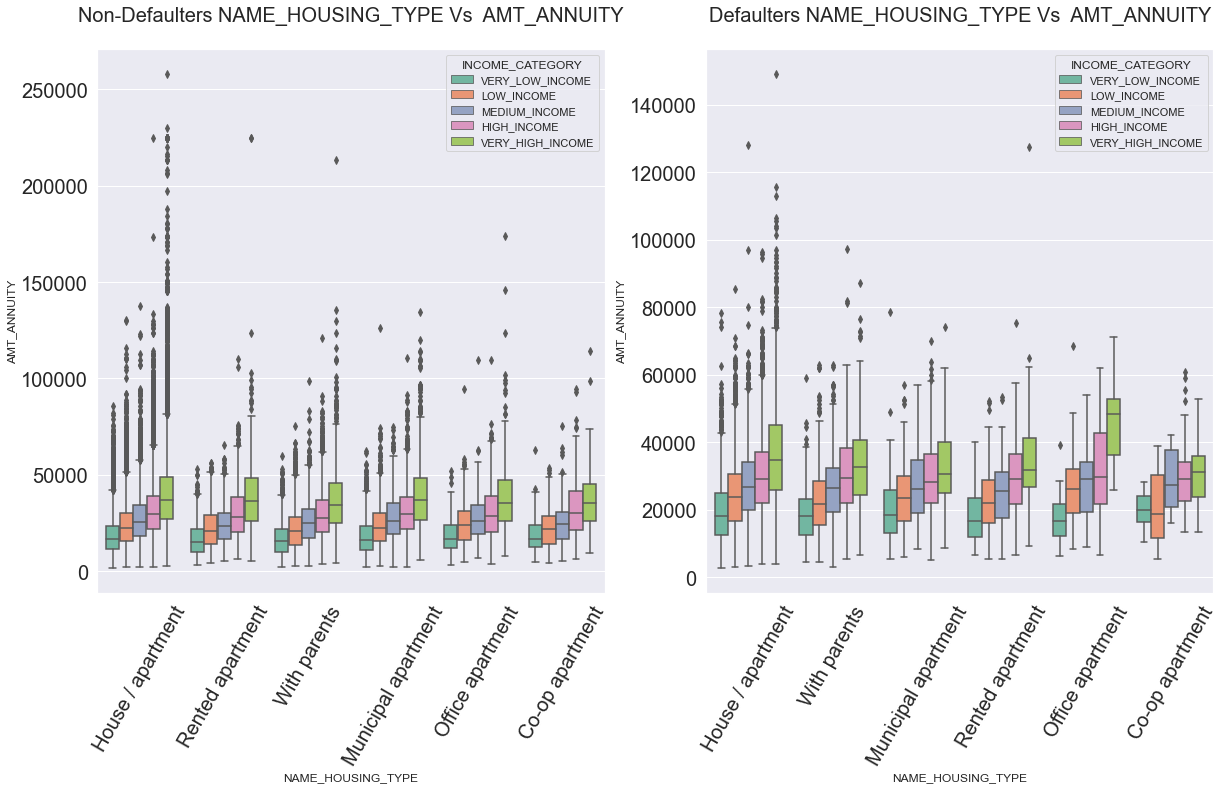

In [108]:
bi_num_cats('AMT_ANNUITY','NAME_HOUSING_TYPE', rotx=60)

From the above comparison, we can see that Major loan annuity is assigned to defaulters who reside in House/Apartment or Office apartment, whereas the spread for Non-Defaulters across all income ranges looks similar.

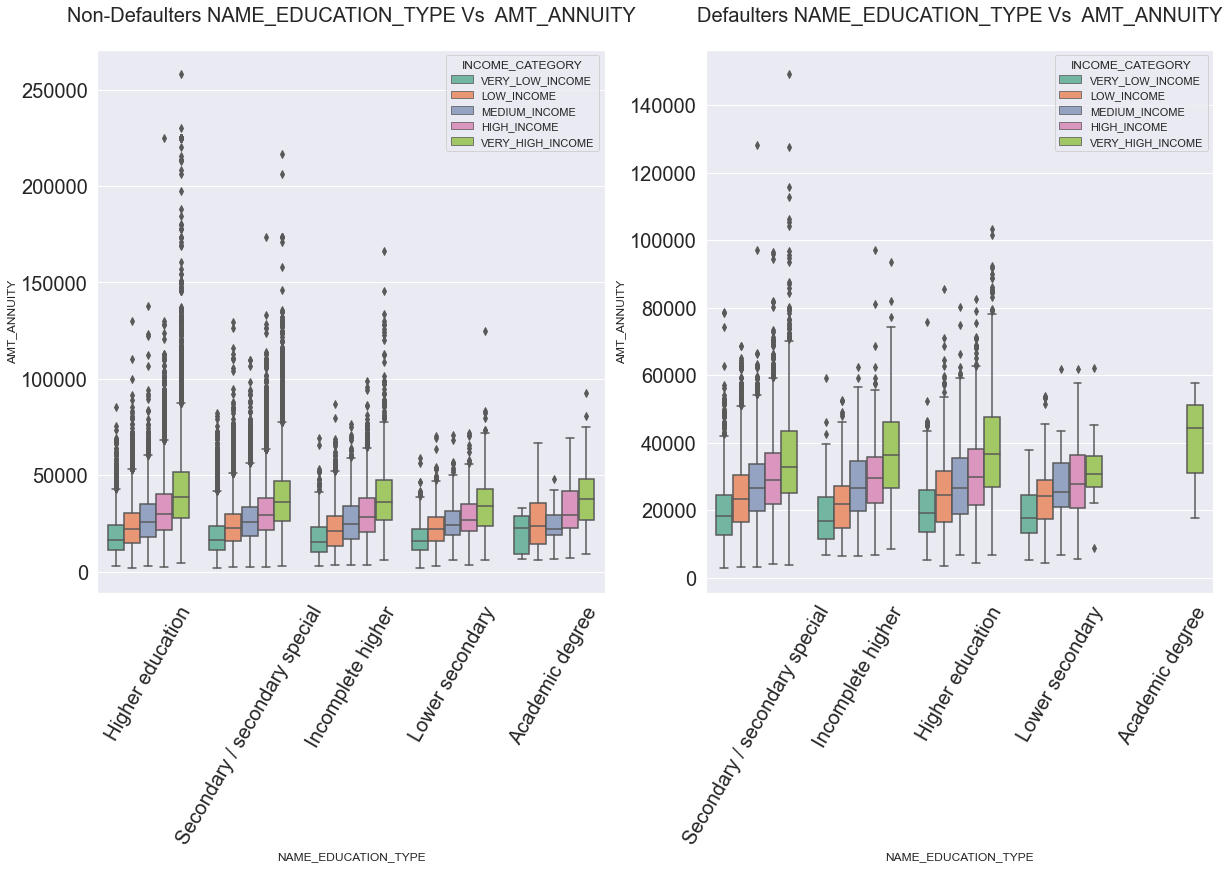

In [109]:
bi_num_cats('AMT_ANNUITY','NAME_EDUCATION_TYPE', rotx=60)

On the basis of above observations, if you look closely, the Incomplete-higher & Higher education categories are assigned major loan annuity which has more defaulters across all income categories.

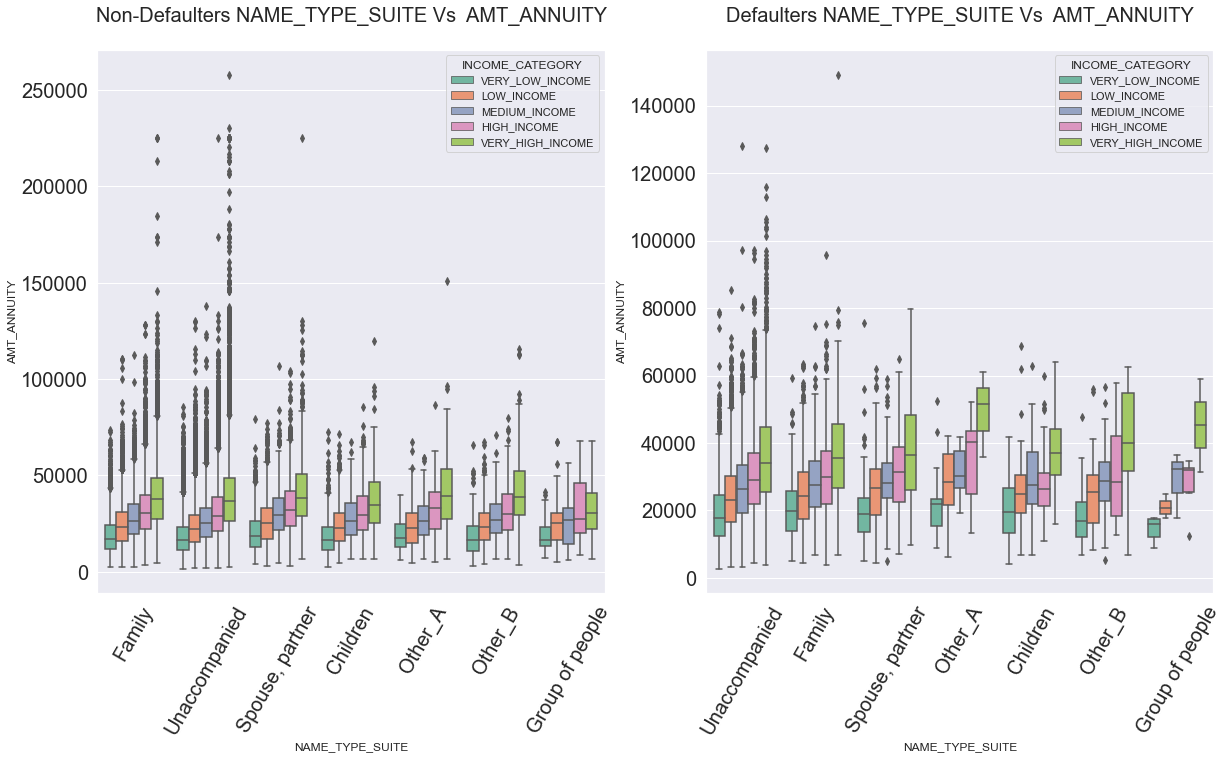

In [110]:
bi_num_cats('AMT_ANNUITY','NAME_TYPE_SUITE', rotx=60)

From the above observations, we can see that Non-Defaulters across all income categories are more or less have similar annuity interms of accompanied by category. But, if we have close look towards Defaulters, then we see that Unaccompanied applicants are granted more loan annuity when compared to other categories across all income ranges.

## Segmented - Bivariate Analysis of Numeric-Numeric Variables

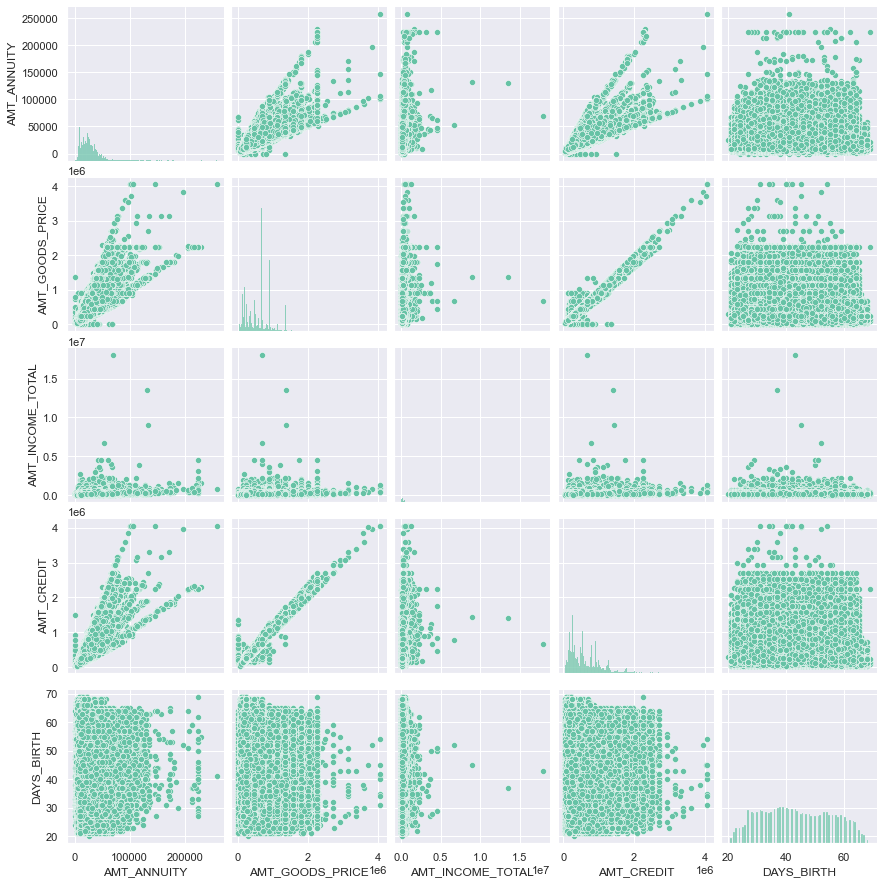

In [111]:
#Numeric vs Numeric for Target 0
t0pairplot=sns.pairplot(t0[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH']].fillna(0))
plt.show()

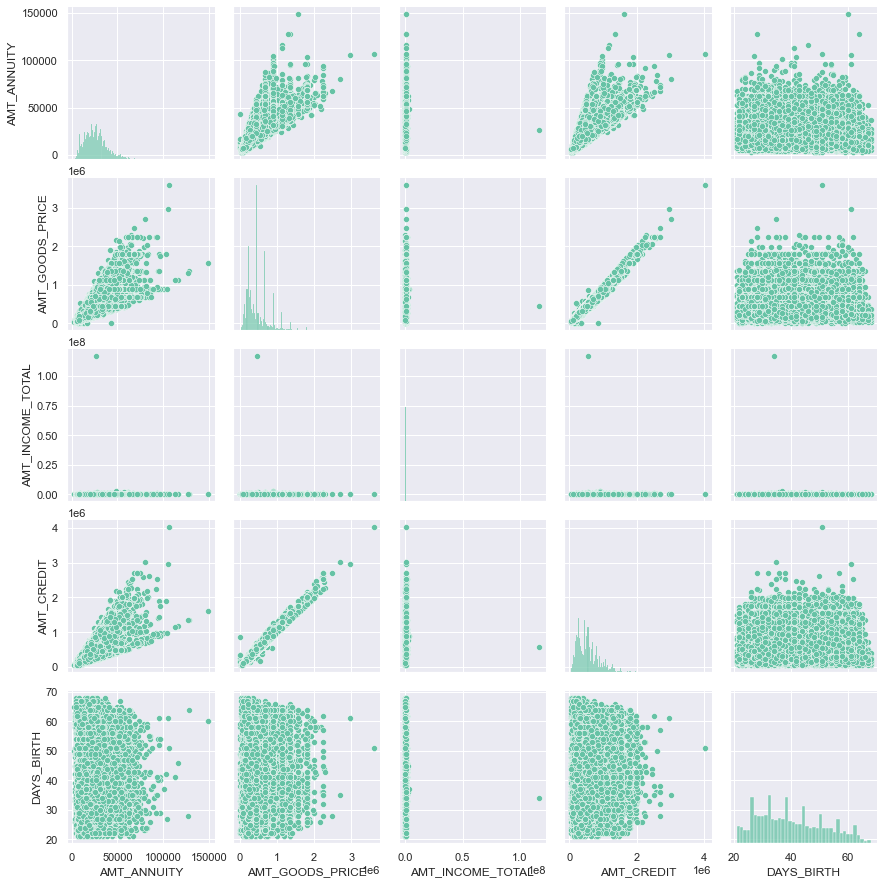

In [112]:
#Numeric vs Numeric for Target 1
t1pairplot=sns.pairplot(t1[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_BIRTH']].fillna(0))
plt.show()

### Segmented - Heatmaps

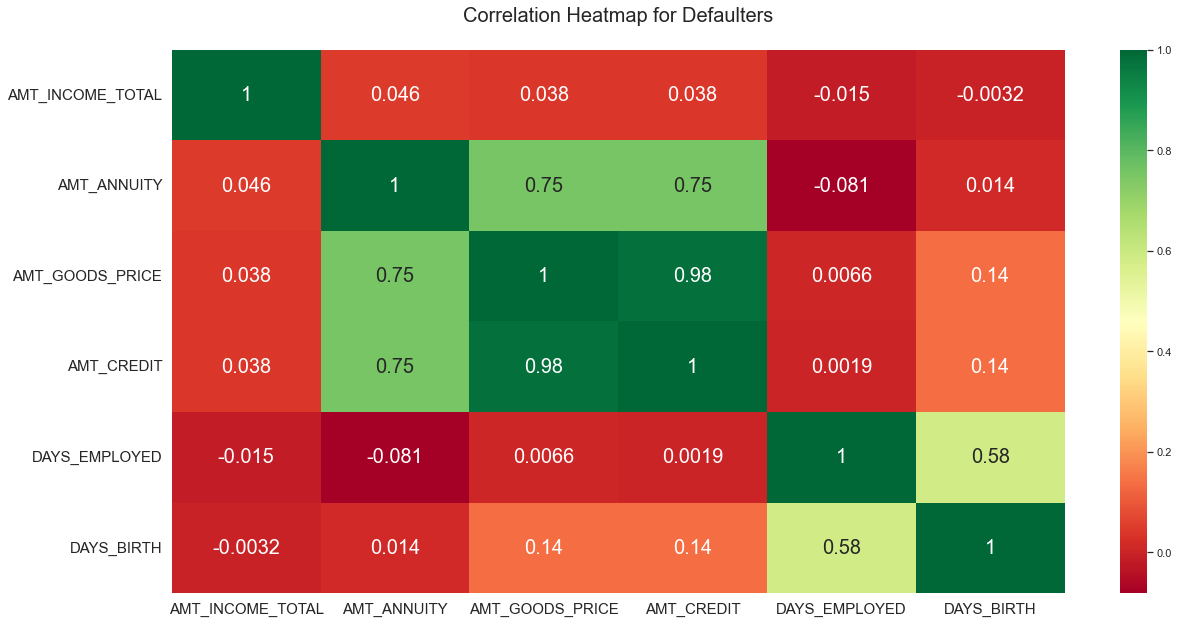

In [113]:
# Heatmap for Defaulters
plt.figure(figsize=[20,10])
sns.heatmap(t1[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH']]
            .corr(method='pearson'),cmap='RdYlGn', annot=True,annot_kws={"size":20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Heatmap for Defaulters\n', fontdict={'fontsize':20})
plt.show()

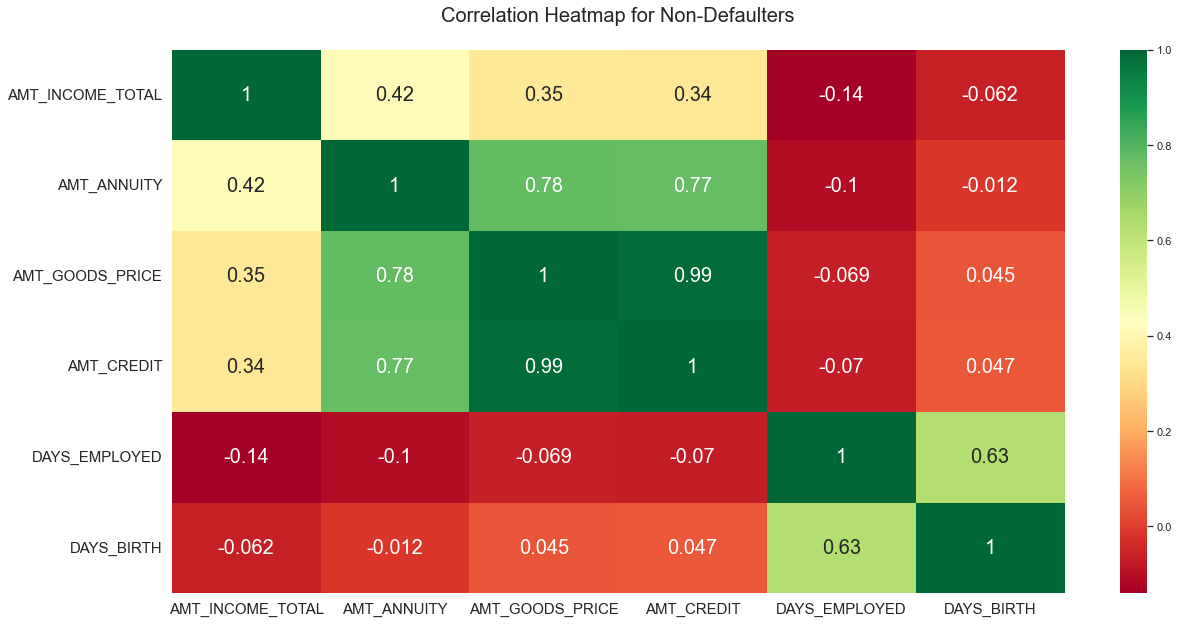

In [114]:
# Heatmap for Non-Defaulters
plt.figure(figsize=[20,10])
sns.heatmap(t0[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH']]
            .corr(method='pearson'),cmap='RdYlGn', annot=True,annot_kws={"size":20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Heatmap for Non-Defaulters\n', fontdict={'fontsize':20})
plt.show()

From the above Heatmap comparisons we can conclude that there is certain deviation for Goods_Price Vs Income_Total and Credit_Amount vs Income_Total, although there is a high positive correlation between Credit_amount & Goods_Price 

## Top 10 Correlation variables

### Correlation of Defaulters

In [115]:
# Correlation of Defaulters
corrt1=t1[['AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH','DAYS_REGISTRATION'
           ,'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method='pearson')


Note: i have selected above 10 variables based on my understanding of importance of each variable from entire set of columns

In [116]:
corrt1

AMT_GOODS_PRICE  AMT_ANNUITY  AMT_INCOME_TOTAL  \
AMT_GOODS_PRICE                     1.000000     0.752699          0.037583   
AMT_ANNUITY                         0.752699     1.000000          0.046421   
AMT_INCOME_TOTAL                    0.037583     0.046421          1.000000   
DAYS_EMPLOYED                       0.006642    -0.081207         -0.014977   
CNT_CHILDREN                       -0.008112     0.031257          0.004796   
DAYS_BIRTH                          0.135603     0.014028         -0.003154   
DAYS_REGISTRATION                   0.025679    -0.034279         -0.000158   
REGION_RATING_CLIENT               -0.066390    -0.073784         -0.021486   
REGION_RATING_CLIENT_W_CITY        -0.077191    -0.089291         -0.022808   
LIVE_CITY_NOT_WORK_CITY            -0.016685     0.009902         -0.001353   

                             DAYS_EMPLOYED  CNT_CHILDREN  DAYS_BIRTH  \
AMT_GOODS_PRICE                   0.006642     -0.008112    0.135603   
AMT_ANNUITY                      -0.081207      0.031257    0.014028   
AMT_INCOME_TOTAL                 -0.014977      0.004796   -0.003154   
DAYS_EMPLOYED                     1.000000     -0.192864    0.582441   
CNT_CHILDREN                     -0.192864      1.000000   -0.259222   
DAYS_BIRTH                        0.582441     -0.259222    1.000000   
DAYS_REGISTRATION                 0.192455     -0.149154    0.289116   
REGION_RATING_CLIENT              0.003490      0.040680   -0.033648   
REGION_RATING_CLIENT_W_CITY       0.002888      0.043185   -0.033378   
LIVE_CITY_NOT_WORK_CITY          -0.198484      0.053515   -0.123556   

                             DAYS_REGISTRATION  REGION_RATING_CLIENT  \
AMT_GOODS_PRICE                       0.025679             -0.066390   
AMT_ANNUITY                          -0.034279             -0.073784   
AMT_INCOME_TOTAL                     -0.000158             -0.021486   
DAYS_EMPLOYED                         0.192455              0.003490   
CNT_CHILDREN                         -0.149154              0.040680   
DAYS_BIRTH                            0.289116             -0.033648   
DAYS_REGISTRATION                     1.000000             -0.103855   
REGION_RATING_CLIENT                 -0.103855              1.000000   
REGION_RATING_CLIENT_W_CITY          -0.100285              0.956637   
LIVE_CITY_NOT_WORK_CITY              -0.062636             -0.022362   

                             REGION_RATING_CLIENT_W_CITY  \
AMT_GOODS_PRICE                                -0.077191   
AMT_ANNUITY                                    -0.089291   
AMT_INCOME_TOTAL                               -0.022808   
DAYS_EMPLOYED                                   0.002888   
CNT_CHILDREN                                    0.043185   
DAYS_BIRTH                                     -0.033378   
DAYS_REGISTRATION                              -0.100285   
REGION_RATING_CLIENT                            0.956637   
REGION_RATING_CLIENT_W_CITY                     1.000000   
LIVE_CITY_NOT_WORK_CITY                        -0.006389   

                             LIVE_CITY_NOT_WORK_CITY  
AMT_GOODS_PRICE                            -0.016685  
AMT_ANNUITY                                 0.009902  
AMT_INCOME_TOTAL                           -0.001353  
DAYS_EMPLOYED                              -0.198484  
CNT_CHILDREN                                0.053515  
DAYS_BIRTH                                 -0.123556  
DAYS_REGISTRATION                          -0.062636  
REGION_RATING_CLIENT                       -0.022362  
REGION_RATING_CLIENT_W_CITY                -0.006389  
LIVE_CITY_NOT_WORK_CITY                     1.000000

In [117]:
corrt1=corrt1.where(np.triu(np.ones(corrt1.shape),k=1).astype(np.bool)).unstack().reset_index()

In [118]:
corrt1.columns=['Attribute_1','Attribute_2','Correlation_Score']

In [119]:
corrt1.Correlation_Score.dropna(inplace=True)

In [120]:
corrt1.sort_values(by='Correlation_Score',ascending=False, inplace=True)

In [121]:
corrt1.head(10)

Attribute_1           Attribute_2  Correlation_Score
87  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
10                  AMT_ANNUITY       AMT_GOODS_PRICE           0.752699
53                   DAYS_BIRTH         DAYS_EMPLOYED           0.582441
65            DAYS_REGISTRATION            DAYS_BIRTH           0.289116
63            DAYS_REGISTRATION         DAYS_EMPLOYED           0.192455
50                   DAYS_BIRTH       AMT_GOODS_PRICE           0.135603
94      LIVE_CITY_NOT_WORK_CITY          CNT_CHILDREN           0.053515
21             AMT_INCOME_TOTAL           AMT_ANNUITY           0.046421
84  REGION_RATING_CLIENT_W_CITY          CNT_CHILDREN           0.043185
74         REGION_RATING_CLIENT          CNT_CHILDREN           0.040680

So based on the above, we can conclude the Top 10 Correlations for defaulters or clients with payment difficulties

### Correlation of Non-Defaulters

In [122]:
# Correlation of Non-Defaulters
corrt0=t0[['AMT_GOODS_PRICE','AMT_ANNUITY','AMT_INCOME_TOTAL','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH','DAYS_REGISTRATION'
           ,'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','LIVE_CITY_NOT_WORK_CITY']].corr(method='pearson')


In [123]:
corrt0

AMT_GOODS_PRICE  AMT_ANNUITY  AMT_INCOME_TOTAL  \
AMT_GOODS_PRICE                     1.000000     0.776686          0.349462   
AMT_ANNUITY                         0.776686     1.000000          0.418953   
AMT_INCOME_TOTAL                    0.349462     0.418953          1.000000   
DAYS_EMPLOYED                      -0.068609    -0.104978         -0.140392   
CNT_CHILDREN                       -0.000525     0.020905          0.027397   
DAYS_BIRTH                          0.044552    -0.012254         -0.062494   
DAYS_REGISTRATION                  -0.015916    -0.039436         -0.064937   
REGION_RATING_CLIENT               -0.104382    -0.132128         -0.186573   
REGION_RATING_CLIENT_W_CITY        -0.112601    -0.145153         -0.200466   
LIVE_CITY_NOT_WORK_CITY             0.001310     0.010582          0.020684   

                             DAYS_EMPLOYED  CNT_CHILDREN  DAYS_BIRTH  \
AMT_GOODS_PRICE                  -0.068609     -0.000525    0.044552   
AMT_ANNUITY                      -0.104978      0.020905   -0.012254   
AMT_INCOME_TOTAL                 -0.140392      0.027397   -0.062494   
DAYS_EMPLOYED                     1.000000     -0.245174    0.626028   
CNT_CHILDREN                     -0.245174      1.000000   -0.336907   
DAYS_BIRTH                        0.626028     -0.336907    1.000000   
DAYS_REGISTRATION                 0.214511     -0.185792    0.333025   
REGION_RATING_CLIENT              0.038328      0.022842   -0.002415   
REGION_RATING_CLIENT_W_CITY       0.040461      0.021866   -0.000854   
LIVE_CITY_NOT_WORK_CITY          -0.221387      0.070988   -0.160001   

                             DAYS_REGISTRATION  REGION_RATING_CLIENT  \
AMT_GOODS_PRICE                      -0.015916             -0.104382   
AMT_ANNUITY                          -0.039436             -0.132128   
AMT_INCOME_TOTAL                     -0.064937             -0.186573   
DAYS_EMPLOYED                         0.214511              0.038328   
CNT_CHILDREN                         -0.185792              0.022842   
DAYS_BIRTH                            0.333025             -0.002415   
DAYS_REGISTRATION                     1.000000             -0.075846   
REGION_RATING_CLIENT                 -0.075846              1.000000   
REGION_RATING_CLIENT_W_CITY          -0.069357              0.950149   
LIVE_CITY_NOT_WORK_CITY              -0.072248             -0.021006   

                             REGION_RATING_CLIENT_W_CITY  \
AMT_GOODS_PRICE                                -0.112601   
AMT_ANNUITY                                    -0.145153   
AMT_INCOME_TOTAL                               -0.200466   
DAYS_EMPLOYED                                   0.040461   
CNT_CHILDREN                                    0.021866   
DAYS_BIRTH                                     -0.000854   
DAYS_REGISTRATION                              -0.069357   
REGION_RATING_CLIENT                            0.950149   
REGION_RATING_CLIENT_W_CITY                     1.000000   
LIVE_CITY_NOT_WORK_CITY                        -0.004646   

                             LIVE_CITY_NOT_WORK_CITY  
AMT_GOODS_PRICE                             0.001310  
AMT_ANNUITY                                 0.010582  
AMT_INCOME_TOTAL                            0.020684  
DAYS_EMPLOYED                              -0.221387  
CNT_CHILDREN                                0.070988  
DAYS_BIRTH                                 -0.160001  
DAYS_REGISTRATION                          -0.072248  
REGION_RATING_CLIENT                       -0.021006  
REGION_RATING_CLIENT_W_CITY                -0.004646  
LIVE_CITY_NOT_WORK_CITY                     1.000000

In [124]:
corrt0=corrt0.where(np.triu(np.ones(corrt0.shape),k=1).astype(np.bool)).unstack().reset_index()

In [125]:
corrt0.columns=['Attribute_1','Attribute_2','Correlation_Score']

In [126]:
corrt0.Correlation_Score.dropna(inplace=True)

In [127]:
corrt0.sort_values(by='Correlation_Score',ascending=False, inplace=True)

In [128]:
corrt0.head(10)

Attribute_1           Attribute_2  Correlation_Score
87  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149
10                  AMT_ANNUITY       AMT_GOODS_PRICE           0.776686
53                   DAYS_BIRTH         DAYS_EMPLOYED           0.626028
21             AMT_INCOME_TOTAL           AMT_ANNUITY           0.418953
20             AMT_INCOME_TOTAL       AMT_GOODS_PRICE           0.349462
65            DAYS_REGISTRATION            DAYS_BIRTH           0.333025
63            DAYS_REGISTRATION         DAYS_EMPLOYED           0.214511
94      LIVE_CITY_NOT_WORK_CITY          CNT_CHILDREN           0.070988
50                   DAYS_BIRTH       AMT_GOODS_PRICE           0.044552
83  REGION_RATING_CLIENT_W_CITY         DAYS_EMPLOYED           0.040461

So based on the above, we can conclude the Top 10 Correlations for non-defaulters or clients with no payment difficulties

# Part - 2 Analysis on Previous_Application Dataset

In [129]:
Pappdata.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [130]:
#Looks like there are few columns in the above dataset that have negative values, lets convert it to positive values
neg_cols=[column for column in Pappdata if column.startswith('DAYS')]
Pappdata[neg_cols]=abs(Pappdata[neg_cols])
Pappdata.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [131]:
# There are few columns like 'NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON' which have XNA/XAP values which looks to be null values
#Let's impute them with np.NaN
Pappdata=Pappdata.replace({'XNA':np.NaN,'XAP':np.NaN})
Pappdata.head(10)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    NaN             Approved   
1                       NaN                    NaN             Approved   
2                       NaN                    NaN             Approved   
3                       NaN                    NaN             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    NaN             Canceled   
7                       NaN                    NaN             Canceled   
8                       NaN                    NaN             Canceled   
9                       NaN                    NaN             Canceled   

   DAYS_DECISION      NAME_

## Univariate Analysis - Categorical Variables  - Previous Application Data

In [132]:
#Creating a function to plot countplot graphs with ease for categorical variables:
def puni(column,dimensions=[20,10],font=20,tfont=20,rotx=None,size=20):
    
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    plt.figure(figsize=dimensions)
    plt.title((f'Univariate Analysis of {column} variable'), fontdict={'fontsize':tfont})
    #sns.countplot(applicationdata[column])
    splot= sns.countplot(Pappdata[column])
    for p in splot.patches:
        splot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
         
      
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.show()

#### On the basis of NAME_CONTRACT_TYPE

In [133]:
puni('NAME_CONTRACT_TYPE')

#### On the basis of NAME_CONTRACT_STATUS

In [134]:
puni('NAME_CONTRACT_STATUS')

 From the above, we can notice that major number of loans are approved.

#### On the basis of NAME_PAYMENT_TYPE

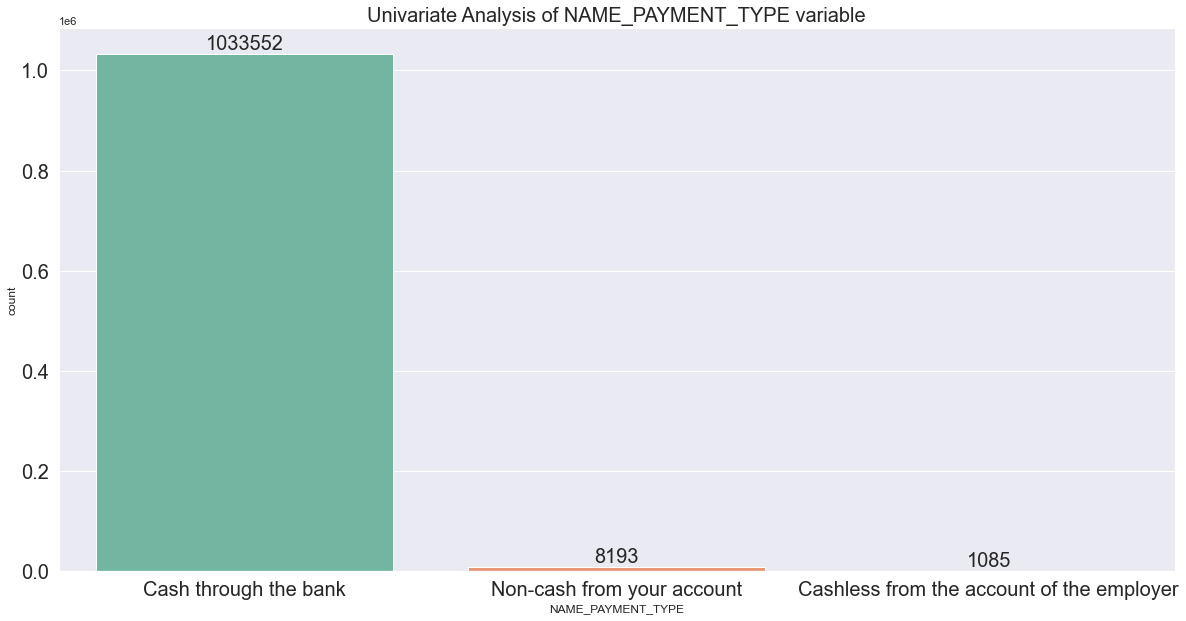

In [135]:
puni('NAME_PAYMENT_TYPE')

Majority payments are done through 'Cash through the bank'

#### On the basis of CODE_REJECT_REASON

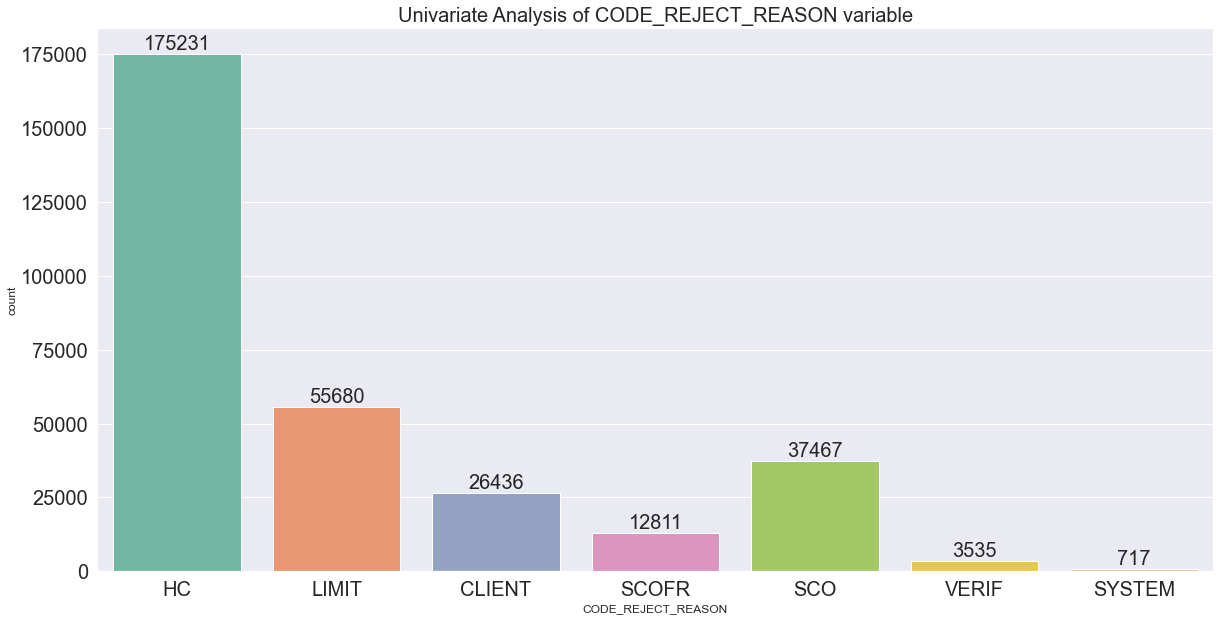

In [136]:
puni('CODE_REJECT_REASON')

From the above countplot, we can see that Majority of the applications got rejected because of 'HC'

#### On the basis of NAME_TYPE_SUITE

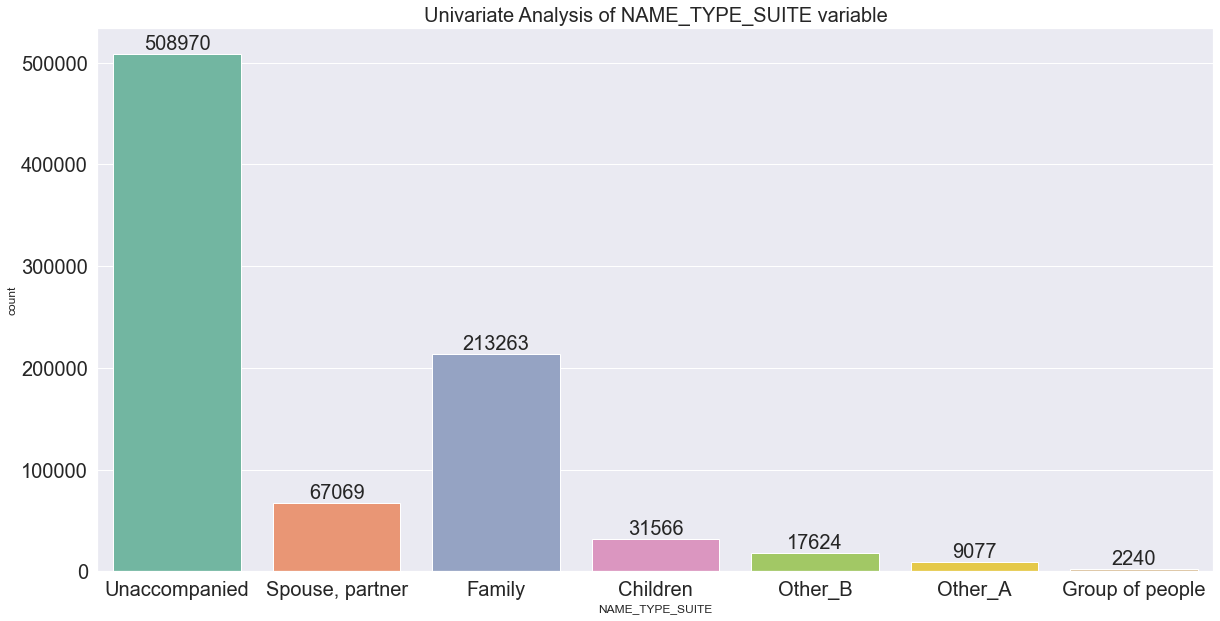

In [137]:
puni('NAME_TYPE_SUITE')

From the above, we can observe that Majority of applicants are 'Unaccompanied'

#### On the basis of NAME_CLIENT_TYPE

In [138]:
puni('NAME_CLIENT_TYPE')

From the above graph, we could se maximum applicants are 'Repeaters'

#### On the basis of NAME_GOODS_CATEGORY

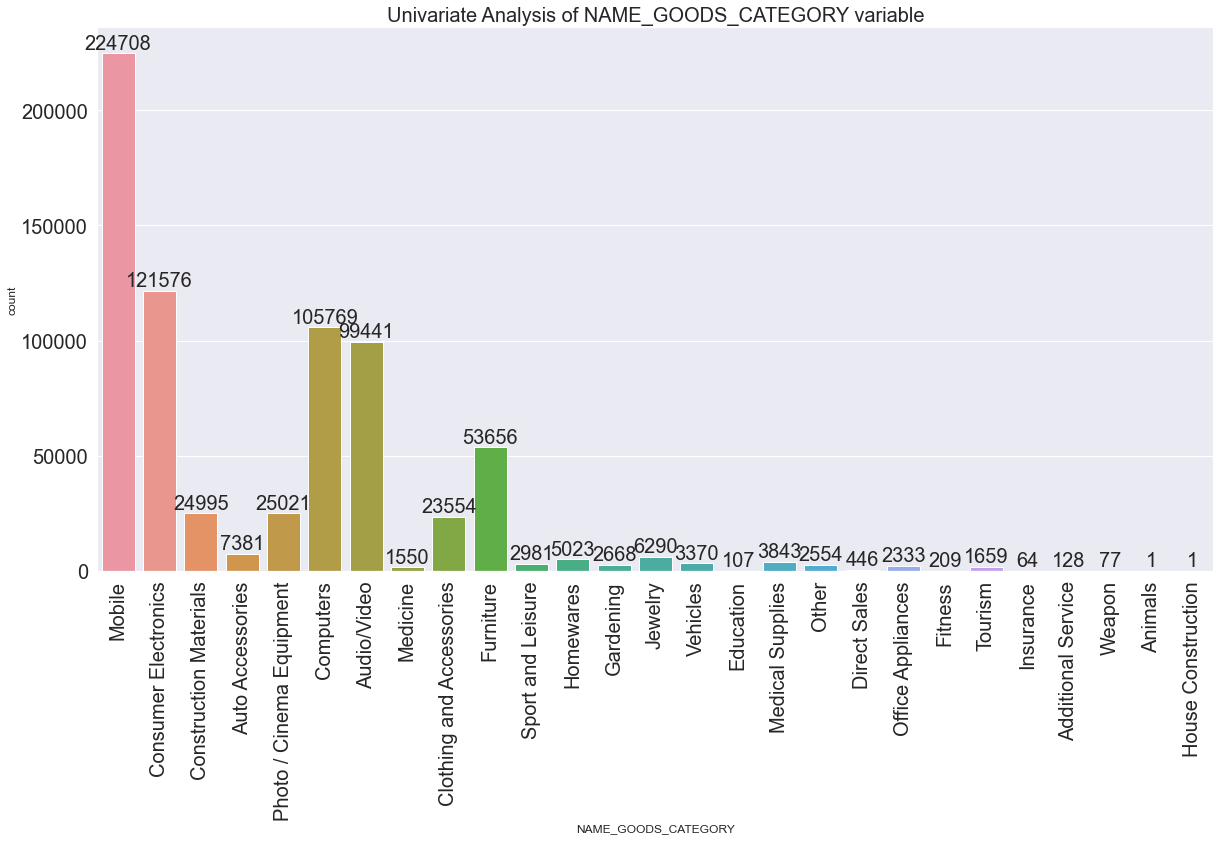

In [139]:
puni('NAME_GOODS_CATEGORY', rotx=90)

From the above graph, we can conclude that majority of the loan applications are for Consumer Electronics, Computers & Mobile

#### On the basis of NAME_PORTFOLIO

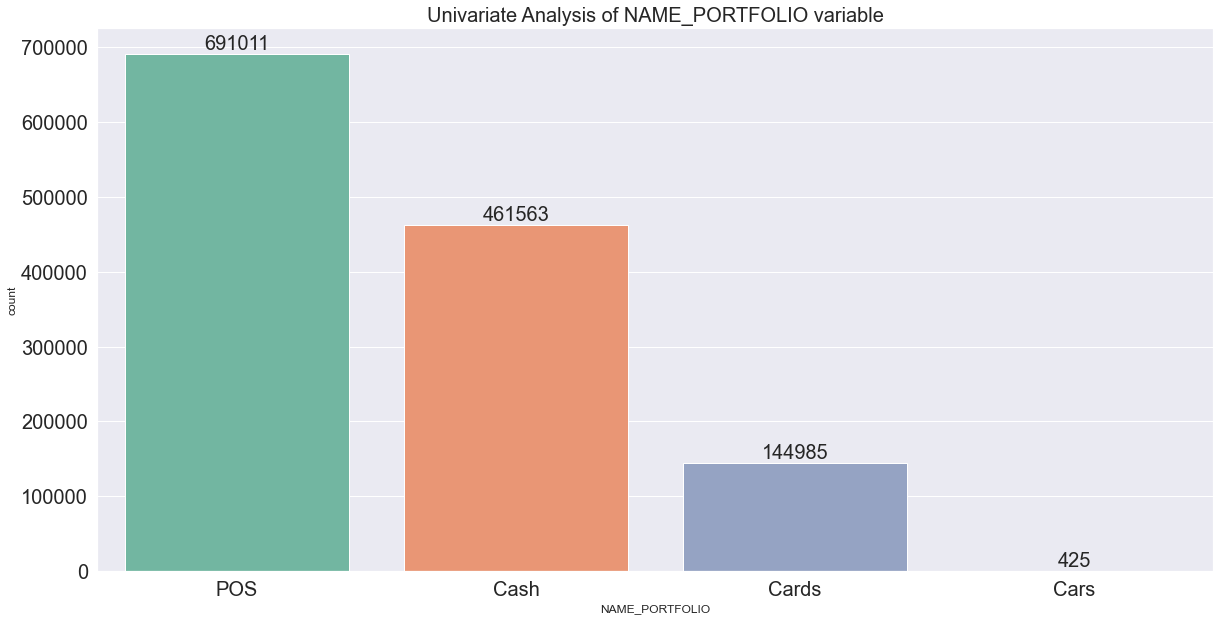

In [140]:
puni('NAME_PORTFOLIO')

From the above observations, we see a good number of applications are for Cash and majority of applications are for POS

## Univariate Analysis - Numeric Variables  - Previous Application Data

In [141]:
# Creating a function to plot graphs with ease for numeric variables:
def puni_num(column,dimensions=[20,10],font=20,tfont=20,rotx=None,histogram=True):
    
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title(f'Univariate Analysis of {column} variable \n', fontdict={'fontsize':tfont})
    sns.distplot(Pappdata[column],hist=histogram)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)     
      

#### On the basis of AMT_CREDIT

In [142]:
puni_num('AMT_CREDIT')

From the above, The distribution does not look perfectly spread, it is left-skewed

#### On the basis of AMT_GOODS_PRICE

In [143]:
puni_num('AMT_GOODS_PRICE')

From the above, The distribution does not look perfectly spread, it is left-skewed

#### On the basis of AMT_NNUITY

In [144]:
puni_num('AMT_ANNUITY')

From the above, The distribution does not look perfectly spread, it is left-skewed

#### For doing Bivariate analysis we would need to take Target variable into consideration thus we need to merge Applicationdata & Previous_application data

In [145]:
# Merging both datasetts based on SKID to lookup only for Target variable
lookup_dataset =  applicationdata[['SK_ID_CURR','TARGET']]
lookup_dataset

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

From the above we see that we have successfully created a lookup variable that consists of Target variable and SKID for joining

In [146]:
merged_data = lookup_dataset.merge(Pappdata, on='SK_ID_CURR', how='inner')
merged_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  int64  
 3   NAME_CONTRACT_TYPE           1413388 non-null  object 
 4   AMT_ANNUITY                  1106483 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_DOWN_PAYMENT             664161 non-null   float64
 8   AMT_GOODS_PRICE              1094176 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 10  HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1413701 non-n

Now we have the combined/Merged data set ready of all previous application metrics for applicants who have currently applied for loan 

In [147]:
# Creating a function to determine graphs for Bivariate analysis
def new_bis(data,var,name,dimensions=[20,10],rotx=None,font=20, tfont=20, size=15):
    valcounts=data[var].value_counts()
    df0=pd.DataFrame(valcounts)
    df0.reset_index(inplace=True)
    df1=data[[var,'TARGET']].groupby([var], as_index=False).mean()
    df1.iloc[:,1]=round((df1.iloc[:,1]*100),2)
    sns.set_theme(style='darkgrid')
    sns.set_palette("Set2")
    # Value_Counts
    plt.figure(figsize=dimensions)
    plt.subplot(1,2,1)
    plt.title((f'Count of {name} category'), fontdict={'fontsize':tfont})
    splot=sns.barplot(data=df0,x=df0['index'],y=df0.iloc[:,1])
    for p in splot.patches:
        splot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it 
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.xlabel(var, fontdict={'fontsize':15})
    plt.ylabel(var,fontdict={'fontsize':15})
    #Percentages
    plt.subplot(1,2,2)
    plt.title((f'% of Defaulters in {name} category'), fontdict={'fontsize': tfont})
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(rotation=rotx)
    plt.xlabel(var, fontdict={'fontsize':15})
    plt.ylabel('TARGET',fontdict={'fontsize':15})
    gplot=sns.barplot(data=df1,x=df1.iloc[:,0],y=df1.iloc[:,1])
    for p in gplot.patches:
        gplot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=size,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it

In [148]:
merged_data.head(10)

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002       1     1038818     Consumer loans     9251.775   
1      100003       0     1810518         Cash loans    98356.995   
2      100003       0     2636178     Consumer loans    64567.665   
3      100003       0     2396755     Consumer loans     6737.310   
4      100004       0     1564014     Consumer loans     5357.250   
5      100006       0     2078043         Cash loans    24246.000   
6      100006       0     2827850    Revolving loans          NaN   
7      100006       0     2190416     Consumer loans    29027.520   
8      100006       0     1489396    Revolving loans    13500.000   
9      100006       0     1020698         Cash loans    39954.510   

   AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0         179055.0    179055.0               0.0         179055.0   
1         900000.0   1035882.0               NaN         900000.0   
2         337500.0    348637.5               0.0         337500.0   
3          68809.5     68053.5            6885.0          68809.5   
4          24282.0     20106.0            4860.0          24282.0   
5         675000.0    675000.0               NaN         675000.0   
6              0.0         0.0               NaN              NaN   
7         334917.0    267930.0           66987.0         334917.0   
8         270000.0    270000.0               NaN         270000.0   
9         454500.0    481495.5               NaN         454500.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                        9   
1                     FRIDAY                       12   
2                     SUNDAY                       17   
3                   SATURDAY                       15   
4                     FRIDAY                        5   
5                   THURSDAY                       15   
6                   THURSDAY                       15   
7                     SUNDAY                       15   
8                   THURSDAY                       15   
9                   SATURDAY                       12   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1           0.000000   
1                           Y                       1                NaN   
2                           Y                       1           0.000000   
3                           Y                       1           0.100061   
4                           Y                       1           0.212008   
5                           Y                       1                NaN   
6                           Y                       1                NaN   
7                           Y                       1           0.217830   
8                           Y                       1                NaN   
9                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0                    NaN                       NaN                    NaN   
1                    NaN                       NaN                    NaN   
2                    NaN                       NaN                    NaN   
3                    NaN                       NaN                    NaN   
4                    NaN                       NaN                    NaN   
5                    NaN                       NaN                    NaN   
6                    NaN                       NaN                    NaN   
7                    NaN                       NaN                    NaN   
8                    NaN                       NaN                    NaN   
9                    NaN                       NaN                    NaN   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            606                    NaN   
1             Approved            746     

#### On the basis of NAME_CONTRACT_TYPE

In [149]:
new_bis(merged_data,'NAME_CONTRACT_TYPE','Contract_Type')

From the above we can see that the amount of applications for Consumer & Cash loans are pretty close, although we can see that defaulters of current application faced maximum % difficulties for Revolving loans(10.47%) in previous application and minimum % of difficulties in Consumer loans(7.71%)

#### On the basis of NAME_CONTRACT_STATUS

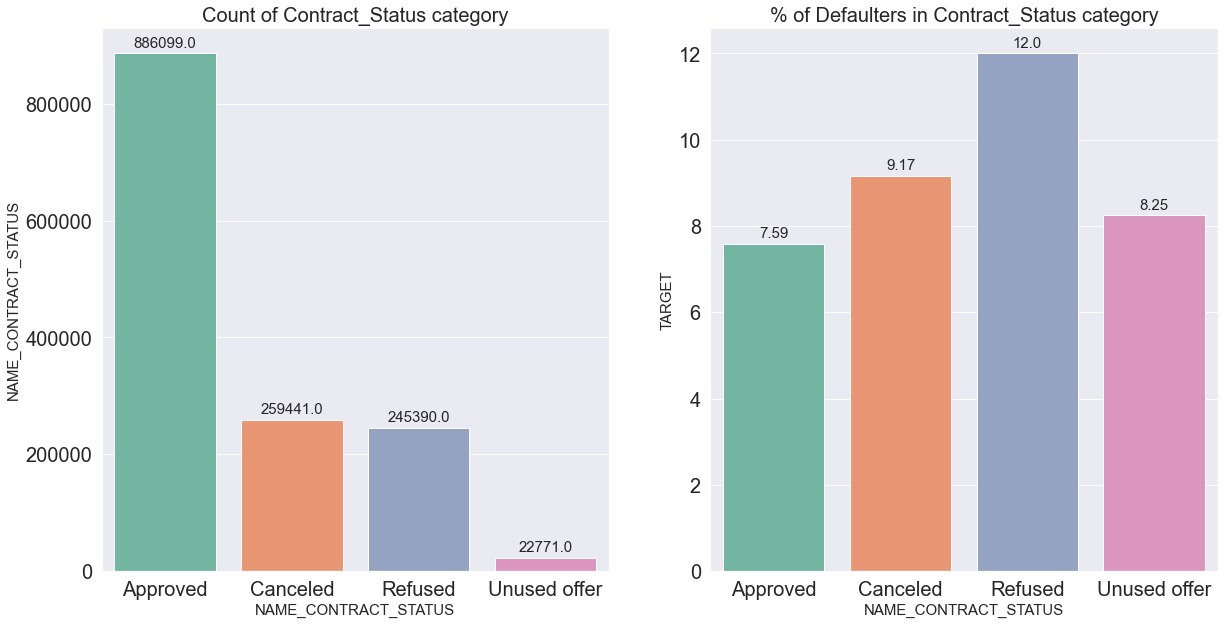

In [150]:
new_bis(merged_data,'NAME_CONTRACT_STATUS','Contract_Status')

From the above graph, we can see that majority of the applications have been approved, although we can also observe that the refused % which is 12% is the maximum % of difficulties faced by current applicants in their previous application & Approved % which is 7.59% is the minimum % of difficulties faced by current applicants in their previous application.

#### On the basis of NAME_PAYMENT_TYPE

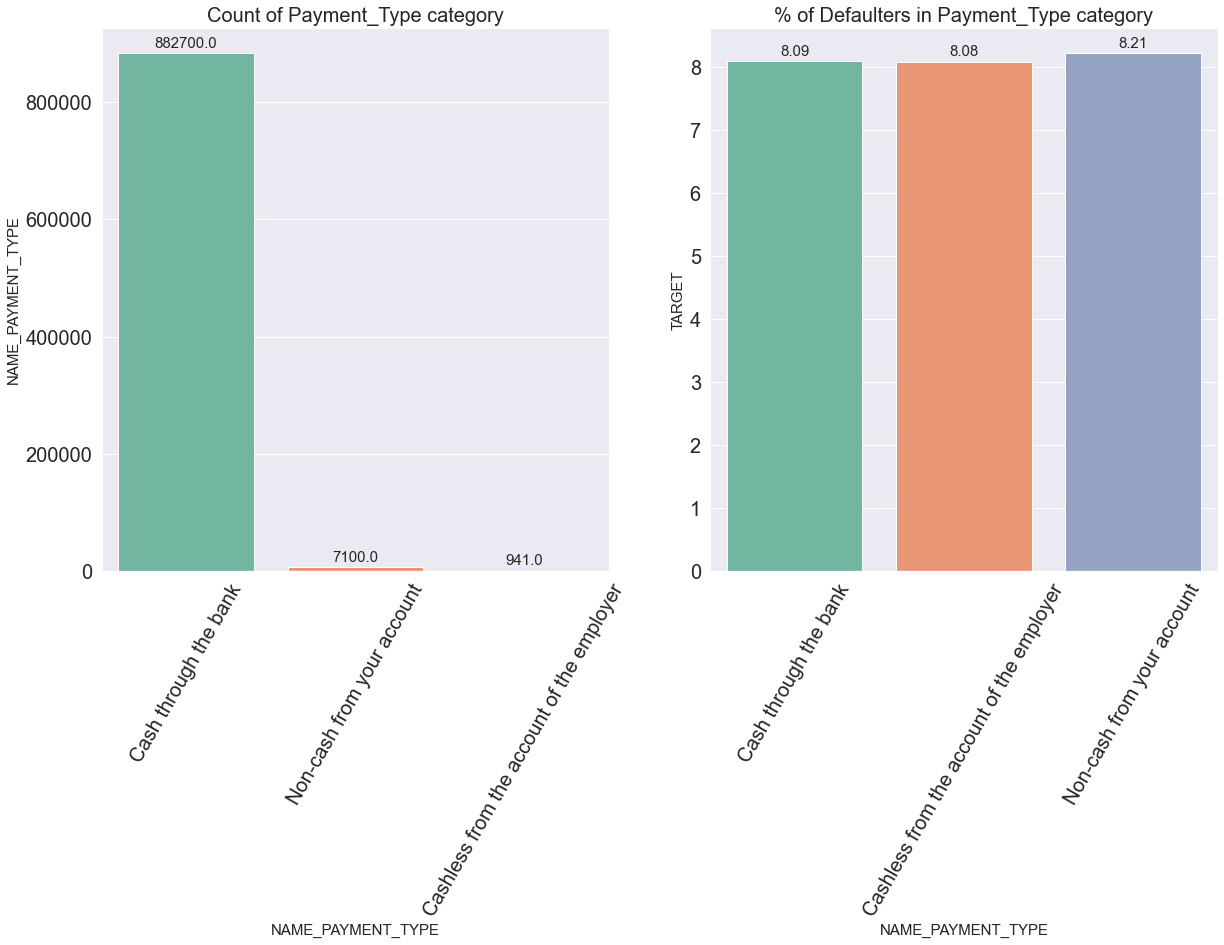

In [151]:
new_bis(merged_data,'NAME_PAYMENT_TYPE','Payment_Type', rotx=60)

From the above graph we can see that majority of payments done by current applicants in their previous applications are through "Cash through the bank" payment-method.

#### On the basis of CODE_REJECT_REASON

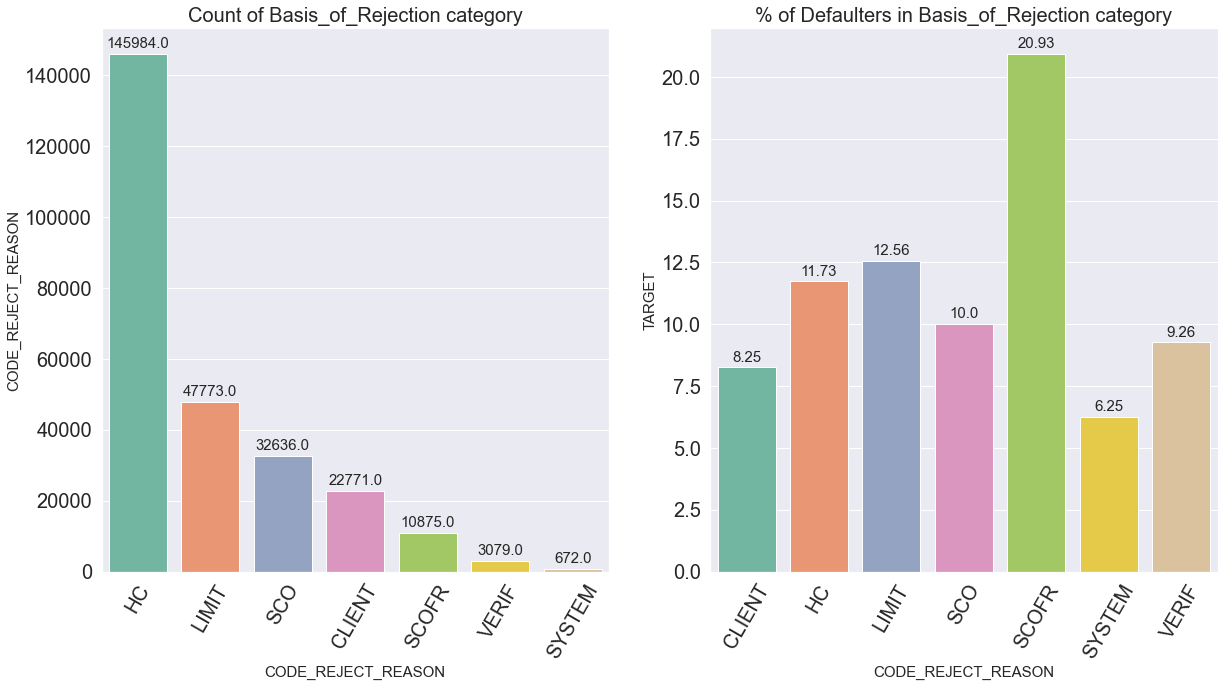

In [152]:
new_bis(merged_data,'CODE_REJECT_REASON','Basis_of_Rejection', rotx=60)

From the above, the graph on the left shows majority of applications got rejected for 'HC', but current applicants faced maximum payment difficulties for rejection in 'SCOFR' (20.93%) and minimum payment difficulties in 'SYSTEM'(6.25%) in their previous applications

#### On the basis of NAME_TYPE_SUITE

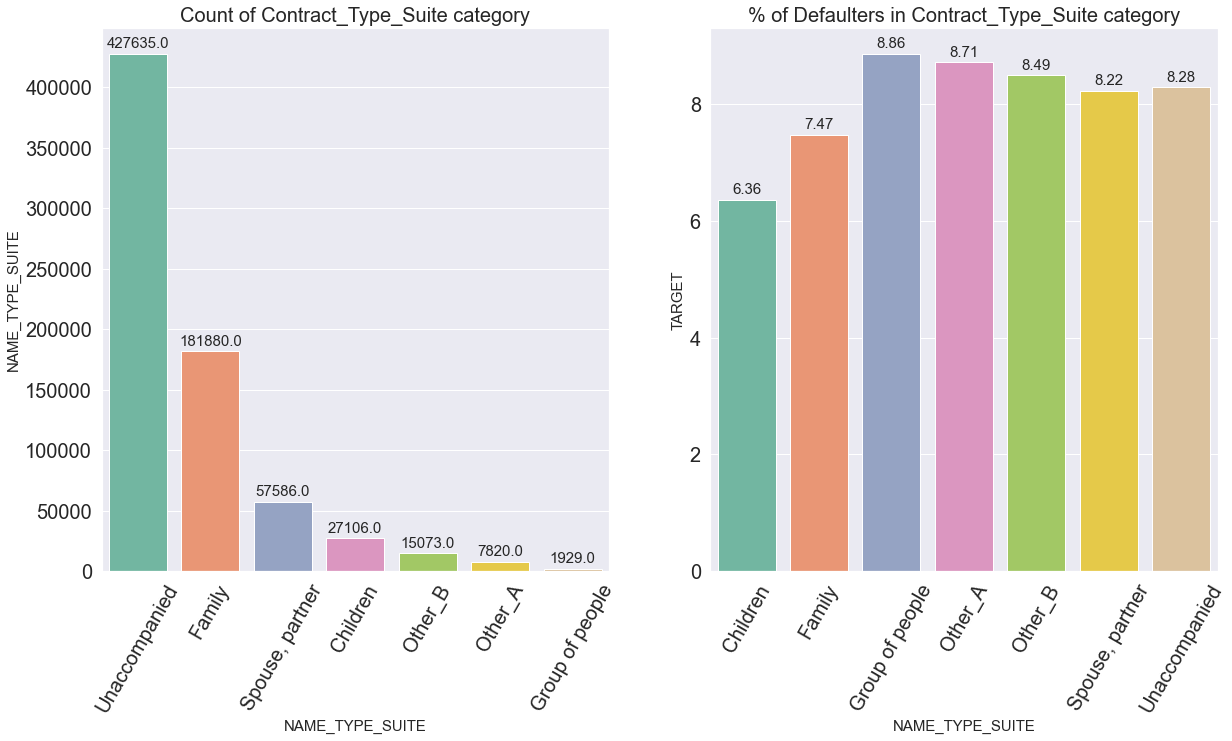

In [153]:
new_bis(merged_data,'NAME_TYPE_SUITE','Contract_Type_Suite', rotx=60)

From the above, the graph on left shows majority of loans are for 'Unaccompanied' but, current applicants in their previous applications faced maximum difficulties when they applied as 'Group of people' (8.86%)

#### On the basis of NAME_CLIENT_TYPE

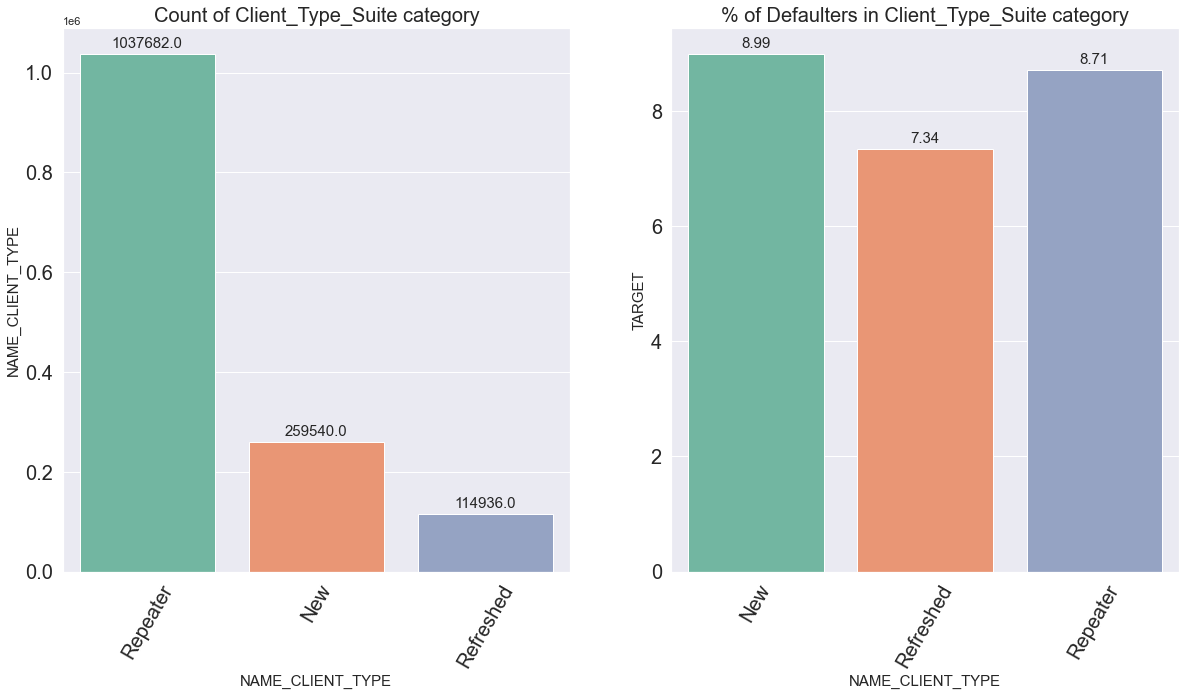

In [154]:
new_bis(merged_data,'NAME_CLIENT_TYPE','Client_Type_Suite', rotx=60)

From the above, we can see that the graph on left shows most applicants from previous applications are 'Repeaters', whereas, 'Refreshed' clients from previous applications had least % difficulties (7.34%) and 'New' clients from previous applications had most % difficulties(8.99%)

#### On the basis of NAME_GOODS_CATEGORY

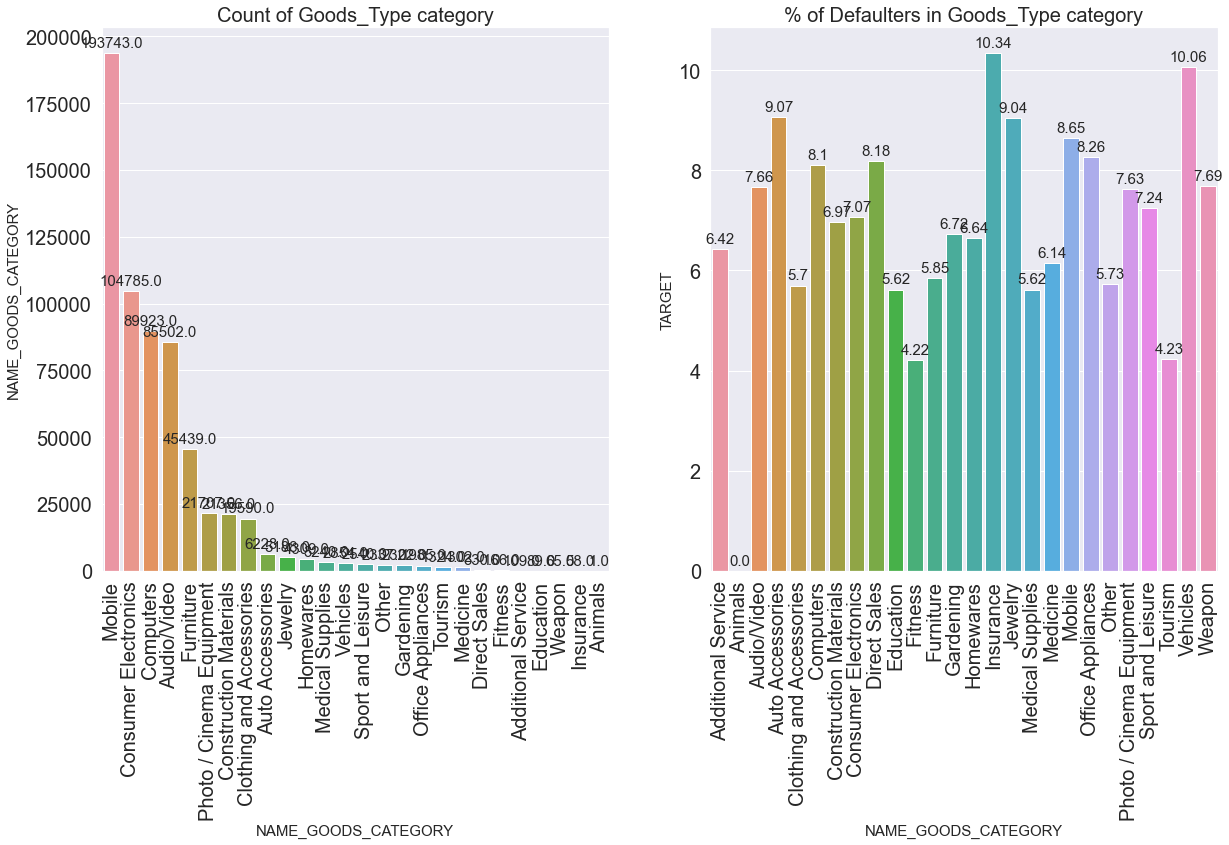

In [155]:
new_bis(merged_data,'NAME_GOODS_CATEGORY','Goods_Type', rotx=90)

From the above, we can see that most of the applicants have applied for loan for Mobile -goods category, but current applicants in previous application faced maximum % defficulties in goods category of 'Insurance'(10.34%) and 'Vehicles'(10.06%)

#### On the basis of NAME_CASH_LOAN_PURPOSE

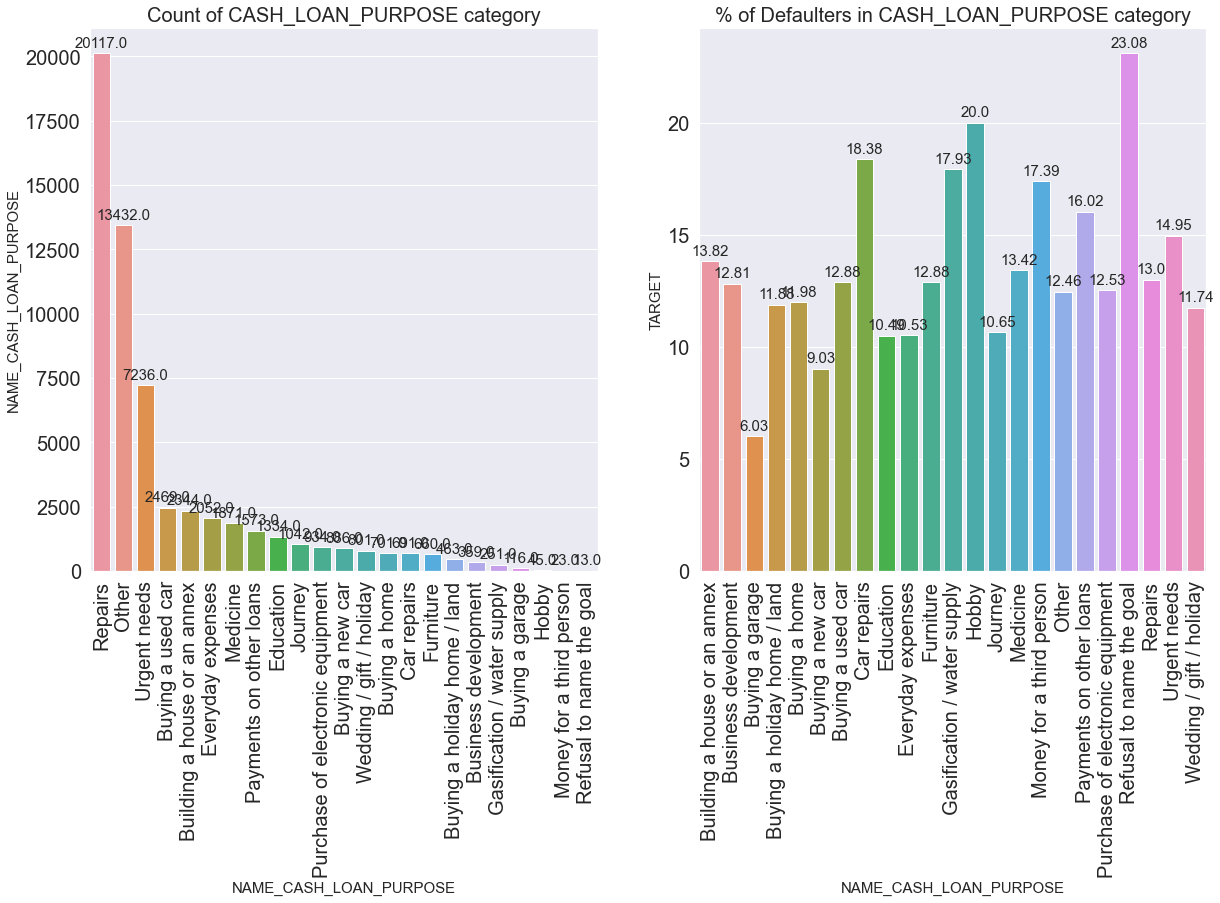

In [156]:
new_bis(merged_data,'NAME_CASH_LOAN_PURPOSE','CASH_LOAN_PURPOSE', rotx=90)

From the above, we can see majority of applicants applied for cash loans for Repair category, but they faced maximum % difficulties in'Refused to name the goal'(23.08%) & minimum difficulties in buying a garage(6.03%)

# Conclusions and Recommendations

1.	Banks should be careful while giving loans to applicants who are of Young age, Middle age & are Unaccompanied as there are high chances for default.
2.	Cash loans have major applications as well as major defaulters (8.35%). Although there are less applicants for revolving loans but maximum difficulties(10.47%) are faced by clients for repayment of revolving loans.
3.	Banks can approve loan without much hesitation to applicants who are highly educated or hold academic degree or applicants who are senior citizens & applicants who are pensioners or commercial associates as they are less likely to default.
4.	Banks should be careful while approving loans for applicants who live with their families and applicants having loan annuity between 20,000 to 40,000 as they are more likely to default.
5.	The applicants who are single/not married , civil-marriage or widows are likely to default on credit. Alongside it is also observed that applicants in maternity leave and unemployed will have payment difficulties.
6.	Applicants who are having lower-secondary education, incomplete higher education are most likely to default on payments.
7.	Banks should be more likely to approve loans for working professionals and applicants who live in house/apartments & co-op apartments or are accompanied by spouse/family as they are less likely to default.
8.	Applicants who are low-skilled labours, live in rented-house and are accompanied by Other_A categories are most likely to have payment difficulties.
9.	Applicants who get rejected in previous application faced maximum difficulties (20.93%) for loan repayment when they got rejected due to ‘SCOFR’ rejection-category.
10.	Applicants who were ‘New’ clients in their previous applications faced maximum difficulties (8.99%) for loan repayment. Thus, bank should be little cautious while granting loans to new applicants or applicants without credit history.
11.	Applicants who applied loan as ‘Group of people’ faced maximum difficulties (8.86%) in terms of loan repayment.
12.	Refreshed clients tend to have less difficulties (7.34%) for repayment of loan.
13.	Applicants faced payment difficulties who applied for loan for goods – Insurance (10.34%) and ‘Vehicles’ (10.06%).
14.	Applicants who refuse to name the goal or purpose of the loan (23.08%) are most likely to default or have payment difficulties.
15.	The clients who were refused in previous applications faced maximum difficulties (12%) in loan repayment.
  
